<a href="https://colab.research.google.com/github/K-byte-Ind/K-byte-Ind/blob/main/DAA_Final_Project_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Install necessary packages
!pip install ultralytics==8.3.0

import os
import json
from ultralytics import YOLO
from tqdm import tqdm
from google.colab import drive

# Step 2: Mount Google Drive (assuming dataset on Drive)
drive.mount('/content/drive')

# Adjust this path to where your dataset is stored in Google Drive
dataset_root = '/content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation'

# Confirm the structure is:
# dataset_root/
# ├── train/
# │   ├── images/
# │   └── _annotations.coco.json
# ├── val/
# │   ├── images/
# │   └── _annotations.coco.json
# └── test/
#     ├── images/
#     └── _annotations.coco.json

# Step 3: Convert COCO annotations to YOLO format (.txt labels)
def coco_to_yolo(coco_json, output_dir, image_dir):
    with open(coco_json, 'r') as f:
        data = json.load(f)

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    img_id_map = {img['id']: img for img in data['images']}

    for ann in tqdm(data['annotations'], desc=f"Converting {coco_json}"):
        img_info = img_id_map[ann['image_id']]
        width, height = img_info['width'], img_info['height']

        x, y, w, h = ann['bbox']
        x_center = (x + w / 2) / width
        y_center = (y + h / 2) / height
        w /= width
        h /= height

        label_line = f"{ann['category_id']} {x_center:.6f} {y_center:.6f} {w:.6f} {h:.6f}\n"
n in the editor below:
for split in ['train', 'val', 'test']:
    coco_json = os.path.join(dataset_root, split, "_annotations.coco.json")
    images_dir = os.path.join(dataset_root, split, "images")
    labels_dir = os.path.join(dataset_root, split, "labels")
    coco_to_yolo(coco_json, labels_dir, images_dir)

# Step 4: Generate YOLO .yaml config file
annotation_file = os.path.join(dataset_root, "train", "_annotations.coco.json")
output_yaml = os.path.join(dataset_root, "custom_dataset.yaml")

with open(annotation_file) as f:
    coco = json.load(f)
class_names = [cat["name"] for cat in coco["categories"]]

yaml_content = f"""
path: {dataset_root}
train: train/images
val: val/images
test: test/images

nc: {len(class_names)}
names: {class_names}
"""

with open(output_yaml, "w") as f:
    f.write(yaml_content)

print(f"✅ YAML config created at {output_yaml}")

# Step 5: Train YOLOv8 model
model = YOLO("yolov8l.pt")

model.train(
    data=output_yaml,
    epochs=50,
    imgsz=640,
    batch=16,
    name="yolov8l_colab",
    device='0',  # GPU enabled in Colab
    workers=4,
    cache=True,
    amp=True
)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Converting /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/train/_annotations.coco.json: 100%|██████████| 2312/2312 [00:11<00:00, 193.21it/s]
Converting /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/val/_annotations.coco.json: 100%|██████████| 341/341 [00:01<00:00, 196.29it/s]
Converting /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/_annotations.coco.json: 100%|██████████| 172/172 [00:00<00:00, 214.15it/s]


✅ YAML config created at /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/custom_dataset.yaml
New https://pypi.org/project/ultralytics/8.3.164 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.0 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/custom_dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=True, device=0, workers=4, project=None, name=yolov8l_colab, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=Tr

100%|██████████| 755k/755k [00:00<00:00, 25.1MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: kotireddyr3 (kotireddyr3-cranfield-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.25M/6.25M [00:00<00:00, 119MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/train/labels... 2308 images, 94 backgrounds, 0 corrupt: 100%|██████████| 2402/2402 [01:19<00:00, 30.04it/s] 

train: WARNING ⚠️ /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/train/images/camera_1000_png.rf.bc5e42d1e3cb859cb678bce5c96e2926.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/train/images/camera_1000_png.rf.bd9d11543db882011ce75457221f2099.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/train/images/camera_1002_png.rf.3917062cecb6a71518adf799f46829ec.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/train/images/camera_1002_png.rf.b91925c2cf0a8c7ab97cd31ed24c4534.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/train/images/camera_1003_png.rf.001e05448aaf3f5f445f3aee82eed338.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/train/image

train: New cache created: /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/train/labels.cache
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (2.7GB RAM): 100%|██████████| 2402/2402 [00:20<00:00, 117.38it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/ultralytics/data/augment.py:1850: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),
val: Scanning /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/val/labels... 340 images, 2 backgrounds, 0 corrupt: 100%|██████████| 342/342 [00:06<00:00, 56.64it/s] 

val: WARNING ⚠️ /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/val/images/camera_1001_png.rf.358e15fa5a5848c5accdb8f7943f6527.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/val/images/camera_1005_png.rf.519d97e6b53751c9f8c1b1e93a107928.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/val/images/camera_1007_png.rf.c65765c5ad27b4afe3fb5184d86b41dd.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/val/images/camera_1008_png.rf.79cb56e04a9c21086d5b789b872338e8.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/val/images/camera_1010_png.rf.d7c9f7676064b508e6d3144b2e57c80e.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/val/images/camera_1011_png.rf.429

val: New cache created: /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/val/labels.cache
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.4GB RAM): 100%|██████████| 342/342 [00:02<00:00, 120.45it/s]


Plotting labels to runs/detect/yolov8l_colab/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 103 weight(decay=0.0), 110 weight(decay=0.0005), 109 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8l_colab
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      10.7G      1.674      2.308      1.714          2        640: 100%|██████████| 151/151 [01:57<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.44it/s]

                   all        342        341      0.384      0.248      0.251     0.0915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      10.8G      1.619      1.331      1.743          3        640: 100%|██████████| 151/151 [01:56<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.59it/s]

                   all        342        341      0.398      0.185      0.278      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      10.8G      1.607      1.179      1.753          1        640: 100%|██████████| 151/151 [01:55<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.66it/s]

                   all        342        341      0.809      0.622      0.712      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      10.8G      1.488     0.9881      1.625          1        640: 100%|██████████| 151/151 [01:54<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.68it/s]

                   all        342        341      0.808      0.724      0.809      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      10.7G      1.453     0.9571      1.602          2        640: 100%|██████████| 151/151 [01:53<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.67it/s]

                   all        342        341      0.672      0.757      0.792       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      10.8G      1.418      0.932      1.585          2        640: 100%|██████████| 151/151 [01:53<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.60it/s]

                   all        342        341      0.677       0.88      0.833      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      10.8G      1.351     0.8265      1.517          2        640: 100%|██████████| 151/151 [01:52<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.64it/s]

                   all        342        341      0.755      0.858      0.892      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      10.8G      1.301     0.7833      1.492          4        640: 100%|██████████| 151/151 [01:52<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.65it/s]

                   all        342        341      0.794      0.836      0.884      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      10.7G      1.277     0.7721      1.474          5        640: 100%|██████████| 151/151 [01:52<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.67it/s]

                   all        342        341      0.817      0.866      0.894      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      10.8G      1.229     0.7487      1.426          2        640: 100%|██████████| 151/151 [01:53<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.63it/s]

                   all        342        341       0.77      0.806      0.875      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      10.8G        1.2     0.7118      1.412          2        640: 100%|██████████| 151/151 [01:53<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.64it/s]

                   all        342        341      0.843      0.862      0.916      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      10.8G      1.155     0.6634      1.379          2        640: 100%|██████████| 151/151 [01:52<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.67it/s]

                   all        342        341      0.762      0.837      0.873      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      10.7G      1.144     0.6649      1.361          3        640: 100%|██████████| 151/151 [01:52<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.64it/s]

                   all        342        341       0.88      0.859      0.892      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      10.8G      1.105     0.6365       1.34          1        640: 100%|██████████| 151/151 [01:53<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.63it/s]

                   all        342        341      0.901      0.921      0.923      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      10.8G      1.078     0.6249      1.319          5        640: 100%|██████████| 151/151 [01:53<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.67it/s]

                   all        342        341      0.872       0.84      0.878      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      10.8G      1.044      0.594      1.295          2        640: 100%|██████████| 151/151 [01:52<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.62it/s]

                   all        342        341      0.859      0.893      0.915      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      10.7G      1.046     0.6063      1.306          4        640: 100%|██████████| 151/151 [01:52<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.68it/s]

                   all        342        341      0.835      0.883      0.906      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      10.8G      1.048     0.6039      1.289          2        640: 100%|██████████| 151/151 [01:52<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.64it/s]

                   all        342        341      0.849      0.823      0.911      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      10.8G      1.011     0.5776      1.263          2        640: 100%|██████████| 151/151 [01:53<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.64it/s]

                   all        342        341      0.917        0.9       0.92      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      10.8G     0.9647      0.547      1.222          2        640: 100%|██████████| 151/151 [01:53<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.66it/s]

                   all        342        341      0.865      0.862      0.926      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      10.7G     0.9855     0.5874      1.239          0        640: 100%|██████████| 151/151 [01:52<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.69it/s]

                   all        342        341      0.857      0.842      0.916      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      10.8G      0.955     0.5617      1.231          0        640: 100%|██████████| 151/151 [01:52<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.67it/s]

                   all        342        341      0.867      0.862       0.91      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      10.8G     0.9338     0.5347      1.213          5        640: 100%|██████████| 151/151 [01:52<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.61it/s]

                   all        342        341      0.851      0.909      0.903       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      10.8G     0.9246     0.5387      1.208          5        640: 100%|██████████| 151/151 [01:53<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.62it/s]

                   all        342        341      0.855      0.919      0.935      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      10.7G      0.897     0.5089      1.186          3        640: 100%|██████████| 151/151 [01:53<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.68it/s]

                   all        342        341      0.906      0.891      0.941      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      10.8G     0.9016     0.5053      1.186          2        640: 100%|██████████| 151/151 [01:53<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.54it/s]

                   all        342        341       0.87      0.894      0.929      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      10.8G     0.8907     0.5089      1.192          1        640: 100%|██████████| 151/151 [01:52<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.62it/s]

                   all        342        341       0.91      0.933      0.937      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      10.8G     0.8594     0.4859      1.171          2        640: 100%|██████████| 151/151 [01:53<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.67it/s]

                   all        342        341      0.912      0.945      0.958       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      10.7G     0.8505     0.4764      1.155          2        640: 100%|██████████| 151/151 [01:52<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.61it/s]

                   all        342        341      0.885      0.926      0.942      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      10.8G     0.8292     0.4775      1.143          4        640: 100%|██████████| 151/151 [01:52<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.66it/s]

                   all        342        341      0.886      0.941      0.935      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      10.8G     0.8224     0.4674       1.14          2        640: 100%|██████████| 151/151 [01:53<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.65it/s]

                   all        342        341      0.826      0.859        0.9      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      10.8G     0.7901     0.4556      1.117          3        640: 100%|██████████| 151/151 [01:54<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.54it/s]

                   all        342        341      0.906      0.912      0.948      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      10.7G     0.7782     0.4549      1.116          3        640: 100%|██████████| 151/151 [01:53<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.65it/s]

                   all        342        341      0.906      0.935      0.941      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      10.8G     0.7727     0.4413      1.114          4        640: 100%|██████████| 151/151 [01:53<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.64it/s]

                   all        342        341      0.898      0.935      0.936      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      10.8G     0.7622      0.435      1.094          1        640: 100%|██████████| 151/151 [01:53<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.64it/s]

                   all        342        341      0.916      0.935      0.943      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      10.8G     0.7423     0.4241      1.086          2        640: 100%|██████████| 151/151 [01:52<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.67it/s]

                   all        342        341      0.914      0.933      0.958      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      10.7G       0.72     0.4201      1.082          1        640: 100%|██████████| 151/151 [01:51<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.69it/s]

                   all        342        341      0.928      0.942      0.945      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      10.8G     0.7199      0.418      1.077          1        640: 100%|██████████| 151/151 [01:52<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.67it/s]

                   all        342        341      0.926      0.935      0.946      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      10.8G     0.7219      0.412      1.085          1        640: 100%|██████████| 151/151 [01:52<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.65it/s]

                   all        342        341      0.929      0.955      0.957       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      10.8G     0.6895     0.3908      1.058          3        640: 100%|██████████| 151/151 [01:52<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.64it/s]

                   all        342        341      0.915      0.941      0.952      0.467


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      10.7G        1.7     0.7977      1.526          2        640: 100%|██████████| 151/151 [01:53<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.66it/s]

                   all        342        341      0.914      0.941      0.964      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      10.8G      1.677     0.7735      1.499          2        640: 100%|██████████| 151/151 [01:51<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.63it/s]

                   all        342        341      0.933      0.935      0.954       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      10.8G      1.655     0.7578      1.489          2        640: 100%|██████████| 151/151 [01:52<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.65it/s]

                   all        342        341      0.964      0.954      0.972      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      10.8G      1.621     0.7311      1.455          2        640: 100%|██████████| 151/151 [01:51<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.62it/s]

                   all        342        341      0.973      0.979       0.98      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50        11G      1.613      0.724      1.432          2        640: 100%|██████████| 151/151 [01:52<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.67it/s]

                   all        342        341       0.94      0.956      0.958      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      10.8G      1.606       0.71      1.419          2        640: 100%|██████████| 151/151 [01:52<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.67it/s]

                   all        342        341       0.95      0.959       0.97      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      10.8G      1.585     0.6862      1.421          2        640: 100%|██████████| 151/151 [01:51<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.66it/s]

                   all        342        341      0.958      0.965      0.973      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      10.8G      1.577     0.6771       1.42          2        640: 100%|██████████| 151/151 [01:51<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.67it/s]

                   all        342        341      0.961      0.965      0.963      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      10.7G      1.556     0.6757      1.409          2        640: 100%|██████████| 151/151 [01:51<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.66it/s]

                   all        342        341      0.964      0.974      0.978      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      10.8G      1.555     0.6663      1.399          2        640: 100%|██████████| 151/151 [01:51<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.69it/s]

                   all        342        341      0.969      0.968      0.966      0.511



50 epochs completed in 1.837 hours.
Optimizer stripped from runs/detect/yolov8l_colab/weights/last.pt, 79.3MB
Optimizer stripped from runs/detect/yolov8l_colab/weights/best.pt, 79.3MB

Validating runs/detect/yolov8l_colab/weights/best.pt...
Ultralytics 8.3.0 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 286 layers, 39,434,326 parameters, 0 gradients, 145.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.21it/s]


                   all        342        341      0.964      0.974      0.978      0.513
                 Drone        340        341      0.964      0.974      0.978      0.513
Speed: 0.3ms preprocess, 15.3ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/yolov8l_colab


lr/pg0,▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▂▂▂▂▂▂▁▁
lr/pg1,▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁
lr/pg2,▃▆███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▁▁▅▆▆▇▇▇▇▇▇▇▇▇▇█▇▇▇█████▇███████████████
metrics/mAP50-95(B),▁▂▅▅▅▆▆▆▆▇▆▆▇▇▇▇▇▇▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇██████
metrics/precision(B),▁▁▆▆▄▅▆▆▆▇▇▇▇▇▆▇▇▇▇▇▇▇▇▇▇▆▇▇▇▇█▇▇███████
metrics/recall(B),▂▁▅▆▆▇▇▇▆▇▇▇▇▇▇▇▇▇▇▇▇▇███▇██████████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▇▇▇▆▆▅▅▅▅▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁███▇▇▇▇▇


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a6341ba3750>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

Evaluating the model on test set

In [ ]:
# Step 1: Import necessary libraries
from ultralytics import YOLO
import os

# Step 2: Define paths
dataset_root = '/content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation'
model_path = '/content/runs/detect/yolov8l_colab/weights/best.pt'

# Make sure your dataset is structured like:
# dataset_root/
# └── test/
#     ├── images/
#     └── labels/

test_images = os.path.join(dataset_root, 'test', 'images')

# Step 3: Load the trained model
model = YOLO(model_path)

# Step 4: Run evaluation on test dataset
metrics = model.val(
    data=os.path.join(dataset_root, 'custom_dataset.yaml'),
    split='test',
    imgsz=640,
    batch=16,
    device='0'  # GPU enabled
)

# Step 5: Print evaluation metrics
print("\n✅ Evaluation Results:")
print(f"Precision: {metrics.box.p.item():.3f}")
print(f"Recall: {metrics.box.r.item():.3f}")
print(f"mAP@50: {metrics.box.map50.item():.3f}")
print(f"mAP@50-95: {metrics.box.map.item():.3f}")



Ultralytics 8.3.0 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 286 layers, 39,434,326 parameters, 0 gradients, 145.2 GFLOPs


val: Scanning /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/labels.cache... 172 images, 1 backgrounds, 0 corrupt: 100%|██████████| 173/173 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_100_png.rf.dc891ee5707cb3c777286531c5bc73ed.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1014_png.rf.d8b7596e7c4547ed6403e422d68bed80.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1035_png.rf.6a526a9941d0c278a0bd24678d716031.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_103_png.rf.53f583f8c6e8f986dde68b4487edb294.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1041_png.rf.d88e43e61f9001d7e0694c8f8fcb20f8.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_104_png.rf.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:08<00:00,  1.24it/s]


                   all        173        172      0.965      0.969      0.962      0.508
                 Drone        172        172      0.965      0.969      0.962      0.508
Speed: 0.3ms preprocess, 33.0ms inference, 0.0ms loss, 5.8ms postprocess per image
Results saved to runs/detect/val2

✅ Evaluation Results:
Precision: 0.965
Recall: 0.969
mAP@50: 0.962
mAP@50-95: 0.508


Using model to detect drones

Processing frames:   0%|          | 0/2958 [00:00<?, ?it/s]


0: 480x640 1 Drone, 142.4ms
Speed: 72.2ms preprocess, 142.4ms inference, 394.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   0%|          | 1/2958 [06:48<335:12:52, 408.11s/it]


0: 480x640 1 Drone, 47.7ms
Speed: 5.4ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   0%|          | 2/2958 [06:48<138:06:44, 168.20s/it]


0: 480x640 1 Drone, 47.7ms
Speed: 4.4ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   0%|          | 3/2958 [06:48<75:08:26, 91.54s/it]  


0: 480x640 1 Drone, 47.7ms
Speed: 4.6ms preprocess, 47.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   0%|          | 4/2958 [06:49<45:34:28, 55.54s/it]


0: 480x640 1 Drone, 47.7ms
Speed: 4.7ms preprocess, 47.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   0%|          | 5/2958 [06:49<29:14:53, 35.66s/it]


0: 480x640 1 Drone, 47.7ms
Speed: 4.1ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   0%|          | 6/2958 [06:49<19:23:18, 23.64s/it]


0: 480x640 1 Drone, 47.7ms
Speed: 4.2ms preprocess, 47.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   0%|          | 7/2958 [06:50<13:07:51, 16.02s/it]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   0%|          | 8/2958 [06:50<9:02:00, 11.02s/it] 


0: 480x640 1 Drone, 47.7ms
Speed: 4.8ms preprocess, 47.7ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   0%|          | 9/2958 [06:50<6:17:25,  7.68s/it]


0: 480x640 1 Drone, 47.7ms
Speed: 4.6ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   0%|          | 10/2958 [06:51<4:25:39,  5.41s/it]


0: 480x640 1 Drone, 47.7ms
Speed: 4.7ms preprocess, 47.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   0%|          | 11/2958 [06:51<3:09:07,  3.85s/it]


0: 480x640 1 Drone, 47.7ms
Speed: 4.6ms preprocess, 47.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   0%|          | 12/2958 [06:51<2:16:32,  2.78s/it]


0: 480x640 1 Drone, 47.9ms
Speed: 6.1ms preprocess, 47.9ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   0%|          | 13/2958 [06:52<1:40:02,  2.04s/it]


0: 480x640 1 Drone, 52.0ms
Speed: 5.3ms preprocess, 52.0ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   0%|          | 14/2958 [06:52<1:14:40,  1.52s/it]


0: 480x640 1 Drone, 48.5ms
Speed: 4.3ms preprocess, 48.5ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   1%|          | 15/2958 [06:52<58:28,  1.19s/it]  


0: 480x640 1 Drone, 47.7ms
Speed: 4.1ms preprocess, 47.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   1%|          | 16/2958 [06:53<47:12,  1.04it/s]


0: 480x640 2 Drones, 47.7ms
Speed: 5.4ms preprocess, 47.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   1%|          | 17/2958 [06:53<39:22,  1.24it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   1%|          | 18/2958 [06:54<34:32,  1.42it/s]


0: 480x640 2 Drones, 47.7ms
Speed: 5.1ms preprocess, 47.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   1%|          | 19/2958 [06:54<30:37,  1.60it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 6.2ms preprocess, 47.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   1%|          | 20/2958 [06:55<27:48,  1.76it/s]


0: 480x640 2 Drones, 47.7ms
Speed: 5.1ms preprocess, 47.7ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   1%|          | 21/2958 [06:55<26:00,  1.88it/s]


0: 480x640 2 Drones, 47.7ms
Speed: 4.1ms preprocess, 47.7ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   1%|          | 22/2958 [06:55<24:56,  1.96it/s]


0: 480x640 1 Drone, 48.3ms
Speed: 16.2ms preprocess, 48.3ms inference, 4.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   1%|          | 23/2958 [06:56<23:58,  2.04it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.1ms preprocess, 47.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   1%|          | 24/2958 [06:56<23:10,  2.11it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.9ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   1%|          | 25/2958 [06:57<21:04,  2.32it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.3ms preprocess, 47.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   1%|          | 26/2958 [06:57<20:02,  2.44it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.3ms preprocess, 47.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   1%|          | 27/2958 [06:57<18:49,  2.59it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 6.7ms preprocess, 47.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   1%|          | 28/2958 [06:58<18:13,  2.68it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.2ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   1%|          | 29/2958 [06:58<17:21,  2.81it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.6ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   1%|          | 30/2958 [06:58<16:45,  2.91it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.3ms preprocess, 47.7ms inference, 2.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   1%|          | 31/2958 [06:59<16:39,  2.93it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.5ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   1%|          | 32/2958 [06:59<16:16,  3.00it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.2ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   1%|          | 33/2958 [06:59<15:57,  3.05it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.2ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   1%|          | 34/2958 [07:00<15:59,  3.05it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.5ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   1%|          | 35/2958 [07:00<15:52,  3.07it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   1%|          | 36/2958 [07:00<15:43,  3.10it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   1%|▏         | 37/2958 [07:01<16:04,  3.03it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.3ms preprocess, 47.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   1%|▏         | 38/2958 [07:01<16:07,  3.02it/s]


0: 480x640 2 Drones, 47.7ms
Speed: 4.4ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   1%|▏         | 39/2958 [07:01<15:53,  3.06it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.7ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   1%|▏         | 40/2958 [07:02<15:46,  3.08it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.1ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   1%|▏         | 41/2958 [07:02<15:48,  3.07it/s]


0: 480x640 1 Drone, 47.6ms
Speed: 4.4ms preprocess, 47.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   1%|▏         | 42/2958 [07:02<15:50,  3.07it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.4ms preprocess, 47.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   1%|▏         | 43/2958 [07:03<15:59,  3.04it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.2ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   1%|▏         | 44/2958 [07:03<16:00,  3.03it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.6ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   2%|▏         | 45/2958 [07:03<15:47,  3.08it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 5.0ms preprocess, 47.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   2%|▏         | 46/2958 [07:04<25:36,  1.90it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.9ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   2%|▏         | 47/2958 [07:05<22:38,  2.14it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.5ms preprocess, 47.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   2%|▏         | 48/2958 [07:05<20:36,  2.35it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.4ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   2%|▏         | 49/2958 [07:05<19:06,  2.54it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.5ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   2%|▏         | 50/2958 [07:05<18:02,  2.69it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.7ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   2%|▏         | 51/2958 [07:06<21:28,  2.26it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.4ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   2%|▏         | 52/2958 [07:06<20:39,  2.34it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.2ms preprocess, 47.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   2%|▏         | 53/2958 [07:07<21:43,  2.23it/s]


0: 480x640 1 Drone, 48.6ms
Speed: 10.3ms preprocess, 48.6ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   2%|▏         | 54/2958 [07:08<23:57,  2.02it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 21.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   2%|▏         | 55/2958 [07:08<25:04,  1.93it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.1ms preprocess, 47.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   2%|▏         | 56/2958 [07:09<24:00,  2.01it/s]


0: 480x640 1 Drone, 48.4ms
Speed: 5.0ms preprocess, 48.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   2%|▏         | 57/2958 [07:09<22:58,  2.10it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.4ms preprocess, 47.7ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   2%|▏         | 58/2958 [07:09<22:26,  2.15it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.1ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   2%|▏         | 59/2958 [07:10<21:56,  2.20it/s]


0: 480x640 1 Drone, 50.1ms
Speed: 4.1ms preprocess, 50.1ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   2%|▏         | 60/2958 [07:10<21:40,  2.23it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   2%|▏         | 61/2958 [07:11<21:36,  2.23it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   2%|▏         | 62/2958 [07:11<21:05,  2.29it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.5ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   2%|▏         | 63/2958 [07:12<19:25,  2.48it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.0ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   2%|▏         | 64/2958 [07:12<18:13,  2.65it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.1ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   2%|▏         | 65/2958 [07:12<17:23,  2.77it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.2ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   2%|▏         | 66/2958 [07:12<17:13,  2.80it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.6ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   2%|▏         | 67/2958 [07:13<16:34,  2.91it/s]


0: 480x640 2 Drones, 47.9ms
Speed: 4.4ms preprocess, 47.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   2%|▏         | 68/2958 [07:13<16:14,  2.97it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 5.2ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   2%|▏         | 69/2958 [07:14<20:35,  2.34it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.6ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   2%|▏         | 70/2958 [07:14<19:06,  2.52it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 5.1ms preprocess, 47.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   2%|▏         | 71/2958 [07:14<18:19,  2.63it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.9ms preprocess, 47.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   2%|▏         | 72/2958 [07:15<17:30,  2.75it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.6ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   2%|▏         | 73/2958 [07:15<16:51,  2.85it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   3%|▎         | 74/2958 [07:15<16:29,  2.91it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.3ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   3%|▎         | 75/2958 [07:16<16:00,  3.00it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 5.0ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   3%|▎         | 76/2958 [07:16<16:04,  2.99it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 5.9ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   3%|▎         | 77/2958 [07:17<24:52,  1.93it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.8ms preprocess, 47.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   3%|▎         | 78/2958 [07:17<22:20,  2.15it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.7ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   3%|▎         | 79/2958 [07:18<20:19,  2.36it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.7ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   3%|▎         | 80/2958 [07:18<18:52,  2.54it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.3ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   3%|▎         | 81/2958 [07:18<18:03,  2.66it/s]


0: 480x640 2 Drones, 47.7ms
Speed: 3.3ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   3%|▎         | 82/2958 [07:19<17:10,  2.79it/s]


0: 480x640 2 Drones, 47.7ms
Speed: 5.4ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   3%|▎         | 83/2958 [07:19<16:37,  2.88it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.7ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   3%|▎         | 84/2958 [07:19<16:19,  2.93it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 3.3ms preprocess, 47.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   3%|▎         | 85/2958 [07:20<16:19,  2.93it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.3ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   3%|▎         | 86/2958 [07:20<15:55,  3.01it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 5.3ms preprocess, 47.7ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   3%|▎         | 87/2958 [07:21<20:19,  2.35it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 3.3ms preprocess, 47.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   3%|▎         | 88/2958 [07:21<18:46,  2.55it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.5ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   3%|▎         | 89/2958 [07:21<18:53,  2.53it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 6.0ms preprocess, 47.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   3%|▎         | 90/2958 [07:22<19:43,  2.42it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.4ms preprocess, 47.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   3%|▎         | 91/2958 [07:22<19:49,  2.41it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   3%|▎         | 92/2958 [07:23<20:18,  2.35it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 5.5ms preprocess, 47.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   3%|▎         | 93/2958 [07:23<20:22,  2.34it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   3%|▎         | 94/2958 [07:24<20:38,  2.31it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.3ms preprocess, 47.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   3%|▎         | 95/2958 [07:24<20:39,  2.31it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   3%|▎         | 96/2958 [07:25<30:09,  1.58it/s]


0: 480x640 1 Drone, 48.2ms
Speed: 5.1ms preprocess, 48.2ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   3%|▎         | 97/2958 [07:25<26:00,  1.83it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.6ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   3%|▎         | 98/2958 [07:26<22:56,  2.08it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   3%|▎         | 99/2958 [07:26<20:40,  2.31it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.2ms preprocess, 47.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   3%|▎         | 100/2958 [07:26<18:59,  2.51it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 5.0ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   3%|▎         | 101/2958 [07:27<17:57,  2.65it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.4ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   3%|▎         | 102/2958 [07:27<20:56,  2.27it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 3.9ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   3%|▎         | 103/2958 [07:28<19:23,  2.45it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 6.1ms preprocess, 47.7ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   4%|▎         | 104/2958 [07:28<18:17,  2.60it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 5.5ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   4%|▎         | 105/2958 [07:28<17:20,  2.74it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 5.0ms preprocess, 47.7ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   4%|▎         | 106/2958 [07:29<16:43,  2.84it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.1ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   4%|▎         | 107/2958 [07:29<16:36,  2.86it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.5ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   4%|▎         | 108/2958 [07:29<16:23,  2.90it/s]


0: 480x640 1 Drone, 48.0ms
Speed: 4.4ms preprocess, 48.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   4%|▎         | 109/2958 [07:30<16:01,  2.96it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 3.5ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   4%|▎         | 110/2958 [07:30<16:14,  2.92it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.9ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   4%|▍         | 111/2958 [07:30<15:55,  2.98it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.9ms preprocess, 47.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   4%|▍         | 112/2958 [07:31<15:44,  3.01it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   4%|▍         | 113/2958 [07:31<14:43,  3.22it/s]


0: 480x640 1 Drone, 48.0ms
Speed: 4.8ms preprocess, 48.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   4%|▍         | 114/2958 [07:31<14:59,  3.16it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   4%|▍         | 115/2958 [07:32<18:09,  2.61it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.9ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   4%|▍         | 116/2958 [07:32<17:21,  2.73it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 5.0ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   4%|▍         | 117/2958 [07:32<16:43,  2.83it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 5.1ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   4%|▍         | 118/2958 [07:33<16:39,  2.84it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.6ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   4%|▍         | 119/2958 [07:33<21:26,  2.21it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 6.1ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   4%|▍         | 120/2958 [07:34<19:42,  2.40it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   4%|▍         | 121/2958 [07:34<18:34,  2.55it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 5.2ms preprocess, 47.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   4%|▍         | 122/2958 [07:34<17:32,  2.70it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 5.0ms preprocess, 47.7ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   4%|▍         | 123/2958 [07:35<16:55,  2.79it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   4%|▍         | 124/2958 [07:35<16:34,  2.85it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.9ms preprocess, 47.8ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   4%|▍         | 125/2958 [07:35<17:15,  2.74it/s]


0: 480x640 (no detections), 47.7ms
Speed: 4.4ms preprocess, 47.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   4%|▍         | 126/2958 [07:36<17:59,  2.62it/s]


0: 480x640 (no detections), 50.6ms
Speed: 4.5ms preprocess, 50.6ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   4%|▍         | 127/2958 [07:36<18:33,  2.54it/s]


0: 480x640 (no detections), 49.8ms
Speed: 9.4ms preprocess, 49.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   4%|▍         | 128/2958 [07:37<19:14,  2.45it/s]


0: 480x640 (no detections), 47.7ms
Speed: 5.3ms preprocess, 47.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   4%|▍         | 129/2958 [07:37<19:39,  2.40it/s]


0: 480x640 (no detections), 48.4ms
Speed: 4.1ms preprocess, 48.4ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   4%|▍         | 130/2958 [07:38<20:07,  2.34it/s]


0: 480x640 (no detections), 47.7ms
Speed: 4.2ms preprocess, 47.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   4%|▍         | 131/2958 [07:38<20:33,  2.29it/s]


0: 480x640 (no detections), 47.7ms
Speed: 6.4ms preprocess, 47.7ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   4%|▍         | 132/2958 [07:39<20:53,  2.26it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   4%|▍         | 133/2958 [07:39<21:00,  2.24it/s]


0: 480x640 (no detections), 47.7ms
Speed: 5.4ms preprocess, 47.7ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   5%|▍         | 134/2958 [07:39<19:10,  2.46it/s]


0: 480x640 (no detections), 47.7ms
Speed: 5.2ms preprocess, 47.7ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   5%|▍         | 135/2958 [07:40<18:06,  2.60it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 6.6ms preprocess, 47.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   5%|▍         | 136/2958 [07:40<17:10,  2.74it/s]


0: 480x640 (no detections), 47.7ms
Speed: 3.9ms preprocess, 47.7ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   5%|▍         | 137/2958 [07:40<16:33,  2.84it/s]


0: 480x640 (no detections), 53.3ms
Speed: 5.3ms preprocess, 53.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   5%|▍         | 138/2958 [07:41<16:08,  2.91it/s]


0: 480x640 (no detections), 47.7ms
Speed: 4.2ms preprocess, 47.7ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   5%|▍         | 139/2958 [07:41<16:05,  2.92it/s]


0: 480x640 (no detections), 47.7ms
Speed: 5.3ms preprocess, 47.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   5%|▍         | 140/2958 [07:41<15:43,  2.99it/s]


0: 480x640 (no detections), 47.7ms
Speed: 3.8ms preprocess, 47.7ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   5%|▍         | 141/2958 [07:42<15:51,  2.96it/s]


0: 480x640 (no detections), 47.7ms
Speed: 4.8ms preprocess, 47.7ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   5%|▍         | 142/2958 [07:42<15:31,  3.02it/s]


0: 480x640 (no detections), 47.7ms
Speed: 6.3ms preprocess, 47.7ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   5%|▍         | 143/2958 [07:42<15:19,  3.06it/s]


0: 480x640 (no detections), 47.7ms
Speed: 7.2ms preprocess, 47.7ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   5%|▍         | 144/2958 [07:43<15:52,  2.95it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   5%|▍         | 145/2958 [07:43<15:33,  3.01it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   5%|▍         | 146/2958 [07:43<15:19,  3.06it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 5.2ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   5%|▍         | 147/2958 [07:44<15:20,  3.05it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   5%|▌         | 148/2958 [07:44<15:47,  2.97it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   5%|▌         | 149/2958 [07:44<18:48,  2.49it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 9.4ms preprocess, 47.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   5%|▌         | 150/2958 [07:45<17:47,  2.63it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   5%|▌         | 151/2958 [07:45<16:50,  2.78it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 5.6ms preprocess, 47.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   5%|▌         | 152/2958 [07:45<16:09,  2.90it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 5.7ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   5%|▌         | 153/2958 [07:46<15:58,  2.93it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.2ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   5%|▌         | 154/2958 [07:47<27:04,  1.73it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   5%|▌         | 155/2958 [07:47<23:24,  2.00it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.8ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   5%|▌         | 156/2958 [07:48<20:58,  2.23it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.4ms preprocess, 47.8ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   5%|▌         | 157/2958 [07:48<19:24,  2.41it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.7ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   5%|▌         | 158/2958 [07:48<17:59,  2.59it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   5%|▌         | 159/2958 [07:48<17:00,  2.74it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.4ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   5%|▌         | 160/2958 [07:49<17:12,  2.71it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   5%|▌         | 161/2958 [07:49<17:46,  2.62it/s]


0: 480x640 1 Drone, 50.7ms
Speed: 4.1ms preprocess, 50.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   5%|▌         | 162/2958 [07:50<18:35,  2.51it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.1ms preprocess, 47.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   6%|▌         | 163/2958 [07:50<19:06,  2.44it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   6%|▌         | 164/2958 [07:51<19:18,  2.41it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.2ms preprocess, 47.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   6%|▌         | 165/2958 [07:51<19:54,  2.34it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 5.4ms preprocess, 47.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   6%|▌         | 166/2958 [07:51<19:49,  2.35it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.4ms preprocess, 47.9ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   6%|▌         | 167/2958 [07:52<19:57,  2.33it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   6%|▌         | 168/2958 [07:52<20:25,  2.28it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.1ms preprocess, 47.8ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   6%|▌         | 169/2958 [07:53<19:29,  2.38it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   6%|▌         | 170/2958 [07:53<18:17,  2.54it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 5.1ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   6%|▌         | 171/2958 [07:53<17:13,  2.70it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   6%|▌         | 172/2958 [07:54<16:29,  2.82it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 5.9ms preprocess, 47.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   6%|▌         | 173/2958 [07:54<19:45,  2.35it/s]


0: 480x640 1 Drone, 51.1ms
Speed: 4.3ms preprocess, 51.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   6%|▌         | 174/2958 [07:55<18:27,  2.51it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 5.8ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   6%|▌         | 175/2958 [07:55<17:26,  2.66it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.1ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   6%|▌         | 176/2958 [07:55<16:45,  2.77it/s]


0: 480x640 1 Drone, 48.3ms
Speed: 4.6ms preprocess, 48.3ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   6%|▌         | 177/2958 [07:56<16:15,  2.85it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 5.2ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   6%|▌         | 178/2958 [07:56<15:53,  2.91it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 6.2ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   6%|▌         | 179/2958 [07:56<15:44,  2.94it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.0ms preprocess, 47.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   6%|▌         | 180/2958 [07:57<15:23,  3.01it/s]


0: 480x640 2 Drones, 48.5ms
Speed: 4.2ms preprocess, 48.5ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   6%|▌         | 181/2958 [07:57<15:12,  3.04it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   6%|▌         | 182/2958 [07:57<15:23,  3.00it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 6.0ms preprocess, 47.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   6%|▌         | 183/2958 [07:58<15:19,  3.02it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.8ms preprocess, 47.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   6%|▌         | 184/2958 [07:58<15:13,  3.04it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   6%|▋         | 185/2958 [07:58<15:17,  3.02it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 5.7ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   6%|▋         | 186/2958 [07:59<15:06,  3.06it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.3ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   6%|▋         | 187/2958 [07:59<14:58,  3.08it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   6%|▋         | 188/2958 [07:59<15:04,  3.06it/s]


0: 480x640 1 Drone, 48.0ms
Speed: 7.5ms preprocess, 48.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   6%|▋         | 189/2958 [08:00<15:46,  2.93it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 5.5ms preprocess, 47.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   6%|▋         | 190/2958 [08:00<18:50,  2.45it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   6%|▋         | 191/2958 [08:00<17:51,  2.58it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   6%|▋         | 192/2958 [08:01<16:53,  2.73it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   7%|▋         | 193/2958 [08:01<16:21,  2.82it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   7%|▋         | 194/2958 [08:01<16:07,  2.86it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.6ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   7%|▋         | 195/2958 [08:02<15:37,  2.95it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   7%|▋         | 196/2958 [08:02<15:17,  3.01it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   7%|▋         | 197/2958 [08:02<15:23,  2.99it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   7%|▋         | 198/2958 [08:03<16:10,  2.85it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   7%|▋         | 199/2958 [08:03<17:05,  2.69it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   7%|▋         | 200/2958 [08:04<27:52,  1.65it/s]


0: 480x640 1 Drone, 51.7ms
Speed: 7.0ms preprocess, 51.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   7%|▋         | 201/2958 [08:05<25:57,  1.77it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   7%|▋         | 202/2958 [08:06<32:34,  1.41it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   7%|▋         | 203/2958 [08:06<27:18,  1.68it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   7%|▋         | 204/2958 [08:07<23:46,  1.93it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.8ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   7%|▋         | 205/2958 [08:07<21:01,  2.18it/s]


0: 480x640 1 Drone, 48.1ms
Speed: 3.9ms preprocess, 48.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   7%|▋         | 206/2958 [08:07<19:11,  2.39it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 5.9ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   7%|▋         | 207/2958 [08:08<18:06,  2.53it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   7%|▋         | 208/2958 [08:08<17:04,  2.68it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 6.0ms preprocess, 47.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   7%|▋         | 209/2958 [08:08<16:31,  2.77it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   7%|▋         | 210/2958 [08:09<16:05,  2.85it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   7%|▋         | 211/2958 [08:09<15:54,  2.88it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 6.8ms preprocess, 47.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   7%|▋         | 212/2958 [08:09<18:58,  2.41it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.7ms preprocess, 47.8ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   7%|▋         | 213/2958 [08:10<18:10,  2.52it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   7%|▋         | 214/2958 [08:10<17:14,  2.65it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   7%|▋         | 215/2958 [08:10<16:30,  2.77it/s]


0: 480x640 1 Drone, 48.5ms
Speed: 4.2ms preprocess, 48.5ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   7%|▋         | 216/2958 [08:11<16:07,  2.83it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   7%|▋         | 217/2958 [08:11<15:30,  2.95it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 6.7ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   7%|▋         | 218/2958 [08:11<15:16,  2.99it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 5.3ms preprocess, 47.9ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   7%|▋         | 219/2958 [08:12<15:26,  2.96it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 3.9ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   7%|▋         | 220/2958 [08:12<15:08,  3.01it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   7%|▋         | 221/2958 [08:12<14:54,  3.06it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   8%|▊         | 222/2958 [08:13<15:21,  2.97it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 5.9ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   8%|▊         | 223/2958 [08:13<15:14,  2.99it/s]


0: 480x640 2 Drones, 47.9ms
Speed: 4.4ms preprocess, 47.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   8%|▊         | 224/2958 [08:13<14:15,  3.20it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 5.0ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   8%|▊         | 225/2958 [08:14<14:27,  3.15it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   8%|▊         | 226/2958 [08:14<14:37,  3.11it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   8%|▊         | 227/2958 [08:14<14:33,  3.13it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   8%|▊         | 228/2958 [08:15<14:38,  3.11it/s]


0: 480x640 1 Drone, 62.3ms
Speed: 4.2ms preprocess, 62.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   8%|▊         | 229/2958 [08:15<15:24,  2.95it/s]


0: 480x640 1 Drone, 48.0ms
Speed: 4.4ms preprocess, 48.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   8%|▊         | 230/2958 [08:15<15:15,  2.98it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 5.5ms preprocess, 47.7ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   8%|▊         | 231/2958 [08:16<16:27,  2.76it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   8%|▊         | 232/2958 [08:16<17:33,  2.59it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.2ms preprocess, 47.7ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   8%|▊         | 233/2958 [08:17<18:20,  2.48it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   8%|▊         | 234/2958 [08:17<18:42,  2.43it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.8ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   8%|▊         | 235/2958 [08:18<19:07,  2.37it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   8%|▊         | 236/2958 [08:18<18:50,  2.41it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.1ms preprocess, 47.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   8%|▊         | 237/2958 [08:18<19:14,  2.36it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   8%|▊         | 238/2958 [08:19<19:22,  2.34it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   8%|▊         | 239/2958 [08:19<19:20,  2.34it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   8%|▊         | 240/2958 [08:20<17:59,  2.52it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   8%|▊         | 241/2958 [08:20<16:55,  2.68it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   8%|▊         | 242/2958 [08:20<16:14,  2.79it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   8%|▊         | 243/2958 [08:21<16:11,  2.79it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 5.2ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   8%|▊         | 244/2958 [08:21<15:41,  2.88it/s]


0: 480x640 1 Drone, 48.3ms
Speed: 4.6ms preprocess, 48.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   8%|▊         | 245/2958 [08:21<15:41,  2.88it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 11.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   8%|▊         | 246/2958 [08:22<17:48,  2.54it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 5.9ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   8%|▊         | 247/2958 [08:22<16:54,  2.67it/s]


0: 480x640 2 Drones, 48.7ms
Speed: 4.8ms preprocess, 48.7ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   8%|▊         | 248/2958 [08:22<16:22,  2.76it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   8%|▊         | 249/2958 [08:23<15:57,  2.83it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   8%|▊         | 250/2958 [08:23<15:37,  2.89it/s]


0: 480x640 1 Drone, 48.0ms
Speed: 4.2ms preprocess, 48.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   8%|▊         | 251/2958 [08:23<15:41,  2.88it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   9%|▊         | 252/2958 [08:24<15:17,  2.95it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   9%|▊         | 253/2958 [08:24<15:00,  3.00it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 6.7ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   9%|▊         | 254/2958 [08:24<14:56,  3.02it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   9%|▊         | 255/2958 [08:25<14:44,  3.06it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   9%|▊         | 256/2958 [08:25<14:35,  3.08it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   9%|▊         | 257/2958 [08:25<14:43,  3.06it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   9%|▊         | 258/2958 [08:26<14:40,  3.07it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 5.3ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   9%|▉         | 259/2958 [08:26<14:37,  3.08it/s]


0: 480x640 1 Drone, 48.0ms
Speed: 5.0ms preprocess, 48.0ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   9%|▉         | 260/2958 [08:26<14:40,  3.07it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   9%|▉         | 261/2958 [08:27<15:12,  2.95it/s]


0: 480x640 2 Drones, 47.9ms
Speed: 4.7ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   9%|▉         | 262/2958 [08:28<31:48,  1.41it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   9%|▉         | 263/2958 [08:29<26:43,  1.68it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 8.9ms preprocess, 47.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   9%|▉         | 264/2958 [08:29<23:46,  1.89it/s]


0: 480x640 1 Drone, 48.3ms
Speed: 4.6ms preprocess, 48.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   9%|▉         | 265/2958 [08:29<21:34,  2.08it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   9%|▉         | 266/2958 [08:30<21:24,  2.10it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.3ms preprocess, 47.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   9%|▉         | 267/2958 [08:30<20:40,  2.17it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   9%|▉         | 268/2958 [08:31<20:28,  2.19it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   9%|▉         | 269/2958 [08:31<20:03,  2.23it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   9%|▉         | 270/2958 [08:32<19:47,  2.26it/s]


0: 480x640 1 Drone, 70.1ms
Speed: 10.0ms preprocess, 70.1ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   9%|▉         | 271/2958 [08:32<20:15,  2.21it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   9%|▉         | 272/2958 [08:33<21:48,  2.05it/s]


0: 480x640 1 Drone, 48.2ms
Speed: 4.2ms preprocess, 48.2ms inference, 6.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   9%|▉         | 273/2958 [08:33<20:55,  2.14it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   9%|▉         | 274/2958 [08:33<18:53,  2.37it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   9%|▉         | 275/2958 [08:34<17:32,  2.55it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   9%|▉         | 276/2958 [08:34<16:46,  2.67it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   9%|▉         | 277/2958 [08:34<16:14,  2.75it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   9%|▉         | 278/2958 [08:35<15:44,  2.84it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   9%|▉         | 279/2958 [08:35<15:29,  2.88it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 5.5ms preprocess, 47.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   9%|▉         | 280/2958 [08:35<15:11,  2.94it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 5.0ms preprocess, 47.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:   9%|▉         | 281/2958 [08:36<15:01,  2.97it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.6ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  10%|▉         | 282/2958 [08:37<24:35,  1.81it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  10%|▉         | 283/2958 [08:37<21:53,  2.04it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  10%|▉         | 284/2958 [08:38<22:20,  1.99it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 5.0ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  10%|▉         | 285/2958 [08:38<19:57,  2.23it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 8.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  10%|▉         | 286/2958 [08:38<18:27,  2.41it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  10%|▉         | 287/2958 [08:39<17:12,  2.59it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  10%|▉         | 288/2958 [08:39<16:18,  2.73it/s]


0: 480x640 1 Drone, 48.1ms
Speed: 4.5ms preprocess, 48.1ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  10%|▉         | 289/2958 [08:39<15:48,  2.81it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.5ms preprocess, 47.8ms inference, 3.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  10%|▉         | 290/2958 [08:40<15:48,  2.81it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  10%|▉         | 291/2958 [08:40<15:22,  2.89it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.6ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  10%|▉         | 292/2958 [08:40<15:21,  2.89it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 3.2ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  10%|▉         | 293/2958 [08:41<15:09,  2.93it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  10%|▉         | 294/2958 [08:41<14:52,  2.98it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  10%|▉         | 295/2958 [08:41<14:53,  2.98it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  10%|█         | 296/2958 [08:42<14:42,  3.02it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  10%|█         | 297/2958 [08:42<14:36,  3.04it/s]


0: 480x640 1 Drone, 48.1ms
Speed: 5.2ms preprocess, 48.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  10%|█         | 298/2958 [08:42<14:40,  3.02it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  10%|█         | 299/2958 [08:43<14:38,  3.03it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 5.0ms preprocess, 47.9ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  10%|█         | 300/2958 [08:43<14:50,  2.98it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  10%|█         | 301/2958 [08:43<15:57,  2.77it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.1ms preprocess, 47.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  10%|█         | 302/2958 [08:44<17:06,  2.59it/s]


0: 480x640 (no detections), 47.7ms
Speed: 4.3ms preprocess, 47.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  10%|█         | 303/2958 [08:44<17:45,  2.49it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  10%|█         | 304/2958 [08:45<18:18,  2.42it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  10%|█         | 305/2958 [08:45<18:38,  2.37it/s]


0: 480x640 (no detections), 47.7ms
Speed: 4.3ms preprocess, 47.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  10%|█         | 306/2958 [08:46<19:21,  2.28it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.5ms preprocess, 47.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  10%|█         | 307/2958 [08:46<19:45,  2.24it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  10%|█         | 308/2958 [08:46<19:34,  2.26it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  10%|█         | 309/2958 [08:47<18:45,  2.35it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  10%|█         | 310/2958 [08:47<17:31,  2.52it/s]


0: 480x640 (no detections), 47.7ms
Speed: 7.3ms preprocess, 47.7ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  11%|█         | 311/2958 [08:47<16:56,  2.60it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  11%|█         | 312/2958 [08:48<16:12,  2.72it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  11%|█         | 313/2958 [08:48<15:37,  2.82it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  11%|█         | 314/2958 [08:48<15:18,  2.88it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  11%|█         | 315/2958 [08:49<15:08,  2.91it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  11%|█         | 316/2958 [08:49<14:50,  2.97it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  11%|█         | 317/2958 [08:49<14:56,  2.95it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  11%|█         | 318/2958 [08:50<14:49,  2.97it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  11%|█         | 319/2958 [08:50<14:36,  3.01it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  11%|█         | 320/2958 [08:50<14:23,  3.05it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  11%|█         | 321/2958 [08:51<14:21,  3.06it/s]


0: 480x640 (no detections), 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  11%|█         | 322/2958 [08:51<14:30,  3.03it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  11%|█         | 323/2958 [08:51<14:22,  3.06it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  11%|█         | 324/2958 [08:52<14:30,  3.03it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.3ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  11%|█         | 325/2958 [08:52<14:18,  3.07it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  11%|█         | 326/2958 [08:52<14:28,  3.03it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  11%|█         | 327/2958 [08:53<14:27,  3.03it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  11%|█         | 328/2958 [08:53<14:23,  3.05it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  11%|█         | 329/2958 [08:54<17:40,  2.48it/s]


0: 480x640 (no detections), 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  11%|█         | 330/2958 [08:54<16:47,  2.61it/s]


0: 480x640 (no detections), 47.9ms
Speed: 4.5ms preprocess, 47.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  11%|█         | 331/2958 [08:54<15:55,  2.75it/s]


0: 480x640 (no detections), 49.0ms
Speed: 4.6ms preprocess, 49.0ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  11%|█         | 332/2958 [08:55<25:46,  1.70it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  11%|█▏        | 333/2958 [08:56<22:09,  1.97it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  11%|█▏        | 334/2958 [08:56<19:56,  2.19it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  11%|█▏        | 335/2958 [08:56<17:20,  2.52it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.6ms preprocess, 47.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  11%|█▏        | 336/2958 [08:57<16:24,  2.66it/s]


0: 480x640 (no detections), 47.8ms
Speed: 9.4ms preprocess, 47.8ms inference, 5.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  11%|█▏        | 337/2958 [08:57<17:11,  2.54it/s]


0: 480x640 (no detections), 55.0ms
Speed: 7.0ms preprocess, 55.0ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  11%|█▏        | 338/2958 [08:58<18:08,  2.41it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  11%|█▏        | 339/2958 [08:58<22:07,  1.97it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  11%|█▏        | 340/2958 [08:59<21:16,  2.05it/s]


0: 480x640 (no detections), 48.3ms
Speed: 4.4ms preprocess, 48.3ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  12%|█▏        | 341/2958 [08:59<20:44,  2.10it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.3ms preprocess, 47.8ms inference, 10.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  12%|█▏        | 342/2958 [09:00<20:33,  2.12it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  12%|█▏        | 343/2958 [09:00<20:10,  2.16it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  12%|█▏        | 344/2958 [09:00<18:57,  2.30it/s]


0: 480x640 (no detections), 47.7ms
Speed: 7.3ms preprocess, 47.7ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  12%|█▏        | 345/2958 [09:01<17:29,  2.49it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  12%|█▏        | 346/2958 [09:01<16:27,  2.65it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  12%|█▏        | 347/2958 [09:01<15:56,  2.73it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  12%|█▏        | 348/2958 [09:02<15:23,  2.83it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  12%|█▏        | 349/2958 [09:02<15:03,  2.89it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  12%|█▏        | 350/2958 [09:03<18:29,  2.35it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  12%|█▏        | 351/2958 [09:03<17:10,  2.53it/s]


0: 480x640 (no detections), 48.1ms
Speed: 4.6ms preprocess, 48.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  12%|█▏        | 352/2958 [09:03<16:17,  2.67it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  12%|█▏        | 353/2958 [09:04<15:40,  2.77it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  12%|█▏        | 354/2958 [09:04<15:15,  2.85it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  12%|█▏        | 355/2958 [09:04<15:12,  2.85it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  12%|█▏        | 356/2958 [09:05<14:50,  2.92it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  12%|█▏        | 357/2958 [09:05<14:40,  2.96it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.8ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  12%|█▏        | 358/2958 [09:06<17:55,  2.42it/s]


0: 480x640 (no detections), 48.3ms
Speed: 4.8ms preprocess, 48.3ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  12%|█▏        | 359/2958 [09:06<16:40,  2.60it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  12%|█▏        | 360/2958 [09:06<15:53,  2.73it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  12%|█▏        | 361/2958 [09:07<15:28,  2.80it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  12%|█▏        | 362/2958 [09:07<14:59,  2.88it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.3ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  12%|█▏        | 363/2958 [09:07<14:39,  2.95it/s]


0: 480x640 (no detections), 47.9ms
Speed: 5.1ms preprocess, 47.9ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  12%|█▏        | 364/2958 [09:08<15:08,  2.86it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  12%|█▏        | 365/2958 [09:08<14:47,  2.92it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  12%|█▏        | 366/2958 [09:09<21:18,  2.03it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  12%|█▏        | 367/2958 [09:09<19:13,  2.25it/s]


0: 480x640 (no detections), 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  12%|█▏        | 368/2958 [09:09<17:51,  2.42it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  12%|█▏        | 369/2958 [09:10<16:36,  2.60it/s]


0: 480x640 (no detections), 48.0ms
Speed: 4.9ms preprocess, 48.0ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  13%|█▎        | 370/2958 [09:10<19:41,  2.19it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  13%|█▎        | 371/2958 [09:11<19:35,  2.20it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  13%|█▎        | 372/2958 [09:11<19:14,  2.24it/s]


0: 480x640 (no detections), 54.5ms
Speed: 4.3ms preprocess, 54.5ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  13%|█▎        | 373/2958 [09:12<23:12,  1.86it/s]


0: 480x640 (no detections), 47.8ms
Speed: 3.7ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  13%|█▎        | 374/2958 [09:12<22:09,  1.94it/s]


0: 480x640 (no detections), 47.8ms
Speed: 8.2ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  13%|█▎        | 375/2958 [09:13<21:44,  1.98it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  13%|█▎        | 376/2958 [09:13<20:38,  2.09it/s]


0: 480x640 (no detections), 47.7ms
Speed: 4.8ms preprocess, 47.7ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  13%|█▎        | 377/2958 [09:14<20:30,  2.10it/s]


0: 480x640 (no detections), 48.0ms
Speed: 4.8ms preprocess, 48.0ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  13%|█▎        | 378/2958 [09:14<19:12,  2.24it/s]


0: 480x640 (no detections), 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  13%|█▎        | 379/2958 [09:15<17:45,  2.42it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.8ms preprocess, 47.7ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  13%|█▎        | 380/2958 [09:15<17:02,  2.52it/s]


0: 480x640 (no detections), 50.3ms
Speed: 4.7ms preprocess, 50.3ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  13%|█▎        | 381/2958 [09:15<16:10,  2.66it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  13%|█▎        | 382/2958 [09:16<15:29,  2.77it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  13%|█▎        | 383/2958 [09:16<15:11,  2.83it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  13%|█▎        | 384/2958 [09:16<14:41,  2.92it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  13%|█▎        | 385/2958 [09:17<14:18,  3.00it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.3ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  13%|█▎        | 386/2958 [09:17<14:18,  3.00it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  13%|█▎        | 387/2958 [09:17<14:22,  2.98it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  13%|█▎        | 388/2958 [09:18<14:12,  3.01it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  13%|█▎        | 389/2958 [09:18<14:07,  3.03it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  13%|█▎        | 390/2958 [09:18<14:06,  3.03it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.8ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  13%|█▎        | 391/2958 [09:19<14:04,  3.04it/s]


0: 480x640 (no detections), 47.7ms
Speed: 3.9ms preprocess, 47.7ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  13%|█▎        | 392/2958 [09:19<14:01,  3.05it/s]


0: 480x640 (no detections), 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  13%|█▎        | 393/2958 [09:19<13:53,  3.08it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.5ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  13%|█▎        | 394/2958 [09:20<18:05,  2.36it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  13%|█▎        | 395/2958 [09:20<16:54,  2.53it/s]


0: 480x640 (no detections), 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  13%|█▎        | 396/2958 [09:21<18:37,  2.29it/s]


0: 480x640 (no detections), 47.7ms
Speed: 4.3ms preprocess, 47.7ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  13%|█▎        | 397/2958 [09:21<17:05,  2.50it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  13%|█▎        | 398/2958 [09:21<16:11,  2.64it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  13%|█▎        | 399/2958 [09:22<15:26,  2.76it/s]


0: 480x640 (no detections), 47.9ms
Speed: 4.7ms preprocess, 47.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  14%|█▎        | 400/2958 [09:22<14:53,  2.86it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  14%|█▎        | 401/2958 [09:22<14:31,  2.93it/s]


0: 480x640 1 Drone, 48.1ms
Speed: 4.6ms preprocess, 48.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  14%|█▎        | 402/2958 [09:23<14:24,  2.96it/s]


0: 480x640 (no detections), 48.0ms
Speed: 8.7ms preprocess, 48.0ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  14%|█▎        | 403/2958 [09:23<14:12,  3.00it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  14%|█▎        | 404/2958 [09:23<14:11,  3.00it/s]


0: 480x640 (no detections), 47.7ms
Speed: 7.9ms preprocess, 47.7ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  14%|█▎        | 405/2958 [09:24<14:10,  3.00it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  14%|█▎        | 406/2958 [09:24<13:59,  3.04it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  14%|█▍        | 407/2958 [09:24<15:31,  2.74it/s]


0: 480x640 (no detections), 47.7ms
Speed: 4.1ms preprocess, 47.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  14%|█▍        | 408/2958 [09:25<16:28,  2.58it/s]


0: 480x640 (no detections), 49.6ms
Speed: 5.0ms preprocess, 49.6ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  14%|█▍        | 409/2958 [09:25<17:43,  2.40it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  14%|█▍        | 410/2958 [09:27<28:04,  1.51it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  14%|█▍        | 411/2958 [09:27<25:02,  1.70it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  14%|█▍        | 412/2958 [09:27<22:31,  1.88it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.6ms preprocess, 47.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  14%|█▍        | 413/2958 [09:28<20:06,  2.11it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  14%|█▍        | 414/2958 [09:28<18:10,  2.33it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  14%|█▍        | 415/2958 [09:28<16:48,  2.52it/s]


0: 480x640 (no detections), 47.7ms
Speed: 6.1ms preprocess, 47.7ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  14%|█▍        | 416/2958 [09:29<16:00,  2.65it/s]


0: 480x640 (no detections), 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  14%|█▍        | 417/2958 [09:29<15:16,  2.77it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  14%|█▍        | 418/2958 [09:29<14:54,  2.84it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  14%|█▍        | 419/2958 [09:30<14:35,  2.90it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  14%|█▍        | 420/2958 [09:30<14:11,  2.98it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  14%|█▍        | 421/2958 [09:30<13:59,  3.02it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.5ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  14%|█▍        | 422/2958 [09:31<14:26,  2.93it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.4ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  14%|█▍        | 423/2958 [09:31<14:17,  2.96it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  14%|█▍        | 424/2958 [09:31<14:09,  2.98it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.6ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  14%|█▍        | 425/2958 [09:32<14:12,  2.97it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.9ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  14%|█▍        | 426/2958 [09:32<13:59,  3.02it/s]


0: 480x640 (no detections), 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  14%|█▍        | 427/2958 [09:32<14:05,  2.99it/s]


0: 480x640 (no detections), 47.8ms
Speed: 13.1ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  14%|█▍        | 428/2958 [09:33<14:21,  2.94it/s]


0: 480x640 (no detections), 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  15%|█▍        | 429/2958 [09:33<14:09,  2.98it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  15%|█▍        | 430/2958 [09:33<14:03,  3.00it/s]


0: 480x640 (no detections), 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  15%|█▍        | 431/2958 [09:34<14:04,  2.99it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  15%|█▍        | 432/2958 [09:34<13:50,  3.04it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  15%|█▍        | 433/2958 [09:34<13:45,  3.06it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  15%|█▍        | 434/2958 [09:35<13:47,  3.05it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  15%|█▍        | 435/2958 [09:35<13:51,  3.03it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  15%|█▍        | 436/2958 [09:36<20:41,  2.03it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.4ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  15%|█▍        | 437/2958 [09:36<20:57,  2.00it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  15%|█▍        | 438/2958 [09:37<18:42,  2.25it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  15%|█▍        | 439/2958 [09:37<17:22,  2.42it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  15%|█▍        | 440/2958 [09:37<16:29,  2.54it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  15%|█▍        | 441/2958 [09:38<17:02,  2.46it/s]


0: 480x640 (no detections), 47.7ms
Speed: 4.1ms preprocess, 47.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  15%|█▍        | 442/2958 [09:38<17:13,  2.44it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  15%|█▍        | 443/2958 [09:39<17:26,  2.40it/s]


0: 480x640 (no detections), 49.2ms
Speed: 4.1ms preprocess, 49.2ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  15%|█▌        | 444/2958 [09:40<25:59,  1.61it/s]


0: 480x640 (no detections), 47.9ms
Speed: 4.8ms preprocess, 47.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  15%|█▌        | 445/2958 [09:40<23:33,  1.78it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  15%|█▌        | 446/2958 [09:41<21:17,  1.97it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  15%|█▌        | 447/2958 [09:41<19:29,  2.15it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  15%|█▌        | 448/2958 [09:41<17:50,  2.34it/s]


0: 480x640 (no detections), 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  15%|█▌        | 449/2958 [09:42<16:34,  2.52it/s]


0: 480x640 (no detections), 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  15%|█▌        | 450/2958 [09:42<15:45,  2.65it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.5ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  15%|█▌        | 451/2958 [09:42<15:09,  2.76it/s]


0: 480x640 (no detections), 47.7ms
Speed: 4.9ms preprocess, 47.7ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  15%|█▌        | 452/2958 [09:43<14:40,  2.85it/s]


0: 480x640 (no detections), 47.7ms
Speed: 4.3ms preprocess, 47.7ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  15%|█▌        | 453/2958 [09:43<14:22,  2.90it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  15%|█▌        | 454/2958 [09:43<14:14,  2.93it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.9ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  15%|█▌        | 455/2958 [09:44<13:58,  2.98it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  15%|█▌        | 456/2958 [09:44<13:45,  3.03it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  15%|█▌        | 457/2958 [09:44<13:53,  3.00it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  15%|█▌        | 458/2958 [09:45<13:50,  3.01it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.7ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  16%|█▌        | 459/2958 [09:46<24:05,  1.73it/s]


0: 480x640 (no detections), 48.0ms
Speed: 6.2ms preprocess, 48.0ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  16%|█▌        | 460/2958 [09:46<21:13,  1.96it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  16%|█▌        | 461/2958 [09:46<19:06,  2.18it/s]


0: 480x640 (no detections), 47.7ms
Speed: 4.6ms preprocess, 47.7ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  16%|█▌        | 462/2958 [09:47<17:24,  2.39it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  16%|█▌        | 463/2958 [09:47<16:11,  2.57it/s]


0: 480x640 (no detections), 47.9ms
Speed: 4.9ms preprocess, 47.9ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  16%|█▌        | 464/2958 [09:47<15:33,  2.67it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  16%|█▌        | 465/2958 [09:48<14:57,  2.78it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  16%|█▌        | 466/2958 [09:49<22:42,  1.83it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 5.6ms preprocess, 47.9ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  16%|█▌        | 467/2958 [09:49<20:00,  2.08it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  16%|█▌        | 468/2958 [09:49<18:10,  2.28it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  16%|█▌        | 469/2958 [09:50<24:26,  1.70it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  16%|█▌        | 470/2958 [09:51<21:18,  1.95it/s]


0: 480x640 2 Drones, 50.5ms
Speed: 4.2ms preprocess, 50.5ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  16%|█▌        | 471/2958 [09:51<20:39,  2.01it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  16%|█▌        | 472/2958 [09:52<20:28,  2.02it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.9ms preprocess, 47.7ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  16%|█▌        | 473/2958 [09:52<19:55,  2.08it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  16%|█▌        | 474/2958 [09:52<19:28,  2.13it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  16%|█▌        | 475/2958 [09:53<19:09,  2.16it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  16%|█▌        | 476/2958 [09:53<18:52,  2.19it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  16%|█▌        | 477/2958 [09:54<19:00,  2.18it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  16%|█▌        | 478/2958 [09:54<18:44,  2.21it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  16%|█▌        | 479/2958 [09:55<17:53,  2.31it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  16%|█▌        | 480/2958 [09:55<16:37,  2.48it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  16%|█▋        | 481/2958 [09:55<15:35,  2.65it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  16%|█▋        | 482/2958 [09:56<14:59,  2.75it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.4ms preprocess, 47.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  16%|█▋        | 483/2958 [09:56<14:36,  2.82it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  16%|█▋        | 484/2958 [09:56<14:31,  2.84it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 6.0ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  16%|█▋        | 485/2958 [09:57<14:16,  2.89it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  16%|█▋        | 486/2958 [09:57<14:13,  2.90it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  16%|█▋        | 487/2958 [09:57<13:51,  2.97it/s]


0: 480x640 1 Drone, 48.9ms
Speed: 4.0ms preprocess, 48.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  16%|█▋        | 488/2958 [09:58<13:53,  2.96it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  17%|█▋        | 489/2958 [09:58<13:46,  2.99it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  17%|█▋        | 490/2958 [09:58<13:37,  3.02it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  17%|█▋        | 491/2958 [09:59<13:32,  3.03it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  17%|█▋        | 492/2958 [09:59<13:36,  3.02it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  17%|█▋        | 493/2958 [09:59<13:48,  2.98it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  17%|█▋        | 494/2958 [10:00<13:43,  2.99it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  17%|█▋        | 495/2958 [10:00<19:10,  2.14it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  17%|█▋        | 496/2958 [10:01<17:30,  2.34it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  17%|█▋        | 497/2958 [10:01<16:14,  2.53it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  17%|█▋        | 498/2958 [10:01<15:55,  2.57it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  17%|█▋        | 499/2958 [10:02<15:07,  2.71it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  17%|█▋        | 500/2958 [10:02<14:37,  2.80it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  17%|█▋        | 501/2958 [10:03<17:28,  2.34it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  17%|█▋        | 502/2958 [10:03<16:26,  2.49it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 8.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  17%|█▋        | 503/2958 [10:04<18:16,  2.24it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  17%|█▋        | 504/2958 [10:04<16:49,  2.43it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  17%|█▋        | 505/2958 [10:04<15:46,  2.59it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.8ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  17%|█▋        | 506/2958 [10:05<15:45,  2.59it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  17%|█▋        | 507/2958 [10:05<16:28,  2.48it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  17%|█▋        | 508/2958 [10:05<17:00,  2.40it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.9ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  17%|█▋        | 509/2958 [10:06<17:17,  2.36it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  17%|█▋        | 510/2958 [10:06<17:21,  2.35it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 5.7ms preprocess, 47.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  17%|█▋        | 511/2958 [10:07<17:26,  2.34it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  17%|█▋        | 512/2958 [10:07<17:37,  2.31it/s]


0: 480x640 1 Drone, 51.8ms
Speed: 4.1ms preprocess, 51.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  17%|█▋        | 513/2958 [10:08<17:57,  2.27it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 8.5ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  17%|█▋        | 514/2958 [10:08<17:52,  2.28it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.0ms preprocess, 47.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  17%|█▋        | 515/2958 [10:08<16:52,  2.41it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  17%|█▋        | 516/2958 [10:09<15:57,  2.55it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  17%|█▋        | 517/2958 [10:09<15:07,  2.69it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  18%|█▊        | 518/2958 [10:10<15:00,  2.71it/s]


0: 480x640 1 Drone, 50.3ms
Speed: 4.0ms preprocess, 50.3ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  18%|█▊        | 519/2958 [10:10<14:43,  2.76it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  18%|█▊        | 520/2958 [10:10<16:21,  2.48it/s]


0: 480x640 1 Drone, 48.4ms
Speed: 4.4ms preprocess, 48.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  18%|█▊        | 521/2958 [10:11<15:33,  2.61it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  18%|█▊        | 522/2958 [10:11<14:49,  2.74it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.2ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  18%|█▊        | 523/2958 [10:11<14:17,  2.84it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  18%|█▊        | 524/2958 [10:12<14:02,  2.89it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  18%|█▊        | 525/2958 [10:12<13:52,  2.92it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  18%|█▊        | 526/2958 [10:12<13:38,  2.97it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  18%|█▊        | 527/2958 [10:13<13:29,  3.00it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 6.4ms preprocess, 47.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  18%|█▊        | 528/2958 [10:13<13:37,  2.97it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  18%|█▊        | 529/2958 [10:13<13:41,  2.96it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  18%|█▊        | 530/2958 [10:14<13:37,  2.97it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  18%|█▊        | 531/2958 [10:14<13:24,  3.02it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.4ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  18%|█▊        | 532/2958 [10:14<13:19,  3.03it/s]


0: 480x640 1 Drone, 48.7ms
Speed: 5.9ms preprocess, 48.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  18%|█▊        | 533/2958 [10:15<13:54,  2.91it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  18%|█▊        | 534/2958 [10:15<14:14,  2.84it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  18%|█▊        | 535/2958 [10:15<13:49,  2.92it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  18%|█▊        | 536/2958 [10:16<13:53,  2.91it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  18%|█▊        | 537/2958 [10:16<13:39,  2.96it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  18%|█▊        | 538/2958 [10:16<13:28,  2.99it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  18%|█▊        | 539/2958 [10:17<13:35,  2.97it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  18%|█▊        | 540/2958 [10:17<13:25,  3.00it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  18%|█▊        | 541/2958 [10:17<13:21,  3.02it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  18%|█▊        | 542/2958 [10:18<13:27,  2.99it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  18%|█▊        | 543/2958 [10:18<13:21,  3.01it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  18%|█▊        | 544/2958 [10:18<14:35,  2.76it/s]


0: 480x640 1 Drone, 50.0ms
Speed: 5.5ms preprocess, 50.0ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  18%|█▊        | 545/2958 [10:19<15:43,  2.56it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  18%|█▊        | 546/2958 [10:19<16:07,  2.49it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  18%|█▊        | 547/2958 [10:20<16:40,  2.41it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  19%|█▊        | 548/2958 [10:20<16:51,  2.38it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.1ms preprocess, 47.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  19%|█▊        | 549/2958 [10:21<16:52,  2.38it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  19%|█▊        | 550/2958 [10:21<17:11,  2.33it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.2ms preprocess, 47.7ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  19%|█▊        | 551/2958 [10:22<17:31,  2.29it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  19%|█▊        | 552/2958 [10:22<17:39,  2.27it/s]


0: 480x640 1 Drone, 49.7ms
Speed: 8.7ms preprocess, 49.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  19%|█▊        | 553/2958 [10:22<16:47,  2.39it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 6.7ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  19%|█▊        | 554/2958 [10:23<15:42,  2.55it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.1ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  19%|█▉        | 555/2958 [10:23<15:05,  2.65it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  19%|█▉        | 556/2958 [10:23<14:49,  2.70it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  19%|█▉        | 557/2958 [10:24<13:53,  2.88it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  19%|█▉        | 558/2958 [10:24<13:40,  2.92it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  19%|█▉        | 559/2958 [10:25<21:49,  1.83it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  19%|█▉        | 560/2958 [10:25<19:20,  2.07it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  19%|█▉        | 561/2958 [10:26<17:31,  2.28it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  19%|█▉        | 562/2958 [10:26<16:13,  2.46it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  19%|█▉        | 563/2958 [10:26<15:27,  2.58it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  19%|█▉        | 564/2958 [10:27<14:44,  2.71it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  19%|█▉        | 565/2958 [10:27<14:06,  2.83it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  19%|█▉        | 566/2958 [10:27<13:50,  2.88it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  19%|█▉        | 567/2958 [10:28<13:35,  2.93it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  19%|█▉        | 568/2958 [10:28<13:21,  2.98it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  19%|█▉        | 569/2958 [10:28<13:19,  2.99it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  19%|█▉        | 570/2958 [10:29<13:25,  2.97it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.1ms preprocess, 47.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  19%|█▉        | 571/2958 [10:29<13:14,  3.00it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 10.3ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  19%|█▉        | 572/2958 [10:29<13:17,  2.99it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  19%|█▉        | 573/2958 [10:30<13:10,  3.02it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.8ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  19%|█▉        | 574/2958 [10:30<13:08,  3.02it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  19%|█▉        | 575/2958 [10:30<13:14,  3.00it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  19%|█▉        | 576/2958 [10:31<13:09,  3.02it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.8ms preprocess, 47.9ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  20%|█▉        | 577/2958 [10:31<13:12,  3.00it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  20%|█▉        | 578/2958 [10:31<13:18,  2.98it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  20%|█▉        | 579/2958 [10:32<13:12,  3.00it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  20%|█▉        | 580/2958 [10:32<13:05,  3.03it/s]


0: 480x640 1 Drone, 48.9ms
Speed: 4.0ms preprocess, 48.9ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  20%|█▉        | 581/2958 [10:33<24:26,  1.62it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 8.0ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  20%|█▉        | 582/2958 [10:34<22:46,  1.74it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.1ms preprocess, 47.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  20%|█▉        | 583/2958 [10:34<20:58,  1.89it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.6ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  20%|█▉        | 584/2958 [10:35<20:10,  1.96it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.5ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  20%|█▉        | 585/2958 [10:35<19:16,  2.05it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  20%|█▉        | 586/2958 [10:36<19:01,  2.08it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  20%|█▉        | 587/2958 [10:36<17:14,  2.29it/s]


0: 480x640 1 Drone, 48.1ms
Speed: 4.7ms preprocess, 48.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  20%|█▉        | 588/2958 [10:36<16:07,  2.45it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 3.9ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  20%|█▉        | 589/2958 [10:37<15:05,  2.62it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.2ms preprocess, 47.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  20%|█▉        | 590/2958 [10:37<14:38,  2.70it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 3.9ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  20%|█▉        | 591/2958 [10:37<14:06,  2.79it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 6.9ms preprocess, 47.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  20%|██        | 592/2958 [10:38<13:49,  2.85it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.5ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  20%|██        | 593/2958 [10:38<13:43,  2.87it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  20%|██        | 594/2958 [10:39<21:46,  1.81it/s]


0: 480x640 2 Drones, 47.9ms
Speed: 4.6ms preprocess, 47.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  20%|██        | 595/2958 [10:39<19:03,  2.07it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  20%|██        | 596/2958 [10:40<17:07,  2.30it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 5.2ms preprocess, 47.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  20%|██        | 597/2958 [10:40<15:52,  2.48it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  20%|██        | 598/2958 [10:40<14:50,  2.65it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  20%|██        | 599/2958 [10:41<14:10,  2.77it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  20%|██        | 600/2958 [10:41<14:03,  2.80it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 3.9ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  20%|██        | 601/2958 [10:41<13:51,  2.83it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  20%|██        | 602/2958 [10:42<15:02,  2.61it/s]


0: 480x640 1 Drone, 48.9ms
Speed: 4.5ms preprocess, 48.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  20%|██        | 603/2958 [10:42<14:26,  2.72it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 3.9ms preprocess, 47.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  20%|██        | 604/2958 [10:42<14:04,  2.79it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  20%|██        | 605/2958 [10:43<13:38,  2.87it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  20%|██        | 606/2958 [10:43<13:27,  2.91it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  21%|██        | 607/2958 [10:43<13:39,  2.87it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  21%|██        | 608/2958 [10:44<13:26,  2.91it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  21%|██        | 609/2958 [10:44<13:24,  2.92it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  21%|██        | 610/2958 [10:44<13:12,  2.96it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  21%|██        | 611/2958 [10:45<13:06,  2.98it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  21%|██        | 612/2958 [10:45<13:09,  2.97it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 5.3ms preprocess, 47.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  21%|██        | 613/2958 [10:45<13:22,  2.92it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  21%|██        | 614/2958 [10:46<14:03,  2.78it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.0ms preprocess, 47.9ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  21%|██        | 615/2958 [10:46<14:56,  2.61it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  21%|██        | 616/2958 [10:47<16:10,  2.41it/s]


0: 480x640 1 Drone, 50.8ms
Speed: 4.2ms preprocess, 50.8ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  21%|██        | 617/2958 [10:47<16:25,  2.38it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  21%|██        | 618/2958 [10:48<16:45,  2.33it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  21%|██        | 619/2958 [10:48<16:47,  2.32it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  21%|██        | 620/2958 [10:49<17:07,  2.28it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.7ms preprocess, 47.7ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  21%|██        | 621/2958 [10:49<17:21,  2.24it/s]


0: 480x640 1 Drone, 48.4ms
Speed: 5.2ms preprocess, 48.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  21%|██        | 622/2958 [10:49<17:22,  2.24it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  21%|██        | 623/2958 [10:50<16:17,  2.39it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  21%|██        | 624/2958 [10:50<15:13,  2.55it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.7ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  21%|██        | 625/2958 [10:50<14:47,  2.63it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  21%|██        | 626/2958 [10:51<14:10,  2.74it/s]


0: 480x640 2 Drones, 48.0ms
Speed: 4.9ms preprocess, 48.0ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  21%|██        | 627/2958 [10:51<13:42,  2.83it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  21%|██        | 628/2958 [10:51<13:36,  2.85it/s]


0: 480x640 1 Drone, 49.0ms
Speed: 4.3ms preprocess, 49.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  21%|██▏       | 629/2958 [10:52<14:00,  2.77it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  21%|██▏       | 630/2958 [10:52<13:36,  2.85it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  21%|██▏       | 631/2958 [10:52<13:29,  2.87it/s]


0: 480x640 1 Drone, 49.0ms
Speed: 4.0ms preprocess, 49.0ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  21%|██▏       | 632/2958 [10:53<13:26,  2.88it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  21%|██▏       | 633/2958 [10:54<21:35,  1.79it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  21%|██▏       | 634/2958 [10:54<18:54,  2.05it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  21%|██▏       | 635/2958 [10:55<17:21,  2.23it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  22%|██▏       | 636/2958 [10:55<15:57,  2.43it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.1ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  22%|██▏       | 637/2958 [10:55<14:50,  2.61it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  22%|██▏       | 638/2958 [10:56<14:20,  2.70it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  22%|██▏       | 639/2958 [10:56<13:58,  2.77it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  22%|██▏       | 640/2958 [10:56<13:50,  2.79it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  22%|██▏       | 641/2958 [10:57<13:44,  2.81it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  22%|██▏       | 642/2958 [10:57<13:29,  2.86it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  22%|██▏       | 643/2958 [10:57<13:15,  2.91it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  22%|██▏       | 644/2958 [10:58<13:22,  2.88it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  22%|██▏       | 645/2958 [10:58<13:12,  2.92it/s]


0: 480x640 1 Drone, 48.2ms
Speed: 4.0ms preprocess, 48.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  22%|██▏       | 646/2958 [10:58<12:58,  2.97it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  22%|██▏       | 647/2958 [10:59<12:57,  2.97it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  22%|██▏       | 648/2958 [10:59<12:56,  2.98it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  22%|██▏       | 649/2958 [10:59<12:46,  3.01it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 3.9ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  22%|██▏       | 650/2958 [11:00<13:25,  2.87it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  22%|██▏       | 651/2958 [11:00<14:17,  2.69it/s]


0: 480x640 1 Drone, 50.3ms
Speed: 4.2ms preprocess, 50.3ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  22%|██▏       | 652/2958 [11:01<14:56,  2.57it/s]


0: 480x640 1 Drone, 49.1ms
Speed: 4.2ms preprocess, 49.1ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  22%|██▏       | 653/2958 [11:01<15:36,  2.46it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.8ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  22%|██▏       | 654/2958 [11:01<16:01,  2.40it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.7ms preprocess, 47.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  22%|██▏       | 655/2958 [11:02<16:56,  2.26it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  22%|██▏       | 656/2958 [11:02<16:49,  2.28it/s]


0: 480x640 1 Drone, 48.1ms
Speed: 5.7ms preprocess, 48.1ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  22%|██▏       | 657/2958 [11:03<16:58,  2.26it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 3.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  22%|██▏       | 658/2958 [11:03<17:09,  2.23it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.6ms preprocess, 47.7ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  22%|██▏       | 659/2958 [11:04<16:31,  2.32it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  22%|██▏       | 660/2958 [11:04<15:32,  2.47it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  22%|██▏       | 661/2958 [11:04<14:30,  2.64it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.3ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  22%|██▏       | 662/2958 [11:05<14:07,  2.71it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  22%|██▏       | 663/2958 [11:05<13:34,  2.82it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  22%|██▏       | 664/2958 [11:05<13:25,  2.85it/s]


0: 480x640 1 Drone, 48.1ms
Speed: 4.1ms preprocess, 48.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  22%|██▏       | 665/2958 [11:06<13:05,  2.92it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.3ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  23%|██▎       | 666/2958 [11:06<15:45,  2.42it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.1ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  23%|██▎       | 667/2958 [11:07<14:53,  2.56it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  23%|██▎       | 668/2958 [11:07<14:14,  2.68it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  23%|██▎       | 669/2958 [11:07<13:59,  2.73it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 6.2ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  23%|██▎       | 670/2958 [11:08<15:04,  2.53it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  23%|██▎       | 671/2958 [11:08<14:18,  2.66it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  23%|██▎       | 672/2958 [11:08<13:49,  2.76it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  23%|██▎       | 673/2958 [11:09<13:31,  2.81it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.7ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  23%|██▎       | 674/2958 [11:09<13:16,  2.87it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  23%|██▎       | 675/2958 [11:09<13:01,  2.92it/s]


0: 480x640 1 Drone, 48.0ms
Speed: 4.5ms preprocess, 48.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  23%|██▎       | 676/2958 [11:10<16:08,  2.36it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  23%|██▎       | 677/2958 [11:10<15:09,  2.51it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.3ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  23%|██▎       | 678/2958 [11:11<14:21,  2.65it/s]


0: 480x640 1 Drone, 48.2ms
Speed: 5.8ms preprocess, 48.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  23%|██▎       | 679/2958 [11:11<13:46,  2.76it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  23%|██▎       | 680/2958 [11:11<13:29,  2.81it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 15.2ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  23%|██▎       | 681/2958 [11:12<13:15,  2.86it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 12.2ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  23%|██▎       | 682/2958 [11:12<16:08,  2.35it/s]


0: 480x640 1 Drone, 48.0ms
Speed: 6.2ms preprocess, 48.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  23%|██▎       | 683/2958 [11:13<15:27,  2.45it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.4ms preprocess, 47.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  23%|██▎       | 684/2958 [11:13<14:40,  2.58it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  23%|██▎       | 685/2958 [11:13<14:05,  2.69it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 19.1ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  23%|██▎       | 686/2958 [11:14<14:46,  2.56it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  23%|██▎       | 687/2958 [11:14<15:20,  2.47it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.6ms preprocess, 47.7ms inference, 7.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  23%|██▎       | 688/2958 [11:15<15:49,  2.39it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  23%|██▎       | 689/2958 [11:15<16:03,  2.35it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.1ms preprocess, 47.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  23%|██▎       | 690/2958 [11:16<16:39,  2.27it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  23%|██▎       | 691/2958 [11:16<16:32,  2.28it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 10.0ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  23%|██▎       | 692/2958 [11:16<16:48,  2.25it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 4.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  23%|██▎       | 693/2958 [11:17<16:49,  2.24it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 9.0ms preprocess, 47.8ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  23%|██▎       | 694/2958 [11:17<16:59,  2.22it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  23%|██▎       | 695/2958 [11:18<15:55,  2.37it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 5.7ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  24%|██▎       | 696/2958 [11:18<17:49,  2.12it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  24%|██▎       | 697/2958 [11:19<16:19,  2.31it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  24%|██▎       | 698/2958 [11:19<15:01,  2.51it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  24%|██▎       | 699/2958 [11:19<14:10,  2.66it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  24%|██▎       | 700/2958 [11:20<13:36,  2.77it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  24%|██▎       | 701/2958 [11:20<13:17,  2.83it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  24%|██▎       | 702/2958 [11:20<13:02,  2.88it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.3ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  24%|██▍       | 703/2958 [11:21<12:48,  2.93it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  24%|██▍       | 704/2958 [11:21<12:53,  2.91it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  24%|██▍       | 705/2958 [11:21<12:38,  2.97it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  24%|██▍       | 706/2958 [11:22<12:28,  3.01it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  24%|██▍       | 707/2958 [11:22<12:23,  3.03it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  24%|██▍       | 708/2958 [11:22<12:57,  2.90it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.6ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  24%|██▍       | 709/2958 [11:23<12:48,  2.93it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  24%|██▍       | 710/2958 [11:23<15:38,  2.40it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  24%|██▍       | 711/2958 [11:24<14:36,  2.56it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  24%|██▍       | 712/2958 [11:24<14:05,  2.66it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  24%|██▍       | 713/2958 [11:24<13:29,  2.77it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  24%|██▍       | 714/2958 [11:25<13:02,  2.87it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 5.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  24%|██▍       | 715/2958 [11:25<13:00,  2.87it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  24%|██▍       | 716/2958 [11:25<12:49,  2.92it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  24%|██▍       | 717/2958 [11:26<12:37,  2.96it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  24%|██▍       | 718/2958 [11:26<16:56,  2.20it/s]


0: 480x640 (no detections), 49.1ms
Speed: 4.9ms preprocess, 49.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  24%|██▍       | 719/2958 [11:27<15:38,  2.38it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  24%|██▍       | 720/2958 [11:27<14:39,  2.54it/s]


0: 480x640 2 Drones, 47.9ms
Speed: 5.7ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  24%|██▍       | 721/2958 [11:27<13:51,  2.69it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 10.4ms preprocess, 47.8ms inference, 3.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  24%|██▍       | 722/2958 [11:28<14:35,  2.55it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 6.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  24%|██▍       | 723/2958 [11:28<15:29,  2.40it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  24%|██▍       | 724/2958 [11:29<15:34,  2.39it/s]


0: 480x640 1 Drone, 49.3ms
Speed: 4.6ms preprocess, 49.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  25%|██▍       | 725/2958 [11:29<15:53,  2.34it/s]


0: 480x640 2 Drones, 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  25%|██▍       | 726/2958 [11:29<16:00,  2.32it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.1ms preprocess, 47.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  25%|██▍       | 727/2958 [11:30<16:10,  2.30it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  25%|██▍       | 728/2958 [11:30<16:05,  2.31it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.1ms preprocess, 47.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  25%|██▍       | 729/2958 [11:31<16:13,  2.29it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  25%|██▍       | 730/2958 [11:31<16:33,  2.24it/s]


0: 480x640 1 Drone, 53.2ms
Speed: 4.3ms preprocess, 53.2ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  25%|██▍       | 731/2958 [11:32<15:44,  2.36it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  25%|██▍       | 732/2958 [11:32<14:38,  2.53it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  25%|██▍       | 733/2958 [11:32<13:58,  2.65it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  25%|██▍       | 734/2958 [11:33<13:27,  2.75it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  25%|██▍       | 735/2958 [11:33<13:23,  2.77it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  25%|██▍       | 736/2958 [11:33<14:01,  2.64it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  25%|██▍       | 737/2958 [11:34<13:22,  2.77it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  25%|██▍       | 738/2958 [11:34<13:06,  2.82it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  25%|██▍       | 739/2958 [11:34<13:01,  2.84it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  25%|██▌       | 740/2958 [11:35<15:49,  2.34it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  25%|██▌       | 741/2958 [11:35<14:37,  2.53it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  25%|██▌       | 742/2958 [11:36<13:53,  2.66it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  25%|██▌       | 743/2958 [11:36<13:29,  2.74it/s]


0: 480x640 1 Drone, 49.4ms
Speed: 4.7ms preprocess, 49.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  25%|██▌       | 744/2958 [11:36<12:58,  2.84it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  25%|██▌       | 745/2958 [11:37<12:47,  2.88it/s]


0: 480x640 1 Drone, 48.4ms
Speed: 4.6ms preprocess, 48.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  25%|██▌       | 746/2958 [11:37<12:35,  2.93it/s]


0: 480x640 2 Drones, 47.9ms
Speed: 4.7ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  25%|██▌       | 747/2958 [11:37<12:25,  2.96it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 11.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  25%|██▌       | 748/2958 [11:38<12:25,  2.96it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.7ms preprocess, 47.9ms inference, 3.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  25%|██▌       | 749/2958 [11:38<12:25,  2.96it/s]


0: 480x640 1 Drone, 58.8ms
Speed: 5.5ms preprocess, 58.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  25%|██▌       | 750/2958 [11:38<12:40,  2.90it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  25%|██▌       | 751/2958 [11:39<12:30,  2.94it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  25%|██▌       | 752/2958 [11:39<12:28,  2.95it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  25%|██▌       | 753/2958 [11:39<12:15,  3.00it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  25%|██▌       | 754/2958 [11:40<12:19,  2.98it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  26%|██▌       | 755/2958 [11:40<12:15,  3.00it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 3.9ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  26%|██▌       | 756/2958 [11:40<12:06,  3.03it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  26%|██▌       | 757/2958 [11:41<12:12,  3.01it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  26%|██▌       | 758/2958 [11:41<12:11,  3.01it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  26%|██▌       | 759/2958 [11:41<12:07,  3.02it/s]


0: 480x640 1 Drone, 48.3ms
Speed: 4.7ms preprocess, 48.3ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  26%|██▌       | 760/2958 [11:42<13:21,  2.74it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  26%|██▌       | 761/2958 [11:42<13:56,  2.63it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  26%|██▌       | 762/2958 [11:43<14:16,  2.56it/s]


0: 480x640 1 Drone, 49.6ms
Speed: 4.1ms preprocess, 49.6ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  26%|██▌       | 763/2958 [11:43<14:58,  2.44it/s]


0: 480x640 1 Drone, 54.5ms
Speed: 10.0ms preprocess, 54.5ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  26%|██▌       | 764/2958 [11:44<15:51,  2.31it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 4.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  26%|██▌       | 765/2958 [11:44<16:10,  2.26it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  26%|██▌       | 766/2958 [11:44<16:09,  2.26it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.4ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  26%|██▌       | 767/2958 [11:45<16:58,  2.15it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  26%|██▌       | 768/2958 [11:45<16:57,  2.15it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  26%|██▌       | 769/2958 [11:46<15:48,  2.31it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  26%|██▌       | 770/2958 [11:46<14:49,  2.46it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 14.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  26%|██▌       | 771/2958 [11:46<14:09,  2.58it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  26%|██▌       | 772/2958 [11:47<13:27,  2.71it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  26%|██▌       | 773/2958 [11:47<12:56,  2.81it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  26%|██▌       | 774/2958 [11:47<12:42,  2.86it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  26%|██▌       | 775/2958 [11:48<12:26,  2.92it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  26%|██▌       | 776/2958 [11:48<12:24,  2.93it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  26%|██▋       | 777/2958 [11:48<12:18,  2.95it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  26%|██▋       | 778/2958 [11:49<12:10,  2.99it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  26%|██▋       | 779/2958 [11:49<12:05,  3.00it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  26%|██▋       | 780/2958 [11:49<12:04,  3.00it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  26%|██▋       | 781/2958 [11:50<12:04,  3.01it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  26%|██▋       | 782/2958 [11:50<12:03,  3.01it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  26%|██▋       | 783/2958 [11:50<12:04,  3.00it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  27%|██▋       | 784/2958 [11:51<11:59,  3.02it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  27%|██▋       | 785/2958 [11:51<12:02,  3.01it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  27%|██▋       | 786/2958 [11:51<12:28,  2.90it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  27%|██▋       | 787/2958 [11:52<12:15,  2.95it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  27%|██▋       | 788/2958 [11:52<12:14,  2.95it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  27%|██▋       | 789/2958 [11:52<12:14,  2.95it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  27%|██▋       | 790/2958 [11:54<20:23,  1.77it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  27%|██▋       | 791/2958 [11:54<17:52,  2.02it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  27%|██▋       | 792/2958 [11:54<16:10,  2.23it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  27%|██▋       | 793/2958 [11:55<14:55,  2.42it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  27%|██▋       | 794/2958 [11:55<14:08,  2.55it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 5.4ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  27%|██▋       | 795/2958 [11:55<14:41,  2.45it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  27%|██▋       | 796/2958 [11:56<14:32,  2.48it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  27%|██▋       | 797/2958 [11:56<14:54,  2.42it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.0ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  27%|██▋       | 798/2958 [11:57<15:16,  2.36it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.8ms preprocess, 47.8ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  27%|██▋       | 799/2958 [11:57<15:28,  2.33it/s]


0: 480x640 1 Drone, 48.4ms
Speed: 4.0ms preprocess, 48.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  27%|██▋       | 800/2958 [11:58<15:50,  2.27it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  27%|██▋       | 801/2958 [11:58<15:49,  2.27it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 8.0ms preprocess, 47.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  27%|██▋       | 802/2958 [11:58<15:49,  2.27it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.9ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  27%|██▋       | 803/2958 [11:59<15:47,  2.27it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  27%|██▋       | 804/2958 [11:59<15:32,  2.31it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.3ms preprocess, 47.8ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  27%|██▋       | 805/2958 [12:00<15:15,  2.35it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  27%|██▋       | 806/2958 [12:00<17:36,  2.04it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 6.3ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  27%|██▋       | 807/2958 [12:01<16:01,  2.24it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.7ms preprocess, 47.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  27%|██▋       | 808/2958 [12:01<16:32,  2.17it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  27%|██▋       | 809/2958 [12:02<18:19,  1.95it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  27%|██▋       | 810/2958 [12:02<19:43,  1.82it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.4ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  27%|██▋       | 811/2958 [12:03<17:31,  2.04it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  27%|██▋       | 812/2958 [12:03<15:43,  2.28it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  27%|██▋       | 813/2958 [12:03<14:29,  2.47it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  28%|██▊       | 814/2958 [12:04<13:45,  2.60it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  28%|██▊       | 815/2958 [12:04<15:54,  2.25it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  28%|██▊       | 816/2958 [12:05<14:48,  2.41it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.3ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  28%|██▊       | 817/2958 [12:05<14:02,  2.54it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 7.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  28%|██▊       | 818/2958 [12:05<13:37,  2.62it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  28%|██▊       | 819/2958 [12:06<13:14,  2.69it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  28%|██▊       | 820/2958 [12:06<13:00,  2.74it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  28%|██▊       | 821/2958 [12:06<12:40,  2.81it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  28%|██▊       | 822/2958 [12:07<12:19,  2.89it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  28%|██▊       | 823/2958 [12:07<12:13,  2.91it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.9ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  28%|██▊       | 824/2958 [12:07<12:14,  2.91it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  28%|██▊       | 825/2958 [12:08<12:02,  2.95it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  28%|██▊       | 826/2958 [12:08<11:58,  2.97it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  28%|██▊       | 827/2958 [12:08<11:51,  3.00it/s]


0: 480x640 (no detections), 47.8ms
Speed: 7.1ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  28%|██▊       | 828/2958 [12:09<11:45,  3.02it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  28%|██▊       | 829/2958 [12:09<11:42,  3.03it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  28%|██▊       | 830/2958 [12:09<11:43,  3.02it/s]


0: 480x640 (no detections), 48.1ms
Speed: 4.6ms preprocess, 48.1ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  28%|██▊       | 831/2958 [12:10<12:22,  2.86it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  28%|██▊       | 832/2958 [12:10<13:19,  2.66it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  28%|██▊       | 833/2958 [12:11<14:43,  2.41it/s]


0: 480x640 (no detections), 47.8ms
Speed: 9.3ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  28%|██▊       | 834/2958 [12:11<15:07,  2.34it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  28%|██▊       | 835/2958 [12:12<15:26,  2.29it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  28%|██▊       | 836/2958 [12:12<15:24,  2.29it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  28%|██▊       | 837/2958 [12:13<15:25,  2.29it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  28%|██▊       | 838/2958 [12:13<15:35,  2.27it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  28%|██▊       | 839/2958 [12:14<17:41,  2.00it/s]


0: 480x640 (no detections), 49.1ms
Speed: 4.0ms preprocess, 49.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  28%|██▊       | 840/2958 [12:14<15:59,  2.21it/s]


0: 480x640 (no detections), 47.9ms
Speed: 4.8ms preprocess, 47.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  28%|██▊       | 841/2958 [12:14<14:55,  2.36it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.7ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  28%|██▊       | 842/2958 [12:15<13:59,  2.52it/s]


0: 480x640 (no detections), 48.6ms
Speed: 4.8ms preprocess, 48.6ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  28%|██▊       | 843/2958 [12:15<13:17,  2.65it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  29%|██▊       | 844/2958 [12:15<12:48,  2.75it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  29%|██▊       | 845/2958 [12:16<12:28,  2.82it/s]


0: 480x640 1 Drone, 48.3ms
Speed: 4.1ms preprocess, 48.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  29%|██▊       | 846/2958 [12:16<12:12,  2.88it/s]


0: 480x640 (no detections), 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  29%|██▊       | 847/2958 [12:16<12:05,  2.91it/s]


0: 480x640 (no detections), 48.2ms
Speed: 4.5ms preprocess, 48.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  29%|██▊       | 848/2958 [12:17<11:55,  2.95it/s]


0: 480x640 (no detections), 47.9ms
Speed: 3.9ms preprocess, 47.9ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  29%|██▊       | 849/2958 [12:17<11:59,  2.93it/s]


0: 480x640 (no detections), 48.0ms
Speed: 4.2ms preprocess, 48.0ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  29%|██▊       | 850/2958 [12:17<12:01,  2.92it/s]


0: 480x640 (no detections), 47.9ms
Speed: 5.6ms preprocess, 47.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  29%|██▉       | 851/2958 [12:18<12:00,  2.92it/s]


0: 480x640 (no detections), 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  29%|██▉       | 852/2958 [12:18<11:46,  2.98it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  29%|██▉       | 853/2958 [12:18<11:42,  3.00it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.6ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  29%|██▉       | 854/2958 [12:19<11:51,  2.96it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  29%|██▉       | 855/2958 [12:19<11:42,  2.99it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.7ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  29%|██▉       | 856/2958 [12:19<11:36,  3.02it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  29%|██▉       | 857/2958 [12:20<12:13,  2.86it/s]


0: 480x640 (no detections), 47.7ms
Speed: 4.6ms preprocess, 47.7ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  29%|██▉       | 858/2958 [12:20<11:57,  2.93it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  29%|██▉       | 859/2958 [12:20<11:47,  2.97it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  29%|██▉       | 860/2958 [12:21<11:56,  2.93it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  29%|██▉       | 861/2958 [12:21<11:46,  2.97it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  29%|██▉       | 862/2958 [12:21<11:41,  2.99it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.4ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  29%|██▉       | 863/2958 [12:22<11:52,  2.94it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  29%|██▉       | 864/2958 [12:22<11:44,  2.97it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  29%|██▉       | 865/2958 [12:22<11:36,  3.01it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  29%|██▉       | 866/2958 [12:23<11:40,  2.99it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  29%|██▉       | 867/2958 [12:23<11:35,  3.01it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  29%|██▉       | 868/2958 [12:23<11:32,  3.02it/s]


0: 480x640 (no detections), 47.8ms
Speed: 7.2ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  29%|██▉       | 869/2958 [12:24<12:35,  2.77it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  29%|██▉       | 870/2958 [12:25<17:32,  1.98it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  29%|██▉       | 871/2958 [12:25<16:55,  2.06it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  29%|██▉       | 872/2958 [12:26<16:33,  2.10it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  30%|██▉       | 873/2958 [12:26<16:16,  2.13it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  30%|██▉       | 874/2958 [12:26<16:03,  2.16it/s]


0: 480x640 (no detections), 47.9ms
Speed: 4.8ms preprocess, 47.9ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  30%|██▉       | 875/2958 [12:27<16:31,  2.10it/s]


0: 480x640 (no detections), 48.4ms
Speed: 4.2ms preprocess, 48.4ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  30%|██▉       | 876/2958 [12:27<15:24,  2.25it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  30%|██▉       | 877/2958 [12:28<14:16,  2.43it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  30%|██▉       | 878/2958 [12:28<13:36,  2.55it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  30%|██▉       | 879/2958 [12:28<12:56,  2.68it/s]


0: 480x640 (no detections), 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  30%|██▉       | 880/2958 [12:29<12:29,  2.77it/s]


0: 480x640 (no detections), 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  30%|██▉       | 881/2958 [12:29<12:11,  2.84it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  30%|██▉       | 882/2958 [12:29<12:03,  2.87it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  30%|██▉       | 883/2958 [12:30<11:51,  2.92it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  30%|██▉       | 884/2958 [12:30<11:51,  2.91it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  30%|██▉       | 885/2958 [12:30<11:45,  2.94it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  30%|██▉       | 886/2958 [12:31<11:42,  2.95it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  30%|██▉       | 887/2958 [12:31<11:32,  2.99it/s]


0: 480x640 (no detections), 47.8ms
Speed: 9.6ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  30%|███       | 888/2958 [12:32<14:49,  2.33it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  30%|███       | 889/2958 [12:32<13:58,  2.47it/s]


0: 480x640 2 Drones, 50.9ms
Speed: 4.1ms preprocess, 50.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  30%|███       | 890/2958 [12:33<23:25,  1.47it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  30%|███       | 891/2958 [12:34<19:56,  1.73it/s]


0: 480x640 (no detections), 49.4ms
Speed: 3.9ms preprocess, 49.4ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  30%|███       | 892/2958 [12:34<17:19,  1.99it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  30%|███       | 893/2958 [12:34<15:41,  2.19it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  30%|███       | 894/2958 [12:35<14:19,  2.40it/s]


0: 480x640 (no detections), 48.9ms
Speed: 6.0ms preprocess, 48.9ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  30%|███       | 895/2958 [12:35<13:25,  2.56it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.8ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  30%|███       | 896/2958 [12:35<12:57,  2.65it/s]


0: 480x640 (no detections), 47.9ms
Speed: 4.8ms preprocess, 47.9ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  30%|███       | 897/2958 [12:36<12:24,  2.77it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  30%|███       | 898/2958 [12:36<12:00,  2.86it/s]


0: 480x640 (no detections), 47.9ms
Speed: 7.1ms preprocess, 47.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  30%|███       | 899/2958 [12:36<11:57,  2.87it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.4ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  30%|███       | 900/2958 [12:37<11:50,  2.90it/s]


0: 480x640 (no detections), 47.8ms
Speed: 8.9ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  30%|███       | 901/2958 [12:37<12:03,  2.84it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  30%|███       | 902/2958 [12:37<12:54,  2.65it/s]


0: 480x640 (no detections), 47.8ms
Speed: 7.5ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  31%|███       | 903/2958 [12:38<13:36,  2.52it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  31%|███       | 904/2958 [12:38<13:57,  2.45it/s]


0: 480x640 (no detections), 49.8ms
Speed: 4.0ms preprocess, 49.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  31%|███       | 905/2958 [12:39<14:27,  2.37it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  31%|███       | 906/2958 [12:39<14:37,  2.34it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  31%|███       | 907/2958 [12:40<18:07,  1.89it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  31%|███       | 908/2958 [12:40<17:26,  1.96it/s]


0: 480x640 (no detections), 48.1ms
Speed: 7.0ms preprocess, 48.1ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  31%|███       | 909/2958 [12:41<18:41,  1.83it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  31%|███       | 910/2958 [12:41<16:23,  2.08it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.5ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  31%|███       | 911/2958 [12:42<14:58,  2.28it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  31%|███       | 912/2958 [12:42<14:11,  2.40it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  31%|███       | 913/2958 [12:42<13:19,  2.56it/s]


0: 480x640 (no detections), 48.5ms
Speed: 5.2ms preprocess, 48.5ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  31%|███       | 914/2958 [12:43<12:55,  2.64it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  31%|███       | 915/2958 [12:43<12:23,  2.75it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  31%|███       | 916/2958 [12:43<12:05,  2.82it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  31%|███       | 917/2958 [12:44<11:49,  2.88it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  31%|███       | 918/2958 [12:44<11:50,  2.87it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  31%|███       | 919/2958 [12:44<11:36,  2.93it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  31%|███       | 920/2958 [12:45<11:38,  2.92it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  31%|███       | 921/2958 [12:45<11:31,  2.95it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.3ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  31%|███       | 922/2958 [12:46<11:32,  2.94it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  31%|███       | 923/2958 [12:46<11:36,  2.92it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  31%|███       | 924/2958 [12:46<11:28,  2.95it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  31%|███▏      | 925/2958 [12:47<11:20,  2.99it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  31%|███▏      | 926/2958 [12:47<11:25,  2.97it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  31%|███▏      | 927/2958 [12:47<11:44,  2.88it/s]


0: 480x640 (no detections), 47.9ms
Speed: 7.3ms preprocess, 47.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  31%|███▏      | 928/2958 [12:48<11:39,  2.90it/s]


0: 480x640 (no detections), 47.8ms
Speed: 7.6ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  31%|███▏      | 929/2958 [12:49<18:34,  1.82it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  31%|███▏      | 930/2958 [12:49<16:32,  2.04it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  31%|███▏      | 931/2958 [12:49<14:58,  2.26it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  32%|███▏      | 932/2958 [12:50<14:00,  2.41it/s]


0: 480x640 (no detections), 48.2ms
Speed: 4.2ms preprocess, 48.2ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  32%|███▏      | 933/2958 [12:50<13:12,  2.56it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  32%|███▏      | 934/2958 [12:50<12:30,  2.70it/s]


0: 480x640 1 Drone, 48.0ms
Speed: 4.5ms preprocess, 48.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  32%|███▏      | 935/2958 [12:51<12:06,  2.79it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  32%|███▏      | 936/2958 [12:51<12:37,  2.67it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.6ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  32%|███▏      | 937/2958 [12:51<13:06,  2.57it/s]


0: 480x640 (no detections), 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  32%|███▏      | 938/2958 [12:52<13:38,  2.47it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  32%|███▏      | 939/2958 [12:52<14:11,  2.37it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  32%|███▏      | 940/2958 [12:53<14:35,  2.30it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  32%|███▏      | 941/2958 [12:53<14:40,  2.29it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  32%|███▏      | 942/2958 [12:54<14:47,  2.27it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  32%|███▏      | 943/2958 [12:54<14:55,  2.25it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.5ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  32%|███▏      | 944/2958 [12:55<15:03,  2.23it/s]


0: 480x640 (no detections), 47.8ms
Speed: 7.7ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  32%|███▏      | 945/2958 [12:55<14:16,  2.35it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  32%|███▏      | 946/2958 [12:55<13:31,  2.48it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  32%|███▏      | 947/2958 [12:56<12:47,  2.62it/s]


0: 480x640 (no detections), 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  32%|███▏      | 948/2958 [12:56<12:12,  2.74it/s]


0: 480x640 (no detections), 48.0ms
Speed: 4.6ms preprocess, 48.0ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  32%|███▏      | 949/2958 [12:56<11:53,  2.82it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  32%|███▏      | 950/2958 [12:57<11:36,  2.88it/s]


0: 480x640 (no detections), 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  32%|███▏      | 951/2958 [12:57<11:23,  2.94it/s]


0: 480x640 (no detections), 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  32%|███▏      | 952/2958 [12:57<11:26,  2.92it/s]


0: 480x640 (no detections), 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  32%|███▏      | 953/2958 [12:58<11:30,  2.90it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  32%|███▏      | 954/2958 [12:58<11:17,  2.96it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  32%|███▏      | 955/2958 [12:58<11:19,  2.95it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  32%|███▏      | 956/2958 [12:59<11:20,  2.94it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  32%|███▏      | 957/2958 [12:59<16:04,  2.07it/s]


0: 480x640 (no detections), 48.0ms
Speed: 4.9ms preprocess, 48.0ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  32%|███▏      | 958/2958 [13:00<14:29,  2.30it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  32%|███▏      | 959/2958 [13:00<13:20,  2.50it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  32%|███▏      | 960/2958 [13:00<12:42,  2.62it/s]


0: 480x640 (no detections), 47.9ms
Speed: 6.5ms preprocess, 47.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  32%|███▏      | 961/2958 [13:01<12:13,  2.72it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  33%|███▎      | 962/2958 [13:01<11:45,  2.83it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  33%|███▎      | 963/2958 [13:01<11:42,  2.84it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  33%|███▎      | 964/2958 [13:02<11:33,  2.88it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.5ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  33%|███▎      | 965/2958 [13:02<11:19,  2.93it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  33%|███▎      | 966/2958 [13:02<11:25,  2.91it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  33%|███▎      | 967/2958 [13:03<11:34,  2.87it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  33%|███▎      | 968/2958 [13:03<11:23,  2.91it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  33%|███▎      | 969/2958 [13:04<11:41,  2.84it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  33%|███▎      | 970/2958 [13:04<11:32,  2.87it/s]


0: 480x640 (no detections), 47.9ms
Speed: 5.4ms preprocess, 47.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  33%|███▎      | 971/2958 [13:05<14:46,  2.24it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  33%|███▎      | 972/2958 [13:05<14:18,  2.31it/s]


0: 480x640 (no detections), 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  33%|███▎      | 973/2958 [13:05<14:30,  2.28it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  33%|███▎      | 974/2958 [13:06<14:20,  2.31it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  33%|███▎      | 975/2958 [13:06<14:18,  2.31it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  33%|███▎      | 976/2958 [13:07<14:36,  2.26it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  33%|███▎      | 977/2958 [13:07<14:34,  2.26it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  33%|███▎      | 978/2958 [13:08<14:40,  2.25it/s]


0: 480x640 1 Drone, 49.9ms
Speed: 4.1ms preprocess, 49.9ms inference, 4.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  33%|███▎      | 979/2958 [13:08<14:44,  2.24it/s]


0: 480x640 (no detections), 47.8ms
Speed: 9.6ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  33%|███▎      | 980/2958 [13:09<14:44,  2.24it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.9ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  33%|███▎      | 981/2958 [13:09<14:12,  2.32it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.7ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  33%|███▎      | 982/2958 [13:09<13:34,  2.42it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  33%|███▎      | 983/2958 [13:10<12:49,  2.57it/s]


0: 480x640 (no detections), 50.2ms
Speed: 4.5ms preprocess, 50.2ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  33%|███▎      | 984/2958 [13:10<12:19,  2.67it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  33%|███▎      | 985/2958 [13:10<12:00,  2.74it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  33%|███▎      | 986/2958 [13:11<11:40,  2.82it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  33%|███▎      | 987/2958 [13:11<11:31,  2.85it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  33%|███▎      | 988/2958 [13:11<11:30,  2.85it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  33%|███▎      | 989/2958 [13:12<11:15,  2.91it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 6.0ms preprocess, 47.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  33%|███▎      | 990/2958 [13:12<11:08,  2.94it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  34%|███▎      | 991/2958 [13:12<11:12,  2.93it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  34%|███▎      | 992/2958 [13:13<11:02,  2.97it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.5ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  34%|███▎      | 993/2958 [13:13<10:58,  2.98it/s]


0: 480x640 (no detections), 47.9ms
Speed: 5.6ms preprocess, 47.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  34%|███▎      | 994/2958 [13:13<11:08,  2.94it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  34%|███▎      | 995/2958 [13:14<11:00,  2.97it/s]


0: 480x640 (no detections), 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  34%|███▎      | 996/2958 [13:14<11:13,  2.91it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  34%|███▎      | 997/2958 [13:14<11:29,  2.84it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  34%|███▎      | 998/2958 [13:15<11:21,  2.87it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  34%|███▍      | 999/2958 [13:15<11:08,  2.93it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  34%|███▍      | 1000/2958 [13:15<11:09,  2.92it/s]


0: 480x640 2 Drones, 47.9ms
Speed: 4.6ms preprocess, 47.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  34%|███▍      | 1001/2958 [13:16<11:04,  2.95it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 5.0ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  34%|███▍      | 1002/2958 [13:16<10:57,  2.97it/s]


0: 480x640 (no detections), 47.9ms
Speed: 5.3ms preprocess, 47.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  34%|███▍      | 1003/2958 [13:16<10:59,  2.96it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  34%|███▍      | 1004/2958 [13:17<10:48,  3.01it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  34%|███▍      | 1005/2958 [13:17<10:45,  3.03it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  34%|███▍      | 1006/2958 [13:17<10:57,  2.97it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  34%|███▍      | 1007/2958 [13:18<10:53,  2.99it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  34%|███▍      | 1008/2958 [13:18<10:54,  2.98it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  34%|███▍      | 1009/2958 [13:18<10:55,  2.97it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  34%|███▍      | 1010/2958 [13:19<10:50,  2.99it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  34%|███▍      | 1011/2958 [13:19<11:45,  2.76it/s]


0: 480x640 (no detections), 49.4ms
Speed: 4.1ms preprocess, 49.4ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  34%|███▍      | 1012/2958 [13:20<13:07,  2.47it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  34%|███▍      | 1013/2958 [13:20<15:17,  2.12it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  34%|███▍      | 1014/2958 [13:21<15:09,  2.14it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  34%|███▍      | 1015/2958 [13:21<14:45,  2.19it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  34%|███▍      | 1016/2958 [13:22<14:57,  2.16it/s]


0: 480x640 (no detections), 47.8ms
Speed: 7.7ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  34%|███▍      | 1017/2958 [13:22<14:48,  2.18it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  34%|███▍      | 1018/2958 [13:23<14:43,  2.20it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.8ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  34%|███▍      | 1019/2958 [13:23<13:58,  2.31it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  34%|███▍      | 1020/2958 [13:23<12:54,  2.50it/s]


0: 480x640 (no detections), 47.9ms
Speed: 4.8ms preprocess, 47.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  35%|███▍      | 1021/2958 [13:24<12:13,  2.64it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  35%|███▍      | 1022/2958 [13:24<11:38,  2.77it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.6ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  35%|███▍      | 1023/2958 [13:24<11:20,  2.84it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 10.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  35%|███▍      | 1024/2958 [13:25<11:35,  2.78it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  35%|███▍      | 1025/2958 [13:25<11:18,  2.85it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  35%|███▍      | 1026/2958 [13:25<11:05,  2.91it/s]


0: 480x640 (no detections), 48.0ms
Speed: 4.8ms preprocess, 48.0ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  35%|███▍      | 1027/2958 [13:26<10:58,  2.93it/s]


0: 480x640 (no detections), 47.8ms
Speed: 7.4ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  35%|███▍      | 1028/2958 [13:27<17:54,  1.80it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  35%|███▍      | 1029/2958 [13:27<15:47,  2.04it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.7ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  35%|███▍      | 1030/2958 [13:27<14:33,  2.21it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  35%|███▍      | 1031/2958 [13:28<13:25,  2.39it/s]


0: 480x640 1 Drone, 51.2ms
Speed: 4.1ms preprocess, 51.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  35%|███▍      | 1032/2958 [13:28<13:00,  2.47it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 9.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  35%|███▍      | 1033/2958 [13:29<12:59,  2.47it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  35%|███▍      | 1034/2958 [13:29<12:16,  2.61it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.9ms preprocess, 47.9ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  35%|███▍      | 1035/2958 [13:29<11:43,  2.73it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  35%|███▌      | 1036/2958 [13:30<11:32,  2.78it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  35%|███▌      | 1037/2958 [13:30<11:17,  2.84it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  35%|███▌      | 1038/2958 [13:30<11:12,  2.85it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  35%|███▌      | 1039/2958 [13:31<11:08,  2.87it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  35%|███▌      | 1040/2958 [13:31<10:56,  2.92it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  35%|███▌      | 1041/2958 [13:31<11:06,  2.87it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  35%|███▌      | 1042/2958 [13:32<10:56,  2.92it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  35%|███▌      | 1043/2958 [13:32<10:50,  2.94it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  35%|███▌      | 1044/2958 [13:32<10:52,  2.93it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  35%|███▌      | 1045/2958 [13:33<10:54,  2.92it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 4.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  35%|███▌      | 1046/2958 [13:33<12:04,  2.64it/s]


0: 480x640 1 Drone, 51.2ms
Speed: 6.8ms preprocess, 51.2ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  35%|███▌      | 1047/2958 [13:34<12:52,  2.47it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 5.4ms preprocess, 47.9ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  35%|███▌      | 1048/2958 [13:34<13:10,  2.41it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  35%|███▌      | 1049/2958 [13:34<13:38,  2.33it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 8.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  35%|███▌      | 1050/2958 [13:37<30:54,  1.03it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.1ms preprocess, 47.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  36%|███▌      | 1051/2958 [13:37<24:47,  1.28it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  36%|███▌      | 1052/2958 [13:37<20:32,  1.55it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  36%|███▌      | 1053/2958 [13:38<17:41,  1.80it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  36%|███▌      | 1054/2958 [13:38<15:35,  2.04it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  36%|███▌      | 1055/2958 [13:38<14:04,  2.25it/s]


0: 480x640 3 Drones, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  36%|███▌      | 1056/2958 [13:39<13:06,  2.42it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  36%|███▌      | 1057/2958 [13:39<12:15,  2.59it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 3.9ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  36%|███▌      | 1058/2958 [13:39<11:49,  2.68it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.4ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  36%|███▌      | 1059/2958 [13:40<12:01,  2.63it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  36%|███▌      | 1060/2958 [13:40<11:34,  2.73it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  36%|███▌      | 1061/2958 [13:40<11:10,  2.83it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  36%|███▌      | 1062/2958 [13:41<11:01,  2.86it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  36%|███▌      | 1063/2958 [13:41<10:54,  2.89it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  36%|███▌      | 1064/2958 [13:41<10:50,  2.91it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 8.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  36%|███▌      | 1065/2958 [13:42<10:42,  2.94it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  36%|███▌      | 1066/2958 [13:42<10:37,  2.97it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  36%|███▌      | 1067/2958 [13:42<10:41,  2.95it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  36%|███▌      | 1068/2958 [13:43<10:40,  2.95it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  36%|███▌      | 1069/2958 [13:43<10:34,  2.98it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  36%|███▌      | 1070/2958 [13:43<10:37,  2.96it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.3ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  36%|███▌      | 1071/2958 [13:44<10:45,  2.92it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  36%|███▌      | 1072/2958 [13:44<10:43,  2.93it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  36%|███▋      | 1073/2958 [13:44<10:48,  2.91it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  36%|███▋      | 1074/2958 [13:45<10:53,  2.88it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  36%|███▋      | 1075/2958 [13:45<11:01,  2.85it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  36%|███▋      | 1076/2958 [13:46<10:51,  2.89it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  36%|███▋      | 1077/2958 [13:46<11:04,  2.83it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  36%|███▋      | 1078/2958 [13:47<14:23,  2.18it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  36%|███▋      | 1079/2958 [13:47<14:15,  2.20it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  37%|███▋      | 1080/2958 [13:47<14:12,  2.20it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  37%|███▋      | 1081/2958 [13:48<14:21,  2.18it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.2ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  37%|███▋      | 1082/2958 [13:48<14:06,  2.22it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  37%|███▋      | 1083/2958 [13:49<14:18,  2.18it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  37%|███▋      | 1084/2958 [13:49<14:19,  2.18it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 9.3ms preprocess, 47.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  37%|███▋      | 1085/2958 [13:50<14:02,  2.22it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  37%|███▋      | 1086/2958 [13:50<13:02,  2.39it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  37%|███▋      | 1087/2958 [13:50<12:19,  2.53it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  37%|███▋      | 1088/2958 [13:51<11:43,  2.66it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  37%|███▋      | 1089/2958 [13:51<11:26,  2.72it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  37%|███▋      | 1090/2958 [13:51<11:11,  2.78it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  37%|███▋      | 1091/2958 [13:52<10:53,  2.86it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  37%|███▋      | 1092/2958 [13:52<10:48,  2.88it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.8ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  37%|███▋      | 1093/2958 [13:52<10:45,  2.89it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  37%|███▋      | 1094/2958 [13:53<11:01,  2.82it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  37%|███▋      | 1095/2958 [13:53<10:57,  2.84it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  37%|███▋      | 1096/2958 [13:54<10:49,  2.87it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  37%|███▋      | 1097/2958 [13:55<17:39,  1.76it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 10.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  37%|███▋      | 1098/2958 [13:55<15:26,  2.01it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 8.1ms preprocess, 47.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  37%|███▋      | 1099/2958 [13:55<14:19,  2.16it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  37%|███▋      | 1100/2958 [13:56<13:07,  2.36it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  37%|███▋      | 1101/2958 [13:56<12:16,  2.52it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  37%|███▋      | 1102/2958 [13:56<11:51,  2.61it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 8.3ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  37%|███▋      | 1103/2958 [13:57<13:49,  2.24it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  37%|███▋      | 1104/2958 [13:57<12:46,  2.42it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  37%|███▋      | 1105/2958 [13:58<12:01,  2.57it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 9.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  37%|███▋      | 1106/2958 [13:58<11:35,  2.66it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  37%|███▋      | 1107/2958 [13:58<11:17,  2.73it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  37%|███▋      | 1108/2958 [13:59<11:02,  2.79it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  37%|███▋      | 1109/2958 [13:59<10:44,  2.87it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  38%|███▊      | 1110/2958 [13:59<10:33,  2.92it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  38%|███▊      | 1111/2958 [14:00<10:32,  2.92it/s]


0: 480x640 1 Drone, 53.9ms
Speed: 5.8ms preprocess, 53.9ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  38%|███▊      | 1112/2958 [14:00<09:46,  3.15it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  38%|███▊      | 1113/2958 [14:00<10:39,  2.88it/s]


0: 480x640 1 Drone, 49.0ms
Speed: 4.1ms preprocess, 49.0ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  38%|███▊      | 1114/2958 [14:01<12:24,  2.48it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 8.0ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  38%|███▊      | 1115/2958 [14:01<12:58,  2.37it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  38%|███▊      | 1116/2958 [14:02<13:11,  2.33it/s]


0: 480x640 2 Drones, 48.8ms
Speed: 6.7ms preprocess, 48.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  38%|███▊      | 1117/2958 [14:03<19:14,  1.60it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  38%|███▊      | 1118/2958 [14:03<17:32,  1.75it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  38%|███▊      | 1119/2958 [14:04<16:34,  1.85it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 6.3ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  38%|███▊      | 1120/2958 [14:04<14:42,  2.08it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  38%|███▊      | 1121/2958 [14:04<13:21,  2.29it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  38%|███▊      | 1122/2958 [14:05<12:28,  2.45it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  38%|███▊      | 1123/2958 [14:05<11:48,  2.59it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.3ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  38%|███▊      | 1124/2958 [14:05<11:20,  2.69it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 5.3ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  38%|███▊      | 1125/2958 [14:06<11:11,  2.73it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  38%|███▊      | 1126/2958 [14:06<13:43,  2.22it/s]


0: 480x640 1 Drone, 48.0ms
Speed: 4.5ms preprocess, 48.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  38%|███▊      | 1127/2958 [14:07<12:49,  2.38it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  38%|███▊      | 1128/2958 [14:07<11:59,  2.54it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  38%|███▊      | 1129/2958 [14:07<11:31,  2.65it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  38%|███▊      | 1130/2958 [14:08<11:03,  2.76it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  38%|███▊      | 1131/2958 [14:08<10:51,  2.80it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.3ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  38%|███▊      | 1132/2958 [14:08<10:43,  2.84it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 8.6ms preprocess, 47.8ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  38%|███▊      | 1133/2958 [14:09<10:45,  2.83it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  38%|███▊      | 1134/2958 [14:09<10:38,  2.86it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.5ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  38%|███▊      | 1135/2958 [14:10<12:28,  2.43it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  38%|███▊      | 1136/2958 [14:10<11:54,  2.55it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  38%|███▊      | 1137/2958 [14:10<11:18,  2.68it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  38%|███▊      | 1138/2958 [14:11<11:00,  2.75it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  39%|███▊      | 1139/2958 [14:11<10:49,  2.80it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  39%|███▊      | 1140/2958 [14:11<10:32,  2.87it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  39%|███▊      | 1141/2958 [14:12<10:21,  2.92it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  39%|███▊      | 1142/2958 [14:12<10:24,  2.91it/s]


0: 480x640 1 Drone, 48.0ms
Speed: 4.5ms preprocess, 48.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  39%|███▊      | 1143/2958 [14:12<10:18,  2.93it/s]


0: 480x640 1 Drone, 48.1ms
Speed: 5.3ms preprocess, 48.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  39%|███▊      | 1144/2958 [14:13<10:20,  2.92it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.3ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  39%|███▊      | 1145/2958 [14:13<10:24,  2.90it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  39%|███▊      | 1146/2958 [14:13<10:22,  2.91it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  39%|███▉      | 1147/2958 [14:14<11:05,  2.72it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 8.0ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  39%|███▉      | 1148/2958 [14:14<11:58,  2.52it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.4ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  39%|███▉      | 1149/2958 [14:15<12:32,  2.40it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.5ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  39%|███▉      | 1150/2958 [14:15<12:46,  2.36it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.5ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  39%|███▉      | 1151/2958 [14:16<13:08,  2.29it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  39%|███▉      | 1152/2958 [14:16<16:02,  1.88it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  39%|███▉      | 1153/2958 [14:17<19:57,  1.51it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  39%|███▉      | 1154/2958 [14:18<17:04,  1.76it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.8ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  39%|███▉      | 1155/2958 [14:18<14:57,  2.01it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  39%|███▉      | 1156/2958 [14:18<13:34,  2.21it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  39%|███▉      | 1157/2958 [14:19<12:30,  2.40it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  39%|███▉      | 1158/2958 [14:19<12:02,  2.49it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  39%|███▉      | 1159/2958 [14:20<11:28,  2.61it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  39%|███▉      | 1160/2958 [14:20<11:05,  2.70it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  39%|███▉      | 1161/2958 [14:20<10:52,  2.75it/s]


0: 480x640 1 Drone, 48.0ms
Speed: 6.6ms preprocess, 48.0ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  39%|███▉      | 1162/2958 [14:21<10:45,  2.78it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  39%|███▉      | 1163/2958 [14:21<10:31,  2.84it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  39%|███▉      | 1164/2958 [14:21<10:16,  2.91it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.2ms preprocess, 47.9ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  39%|███▉      | 1165/2958 [14:22<10:13,  2.92it/s]


0: 480x640 1 Drone, 48.0ms
Speed: 4.9ms preprocess, 48.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  39%|███▉      | 1166/2958 [14:22<10:13,  2.92it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  39%|███▉      | 1167/2958 [14:22<10:02,  2.97it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  39%|███▉      | 1168/2958 [14:23<10:00,  2.98it/s]


0: 480x640 1 Drone, 48.0ms
Speed: 4.6ms preprocess, 48.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  40%|███▉      | 1169/2958 [14:23<10:06,  2.95it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  40%|███▉      | 1170/2958 [14:23<10:04,  2.96it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  40%|███▉      | 1171/2958 [14:24<10:17,  2.89it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  40%|███▉      | 1172/2958 [14:24<10:29,  2.84it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  40%|███▉      | 1173/2958 [14:24<10:33,  2.82it/s]


0: 480x640 1 Drone, 49.5ms
Speed: 3.9ms preprocess, 49.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  40%|███▉      | 1174/2958 [14:25<10:31,  2.82it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 5.9ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  40%|███▉      | 1175/2958 [14:25<12:04,  2.46it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  40%|███▉      | 1176/2958 [14:26<18:24,  1.61it/s]


0: 480x640 1 Drone, 48.2ms
Speed: 4.7ms preprocess, 48.2ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  40%|███▉      | 1177/2958 [14:27<15:53,  1.87it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  40%|███▉      | 1178/2958 [14:27<14:17,  2.07it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  40%|███▉      | 1179/2958 [14:27<13:41,  2.16it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  40%|███▉      | 1180/2958 [14:28<13:38,  2.17it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  40%|███▉      | 1181/2958 [14:28<13:17,  2.23it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  40%|███▉      | 1182/2958 [14:29<13:25,  2.20it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  40%|███▉      | 1183/2958 [14:29<13:35,  2.18it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.6ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  40%|████      | 1184/2958 [14:30<13:38,  2.17it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 8.7ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  40%|████      | 1185/2958 [14:30<13:34,  2.18it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.3ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  40%|████      | 1186/2958 [14:31<13:22,  2.21it/s]


0: 480x640 1 Drone, 49.5ms
Speed: 4.2ms preprocess, 49.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  40%|████      | 1187/2958 [14:31<13:14,  2.23it/s]


0: 480x640 1 Drone, 51.6ms
Speed: 4.1ms preprocess, 51.6ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  40%|████      | 1188/2958 [14:31<13:11,  2.24it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.8ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  40%|████      | 1189/2958 [14:32<12:12,  2.41it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  40%|████      | 1190/2958 [14:32<11:30,  2.56it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 5.5ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  40%|████      | 1191/2958 [14:33<13:51,  2.12it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  40%|████      | 1192/2958 [14:33<12:45,  2.31it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  40%|████      | 1193/2958 [14:34<11:55,  2.47it/s]


0: 480x640 1 Drone, 52.4ms
Speed: 4.9ms preprocess, 52.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  40%|████      | 1194/2958 [14:34<11:18,  2.60it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  40%|████      | 1195/2958 [14:34<11:09,  2.63it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  40%|████      | 1196/2958 [14:35<11:04,  2.65it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 6.3ms preprocess, 47.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  40%|████      | 1197/2958 [14:35<10:40,  2.75it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  41%|████      | 1198/2958 [14:35<10:36,  2.77it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  41%|████      | 1199/2958 [14:36<10:16,  2.85it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  41%|████      | 1200/2958 [14:36<10:04,  2.91it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.8ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  41%|████      | 1201/2958 [14:36<10:04,  2.91it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.9ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  41%|████      | 1202/2958 [14:37<09:57,  2.94it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  41%|████      | 1203/2958 [14:37<09:52,  2.96it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  41%|████      | 1204/2958 [14:37<09:50,  2.97it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  41%|████      | 1205/2958 [14:38<09:58,  2.93it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  41%|████      | 1206/2958 [14:38<11:38,  2.51it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  41%|████      | 1207/2958 [14:39<11:16,  2.59it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  41%|████      | 1208/2958 [14:39<10:46,  2.71it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  41%|████      | 1209/2958 [14:39<10:23,  2.81it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.4ms preprocess, 47.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  41%|████      | 1210/2958 [14:40<10:34,  2.76it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 8.5ms preprocess, 47.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  41%|████      | 1211/2958 [14:40<10:24,  2.80it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.1ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  41%|████      | 1212/2958 [14:40<10:38,  2.74it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  41%|████      | 1213/2958 [14:41<10:27,  2.78it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  41%|████      | 1214/2958 [14:41<10:19,  2.82it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 8.1ms preprocess, 47.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  41%|████      | 1215/2958 [14:41<10:03,  2.89it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  41%|████      | 1216/2958 [14:42<10:40,  2.72it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  41%|████      | 1217/2958 [14:42<11:19,  2.56it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.9ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  41%|████      | 1218/2958 [14:43<11:51,  2.44it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  41%|████      | 1219/2958 [14:43<12:25,  2.33it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  41%|████      | 1220/2958 [14:43<12:21,  2.34it/s]


0: 480x640 1 Drone, 49.7ms
Speed: 4.4ms preprocess, 49.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  41%|████▏     | 1221/2958 [14:44<12:43,  2.28it/s]


0: 480x640 1 Drone, 48.1ms
Speed: 4.3ms preprocess, 48.1ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  41%|████▏     | 1222/2958 [14:44<12:54,  2.24it/s]


0: 480x640 1 Drone, 50.9ms
Speed: 4.3ms preprocess, 50.9ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  41%|████▏     | 1223/2958 [14:45<13:42,  2.11it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  41%|████▏     | 1224/2958 [14:45<13:44,  2.10it/s]


0: 480x640 1 Drone, 49.9ms
Speed: 8.0ms preprocess, 49.9ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  41%|████▏     | 1225/2958 [14:46<13:10,  2.19it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  41%|████▏     | 1226/2958 [14:46<12:09,  2.37it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  41%|████▏     | 1227/2958 [14:47<11:24,  2.53it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 5.5ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  42%|████▏     | 1228/2958 [14:47<10:54,  2.64it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  42%|████▏     | 1229/2958 [14:47<10:33,  2.73it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  42%|████▏     | 1230/2958 [14:48<10:19,  2.79it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.8ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  42%|████▏     | 1231/2958 [14:48<10:06,  2.85it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  42%|████▏     | 1232/2958 [14:48<09:57,  2.89it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.0ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  42%|████▏     | 1233/2958 [14:49<09:54,  2.90it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 6.7ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  42%|████▏     | 1234/2958 [14:49<09:49,  2.93it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  42%|████▏     | 1235/2958 [14:49<09:45,  2.94it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  42%|████▏     | 1236/2958 [14:50<09:50,  2.91it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  42%|████▏     | 1237/2958 [14:50<09:54,  2.90it/s]


0: 480x640 1 Drone, 51.6ms
Speed: 5.3ms preprocess, 51.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  42%|████▏     | 1238/2958 [14:50<09:52,  2.91it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  42%|████▏     | 1239/2958 [14:51<09:47,  2.93it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  42%|████▏     | 1240/2958 [14:51<09:40,  2.96it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  42%|████▏     | 1241/2958 [14:51<11:37,  2.46it/s]


0: 480x640 2 Drones, 47.9ms
Speed: 5.7ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  42%|████▏     | 1242/2958 [14:52<11:05,  2.58it/s]


0: 480x640 2 Drones, 51.1ms
Speed: 4.0ms preprocess, 51.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  42%|████▏     | 1243/2958 [14:52<10:41,  2.68it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  42%|████▏     | 1244/2958 [14:53<10:20,  2.76it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 5.8ms preprocess, 47.9ms inference, 4.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  42%|████▏     | 1245/2958 [14:53<10:07,  2.82it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  42%|████▏     | 1246/2958 [14:53<10:01,  2.85it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  42%|████▏     | 1247/2958 [14:54<09:48,  2.91it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  42%|████▏     | 1248/2958 [14:54<09:45,  2.92it/s]


0: 480x640 1 Drone, 48.1ms
Speed: 6.7ms preprocess, 48.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  42%|████▏     | 1249/2958 [14:54<09:47,  2.91it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.4ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  42%|████▏     | 1250/2958 [14:55<09:45,  2.92it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  42%|████▏     | 1251/2958 [14:55<09:45,  2.92it/s]


0: 480x640 1 Drone, 48.0ms
Speed: 5.4ms preprocess, 48.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  42%|████▏     | 1252/2958 [14:55<10:02,  2.83it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  42%|████▏     | 1253/2958 [14:56<09:57,  2.86it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  42%|████▏     | 1254/2958 [14:56<10:29,  2.71it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.6ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  42%|████▏     | 1255/2958 [14:57<13:10,  2.15it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  42%|████▏     | 1256/2958 [14:57<12:55,  2.20it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  42%|████▏     | 1257/2958 [14:58<12:56,  2.19it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  43%|████▎     | 1258/2958 [14:58<12:47,  2.22it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  43%|████▎     | 1259/2958 [14:58<12:45,  2.22it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  43%|████▎     | 1260/2958 [14:59<12:40,  2.23it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.1ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  43%|████▎     | 1261/2958 [14:59<12:32,  2.26it/s]


0: 480x640 1 Drone, 49.3ms
Speed: 5.4ms preprocess, 49.3ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  43%|████▎     | 1262/2958 [15:00<14:38,  1.93it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  43%|████▎     | 1263/2958 [15:00<13:18,  2.12it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  43%|████▎     | 1264/2958 [15:01<12:13,  2.31it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  43%|████▎     | 1265/2958 [15:01<11:22,  2.48it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.8ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  43%|████▎     | 1266/2958 [15:01<10:56,  2.58it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  43%|████▎     | 1267/2958 [15:02<10:33,  2.67it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 5.3ms preprocess, 47.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  43%|████▎     | 1268/2958 [15:02<10:09,  2.77it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  43%|████▎     | 1269/2958 [15:02<10:02,  2.80it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  43%|████▎     | 1270/2958 [15:03<09:57,  2.83it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  43%|████▎     | 1271/2958 [15:03<09:43,  2.89it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  43%|████▎     | 1272/2958 [15:03<09:39,  2.91it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  43%|████▎     | 1273/2958 [15:04<09:40,  2.90it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  43%|████▎     | 1274/2958 [15:04<09:36,  2.92it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  43%|████▎     | 1275/2958 [15:05<09:36,  2.92it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  43%|████▎     | 1276/2958 [15:05<09:38,  2.91it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  43%|████▎     | 1277/2958 [15:05<09:31,  2.94it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  43%|████▎     | 1278/2958 [15:06<09:50,  2.84it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  43%|████▎     | 1279/2958 [15:06<09:45,  2.87it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  43%|████▎     | 1280/2958 [15:06<09:38,  2.90it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  43%|████▎     | 1281/2958 [15:07<09:37,  2.90it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  43%|████▎     | 1282/2958 [15:07<09:37,  2.90it/s]


0: 480x640 1 Drone, 48.8ms
Speed: 3.9ms preprocess, 48.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  43%|████▎     | 1283/2958 [15:07<09:31,  2.93it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  43%|████▎     | 1284/2958 [15:08<09:28,  2.94it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  43%|████▎     | 1285/2958 [15:08<09:30,  2.93it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.8ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  43%|████▎     | 1286/2958 [15:08<09:26,  2.95it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  44%|████▎     | 1287/2958 [15:09<09:23,  2.97it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.4ms preprocess, 47.8ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  44%|████▎     | 1288/2958 [15:09<09:25,  2.95it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  44%|████▎     | 1289/2958 [15:09<09:21,  2.97it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 7.9ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  44%|████▎     | 1290/2958 [15:10<09:30,  2.92it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  44%|████▎     | 1291/2958 [15:10<10:22,  2.68it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  44%|████▎     | 1292/2958 [15:11<11:18,  2.46it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 8.1ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  44%|████▎     | 1293/2958 [15:11<11:52,  2.34it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  44%|████▎     | 1294/2958 [15:11<11:59,  2.31it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  44%|████▍     | 1295/2958 [15:12<12:46,  2.17it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  44%|████▍     | 1296/2958 [15:12<12:32,  2.21it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  44%|████▍     | 1297/2958 [15:13<12:36,  2.19it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  44%|████▍     | 1298/2958 [15:13<12:50,  2.15it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  44%|████▍     | 1299/2958 [15:14<12:41,  2.18it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.3ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  44%|████▍     | 1300/2958 [15:14<11:40,  2.37it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  44%|████▍     | 1301/2958 [15:15<11:01,  2.51it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  44%|████▍     | 1302/2958 [15:15<10:40,  2.59it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  44%|████▍     | 1303/2958 [15:15<10:10,  2.71it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  44%|████▍     | 1304/2958 [15:16<09:58,  2.77it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.4ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  44%|████▍     | 1305/2958 [15:16<09:47,  2.82it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  44%|████▍     | 1306/2958 [15:16<09:50,  2.80it/s]


0: 480x640 1 Drone, 48.7ms
Speed: 5.9ms preprocess, 48.7ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  44%|████▍     | 1307/2958 [15:17<09:49,  2.80it/s]


0: 480x640 1 Drone, 49.1ms
Speed: 4.1ms preprocess, 49.1ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  44%|████▍     | 1308/2958 [15:17<09:55,  2.77it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  44%|████▍     | 1309/2958 [15:17<09:40,  2.84it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  44%|████▍     | 1310/2958 [15:18<09:44,  2.82it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  44%|████▍     | 1311/2958 [15:18<09:32,  2.88it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  44%|████▍     | 1312/2958 [15:18<09:20,  2.94it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.5ms preprocess, 47.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  44%|████▍     | 1313/2958 [15:19<09:24,  2.91it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  44%|████▍     | 1314/2958 [15:19<09:27,  2.90it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  44%|████▍     | 1315/2958 [15:19<09:28,  2.89it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  44%|████▍     | 1316/2958 [15:20<09:30,  2.88it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  45%|████▍     | 1317/2958 [15:20<09:23,  2.91it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  45%|████▍     | 1318/2958 [15:20<09:16,  2.95it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  45%|████▍     | 1319/2958 [15:21<09:18,  2.93it/s]


0: 480x640 1 Drone, 48.3ms
Speed: 4.1ms preprocess, 48.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  45%|████▍     | 1320/2958 [15:21<09:13,  2.96it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  45%|████▍     | 1321/2958 [15:21<09:31,  2.86it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  45%|████▍     | 1322/2958 [15:22<09:36,  2.84it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  45%|████▍     | 1323/2958 [15:23<14:27,  1.88it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  45%|████▍     | 1324/2958 [15:23<12:51,  2.12it/s]


0: 480x640 2 Drones, 51.2ms
Speed: 5.9ms preprocess, 51.2ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  45%|████▍     | 1325/2958 [15:24<17:15,  1.58it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  45%|████▍     | 1326/2958 [15:25<15:43,  1.73it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.2ms preprocess, 47.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  45%|████▍     | 1327/2958 [15:25<14:52,  1.83it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.5ms preprocess, 47.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  45%|████▍     | 1328/2958 [15:26<16:01,  1.70it/s]


0: 480x640 1 Drone, 50.7ms
Speed: 4.1ms preprocess, 50.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  45%|████▍     | 1329/2958 [15:26<14:47,  1.84it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  45%|████▍     | 1330/2958 [15:27<14:06,  1.92it/s]


0: 480x640 1 Drone, 48.5ms
Speed: 5.8ms preprocess, 48.5ms inference, 7.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  45%|████▍     | 1331/2958 [15:27<13:37,  1.99it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.8ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  45%|████▌     | 1332/2958 [15:28<13:22,  2.02it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  45%|████▌     | 1333/2958 [15:28<12:56,  2.09it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  45%|████▌     | 1334/2958 [15:28<11:46,  2.30it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  45%|████▌     | 1335/2958 [15:29<10:58,  2.47it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  45%|████▌     | 1336/2958 [15:29<10:28,  2.58it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  45%|████▌     | 1337/2958 [15:29<10:11,  2.65it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  45%|████▌     | 1338/2958 [15:30<09:50,  2.74it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  45%|████▌     | 1339/2958 [15:30<09:41,  2.78it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  45%|████▌     | 1340/2958 [15:30<09:31,  2.83it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  45%|████▌     | 1341/2958 [15:31<09:20,  2.89it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  45%|████▌     | 1342/2958 [15:31<09:16,  2.90it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  45%|████▌     | 1343/2958 [15:31<09:13,  2.92it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  45%|████▌     | 1344/2958 [15:32<09:20,  2.88it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  45%|████▌     | 1345/2958 [15:32<09:22,  2.87it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  46%|████▌     | 1346/2958 [15:32<09:17,  2.89it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  46%|████▌     | 1347/2958 [15:33<11:13,  2.39it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  46%|████▌     | 1348/2958 [15:33<10:41,  2.51it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  46%|████▌     | 1349/2958 [15:34<10:14,  2.62it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.6ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  46%|████▌     | 1350/2958 [15:34<09:56,  2.69it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.8ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  46%|████▌     | 1351/2958 [15:34<09:49,  2.73it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.5ms preprocess, 47.9ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  46%|████▌     | 1352/2958 [15:35<09:35,  2.79it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  46%|████▌     | 1353/2958 [15:35<09:24,  2.84it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  46%|████▌     | 1354/2958 [15:35<09:17,  2.88it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  46%|████▌     | 1355/2958 [15:36<09:15,  2.89it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  46%|████▌     | 1356/2958 [15:36<09:08,  2.92it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  46%|████▌     | 1357/2958 [15:36<09:09,  2.91it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  46%|████▌     | 1358/2958 [15:37<09:05,  2.93it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  46%|████▌     | 1359/2958 [15:37<09:05,  2.93it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 9.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  46%|████▌     | 1360/2958 [15:37<09:10,  2.91it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 5.8ms preprocess, 47.9ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  46%|████▌     | 1361/2958 [15:38<09:07,  2.91it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  46%|████▌     | 1362/2958 [15:38<09:32,  2.79it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.8ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  46%|████▌     | 1363/2958 [15:39<10:07,  2.63it/s]


0: 480x640 1 Drone, 50.6ms
Speed: 4.3ms preprocess, 50.6ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  46%|████▌     | 1364/2958 [15:39<10:43,  2.48it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  46%|████▌     | 1365/2958 [15:40<11:12,  2.37it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.8ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  46%|████▌     | 1366/2958 [15:40<11:21,  2.34it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  46%|████▌     | 1367/2958 [15:41<11:45,  2.26it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  46%|████▌     | 1368/2958 [15:41<11:44,  2.26it/s]


0: 480x640 1 Drone, 49.0ms
Speed: 4.0ms preprocess, 49.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  46%|████▋     | 1369/2958 [15:41<12:07,  2.18it/s]


0: 480x640 1 Drone, 57.0ms
Speed: 4.1ms preprocess, 57.0ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  46%|████▋     | 1370/2958 [15:42<12:15,  2.16it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 9.3ms preprocess, 47.8ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  46%|████▋     | 1371/2958 [15:42<12:02,  2.20it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 6.8ms preprocess, 47.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  46%|████▋     | 1372/2958 [15:43<11:09,  2.37it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.3ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  46%|████▋     | 1373/2958 [15:43<10:33,  2.50it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  46%|████▋     | 1374/2958 [15:43<10:05,  2.62it/s]


0: 480x640 1 Drone, 48.4ms
Speed: 5.0ms preprocess, 48.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  46%|████▋     | 1375/2958 [15:44<09:53,  2.67it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  47%|████▋     | 1376/2958 [15:44<09:51,  2.67it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.5ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  47%|████▋     | 1377/2958 [15:44<09:31,  2.77it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.9ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  47%|████▋     | 1378/2958 [15:45<09:45,  2.70it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  47%|████▋     | 1379/2958 [15:45<09:26,  2.79it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  47%|████▋     | 1380/2958 [15:46<09:19,  2.82it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  47%|████▋     | 1381/2958 [15:46<11:41,  2.25it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  47%|████▋     | 1382/2958 [15:47<13:08,  2.00it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 10.6ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  47%|████▋     | 1383/2958 [15:47<12:06,  2.17it/s]


0: 480x640 1 Drone, 49.9ms
Speed: 5.3ms preprocess, 49.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  47%|████▋     | 1384/2958 [15:48<13:56,  1.88it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  47%|████▋     | 1385/2958 [15:48<12:28,  2.10it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  47%|████▋     | 1386/2958 [15:49<11:27,  2.29it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  47%|████▋     | 1387/2958 [15:49<10:58,  2.39it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.7ms preprocess, 47.9ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  47%|████▋     | 1388/2958 [15:49<10:23,  2.52it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  47%|████▋     | 1389/2958 [15:50<12:15,  2.13it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  47%|████▋     | 1390/2958 [15:50<13:06,  1.99it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 9.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  47%|████▋     | 1391/2958 [15:51<12:00,  2.17it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.8ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  47%|████▋     | 1392/2958 [15:51<11:10,  2.33it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  47%|████▋     | 1393/2958 [15:52<10:26,  2.50it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.2ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  47%|████▋     | 1394/2958 [15:52<09:57,  2.62it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 7.0ms preprocess, 47.9ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  47%|████▋     | 1395/2958 [15:52<09:37,  2.71it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.5ms preprocess, 47.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  47%|████▋     | 1396/2958 [15:53<09:53,  2.63it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  47%|████▋     | 1397/2958 [15:53<10:31,  2.47it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  47%|████▋     | 1398/2958 [15:54<10:46,  2.41it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.7ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  47%|████▋     | 1399/2958 [15:54<11:02,  2.35it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  47%|████▋     | 1400/2958 [15:54<11:37,  2.23it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  47%|████▋     | 1401/2958 [15:55<11:27,  2.26it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  47%|████▋     | 1402/2958 [15:55<11:29,  2.26it/s]


0: 480x640 1 Drone, 48.5ms
Speed: 7.1ms preprocess, 48.5ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  47%|████▋     | 1403/2958 [15:56<11:38,  2.23it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  47%|████▋     | 1404/2958 [15:56<11:34,  2.24it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  47%|████▋     | 1405/2958 [15:57<11:34,  2.23it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  48%|████▊     | 1406/2958 [15:57<10:42,  2.42it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  48%|████▊     | 1407/2958 [15:57<10:07,  2.55it/s]


0: 480x640 1 Drone, 48.0ms
Speed: 4.8ms preprocess, 48.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  48%|████▊     | 1408/2958 [15:58<09:43,  2.66it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  48%|████▊     | 1409/2958 [15:58<09:25,  2.74it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  48%|████▊     | 1410/2958 [15:58<09:26,  2.73it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  48%|████▊     | 1411/2958 [15:59<09:16,  2.78it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  48%|████▊     | 1412/2958 [15:59<09:03,  2.85it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 9.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  48%|████▊     | 1413/2958 [15:59<08:59,  2.86it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  48%|████▊     | 1414/2958 [16:00<09:16,  2.78it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  48%|████▊     | 1415/2958 [16:00<09:02,  2.84it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  48%|████▊     | 1416/2958 [16:01<10:31,  2.44it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  48%|████▊     | 1417/2958 [16:01<09:57,  2.58it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  48%|████▊     | 1418/2958 [16:01<09:38,  2.66it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  48%|████▊     | 1419/2958 [16:02<09:22,  2.74it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  48%|████▊     | 1420/2958 [16:02<09:10,  2.79it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  48%|████▊     | 1421/2958 [16:02<08:59,  2.85it/s]


0: 480x640 1 Drone, 48.1ms
Speed: 7.0ms preprocess, 48.1ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  48%|████▊     | 1422/2958 [16:03<09:02,  2.83it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  48%|████▊     | 1423/2958 [16:03<08:53,  2.88it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  48%|████▊     | 1424/2958 [16:03<08:44,  2.92it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  48%|████▊     | 1425/2958 [16:04<08:49,  2.89it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  48%|████▊     | 1426/2958 [16:04<08:46,  2.91it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  48%|████▊     | 1427/2958 [16:04<08:42,  2.93it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.5ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  48%|████▊     | 1428/2958 [16:05<11:22,  2.24it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  48%|████▊     | 1429/2958 [16:05<10:31,  2.42it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  48%|████▊     | 1430/2958 [16:06<10:01,  2.54it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.4ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  48%|████▊     | 1431/2958 [16:06<09:31,  2.67it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.3ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  48%|████▊     | 1432/2958 [16:07<09:21,  2.72it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  48%|████▊     | 1433/2958 [16:07<09:51,  2.58it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  48%|████▊     | 1434/2958 [16:07<10:18,  2.46it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  49%|████▊     | 1435/2958 [16:08<10:52,  2.33it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  49%|████▊     | 1436/2958 [16:08<11:08,  2.28it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  49%|████▊     | 1437/2958 [16:09<11:07,  2.28it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  49%|████▊     | 1438/2958 [16:09<11:09,  2.27it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 8.3ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  49%|████▊     | 1439/2958 [16:10<11:06,  2.28it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.4ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  49%|████▊     | 1440/2958 [16:11<15:22,  1.65it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  49%|████▊     | 1441/2958 [16:11<13:20,  1.90it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  49%|████▊     | 1442/2958 [16:11<11:54,  2.12it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  49%|████▉     | 1443/2958 [16:12<10:54,  2.31it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  49%|████▉     | 1444/2958 [16:12<10:11,  2.47it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  49%|████▉     | 1445/2958 [16:12<09:44,  2.59it/s]


0: 480x640 1 Drone, 49.3ms
Speed: 5.4ms preprocess, 49.3ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  49%|████▉     | 1446/2958 [16:13<09:33,  2.64it/s]


0: 480x640 1 Drone, 49.4ms
Speed: 4.0ms preprocess, 49.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  49%|████▉     | 1447/2958 [16:13<09:14,  2.72it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  49%|████▉     | 1448/2958 [16:13<09:16,  2.71it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.9ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  49%|████▉     | 1449/2958 [16:14<10:26,  2.41it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  49%|████▉     | 1450/2958 [16:14<10:00,  2.51it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  49%|████▉     | 1451/2958 [16:15<09:34,  2.63it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  49%|████▉     | 1452/2958 [16:15<09:21,  2.68it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  49%|████▉     | 1453/2958 [16:15<09:09,  2.74it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.8ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  49%|████▉     | 1454/2958 [16:16<08:57,  2.80it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  49%|████▉     | 1455/2958 [16:16<08:46,  2.86it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  49%|████▉     | 1456/2958 [16:16<08:48,  2.84it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  49%|████▉     | 1457/2958 [16:17<08:42,  2.87it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  49%|████▉     | 1458/2958 [16:17<08:35,  2.91it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  49%|████▉     | 1459/2958 [16:17<08:40,  2.88it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  49%|████▉     | 1460/2958 [16:18<08:52,  2.81it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 5.1ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  49%|████▉     | 1461/2958 [16:18<08:42,  2.86it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  49%|████▉     | 1462/2958 [16:19<08:47,  2.83it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  49%|████▉     | 1463/2958 [16:19<08:40,  2.87it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  49%|████▉     | 1464/2958 [16:19<08:31,  2.92it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 3.9ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  50%|████▉     | 1465/2958 [16:20<08:42,  2.86it/s]


0: 480x640 1 Drone, 48.9ms
Speed: 7.5ms preprocess, 48.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  50%|████▉     | 1466/2958 [16:20<08:36,  2.89it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  50%|████▉     | 1467/2958 [16:20<08:28,  2.93it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  50%|████▉     | 1468/2958 [16:21<08:44,  2.84it/s]


0: 480x640 1 Drone, 48.6ms
Speed: 5.0ms preprocess, 48.6ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  50%|████▉     | 1469/2958 [16:21<09:20,  2.66it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  50%|████▉     | 1470/2958 [16:22<10:08,  2.45it/s]


0: 480x640 1 Drone, 48.7ms
Speed: 4.1ms preprocess, 48.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  50%|████▉     | 1471/2958 [16:22<10:33,  2.35it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.2ms preprocess, 47.9ms inference, 3.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  50%|████▉     | 1472/2958 [16:22<10:41,  2.32it/s]


0: 480x640 1 Drone, 48.6ms
Speed: 8.1ms preprocess, 48.6ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  50%|████▉     | 1473/2958 [16:23<10:51,  2.28it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.3ms preprocess, 47.9ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  50%|████▉     | 1474/2958 [16:23<10:42,  2.31it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  50%|████▉     | 1475/2958 [16:24<10:52,  2.27it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.0ms preprocess, 47.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  50%|████▉     | 1476/2958 [16:24<11:04,  2.23it/s]


0: 480x640 1 Drone, 48.0ms
Speed: 4.0ms preprocess, 48.0ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  50%|████▉     | 1477/2958 [16:25<11:09,  2.21it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  50%|████▉     | 1478/2958 [16:25<10:36,  2.33it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  50%|█████     | 1479/2958 [16:25<09:55,  2.48it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  50%|█████     | 1480/2958 [16:26<09:23,  2.62it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  50%|█████     | 1481/2958 [16:26<09:08,  2.69it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  50%|█████     | 1482/2958 [16:26<08:58,  2.74it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  50%|█████     | 1483/2958 [16:27<08:50,  2.78it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  50%|█████     | 1484/2958 [16:27<08:55,  2.75it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  50%|█████     | 1485/2958 [16:27<08:46,  2.80it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  50%|█████     | 1486/2958 [16:28<08:40,  2.83it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  50%|█████     | 1487/2958 [16:28<08:31,  2.88it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  50%|█████     | 1488/2958 [16:28<08:23,  2.92it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  50%|█████     | 1489/2958 [16:29<08:22,  2.93it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  50%|█████     | 1490/2958 [16:29<08:24,  2.91it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  50%|█████     | 1491/2958 [16:30<08:20,  2.93it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  50%|█████     | 1492/2958 [16:30<08:19,  2.93it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  50%|█████     | 1493/2958 [16:30<08:21,  2.92it/s]


0: 480x640 1 Drone, 56.7ms
Speed: 4.8ms preprocess, 56.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  51%|█████     | 1494/2958 [16:31<10:01,  2.43it/s]


0: 480x640 1 Drone, 48.0ms
Speed: 5.8ms preprocess, 48.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  51%|█████     | 1495/2958 [16:31<09:32,  2.56it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  51%|█████     | 1496/2958 [16:31<09:11,  2.65it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  51%|█████     | 1497/2958 [16:32<08:54,  2.73it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.5ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  51%|█████     | 1498/2958 [16:32<08:41,  2.80it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  51%|█████     | 1499/2958 [16:32<08:39,  2.81it/s]


0: 480x640 1 Drone, 52.7ms
Speed: 4.3ms preprocess, 52.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  51%|█████     | 1500/2958 [16:33<08:56,  2.72it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  51%|█████     | 1501/2958 [16:33<08:46,  2.77it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  51%|█████     | 1502/2958 [16:34<08:38,  2.81it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  51%|█████     | 1503/2958 [16:34<08:35,  2.82it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  51%|█████     | 1504/2958 [16:34<08:30,  2.85it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  51%|█████     | 1505/2958 [16:35<08:23,  2.88it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 9.8ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  51%|█████     | 1506/2958 [16:36<13:52,  1.74it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 8.8ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  51%|█████     | 1507/2958 [16:36<13:15,  1.82it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  51%|█████     | 1508/2958 [16:37<12:43,  1.90it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  51%|█████     | 1509/2958 [16:37<11:58,  2.02it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  51%|█████     | 1510/2958 [16:38<11:40,  2.07it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 7.0ms preprocess, 47.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  51%|█████     | 1511/2958 [16:38<11:42,  2.06it/s]


0: 480x640 1 Drone, 48.6ms
Speed: 5.4ms preprocess, 48.6ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  51%|█████     | 1512/2958 [16:38<11:27,  2.10it/s]


0: 480x640 1 Drone, 51.0ms
Speed: 4.7ms preprocess, 51.0ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  51%|█████     | 1513/2958 [16:39<10:50,  2.22it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  51%|█████     | 1514/2958 [16:39<10:03,  2.39it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  51%|█████     | 1515/2958 [16:40<09:35,  2.51it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.1ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  51%|█████▏    | 1516/2958 [16:40<09:13,  2.61it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 6.8ms preprocess, 47.9ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  51%|█████▏    | 1517/2958 [16:40<08:59,  2.67it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.1ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  51%|█████▏    | 1518/2958 [16:41<10:57,  2.19it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.8ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  51%|█████▏    | 1519/2958 [16:41<10:07,  2.37it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  51%|█████▏    | 1520/2958 [16:42<09:33,  2.51it/s]


0: 480x640 1 Drone, 48.1ms
Speed: 6.3ms preprocess, 48.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  51%|█████▏    | 1521/2958 [16:42<09:08,  2.62it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  51%|█████▏    | 1522/2958 [16:42<08:49,  2.71it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 13.5ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  51%|█████▏    | 1523/2958 [16:43<08:43,  2.74it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  52%|█████▏    | 1524/2958 [16:43<08:30,  2.81it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.2ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  52%|█████▏    | 1525/2958 [16:43<08:19,  2.87it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  52%|█████▏    | 1526/2958 [16:44<08:15,  2.89it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  52%|█████▏    | 1527/2958 [16:44<08:14,  2.89it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  52%|█████▏    | 1528/2958 [16:44<08:08,  2.93it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  52%|█████▏    | 1529/2958 [16:45<08:05,  2.94it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 6.0ms preprocess, 47.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  52%|█████▏    | 1530/2958 [16:45<08:28,  2.81it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  52%|█████▏    | 1531/2958 [16:45<08:50,  2.69it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  52%|█████▏    | 1532/2958 [16:46<08:45,  2.71it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  52%|█████▏    | 1533/2958 [16:46<08:37,  2.75it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.7ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  52%|█████▏    | 1534/2958 [16:47<08:27,  2.80it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  52%|█████▏    | 1535/2958 [16:47<08:26,  2.81it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  52%|█████▏    | 1536/2958 [16:47<08:19,  2.85it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  52%|█████▏    | 1537/2958 [16:48<08:18,  2.85it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  52%|█████▏    | 1538/2958 [16:48<08:18,  2.85it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  52%|█████▏    | 1539/2958 [16:48<08:10,  2.89it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  52%|█████▏    | 1540/2958 [16:49<14:07,  1.67it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  52%|█████▏    | 1541/2958 [16:50<13:13,  1.78it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  52%|█████▏    | 1542/2958 [16:50<12:20,  1.91it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  52%|█████▏    | 1543/2958 [16:51<12:10,  1.94it/s]


0: 480x640 1 Drone, 50.6ms
Speed: 6.4ms preprocess, 50.6ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  52%|█████▏    | 1544/2958 [16:51<11:55,  1.98it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  52%|█████▏    | 1545/2958 [16:52<11:39,  2.02it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  52%|█████▏    | 1546/2958 [16:52<11:23,  2.07it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  52%|█████▏    | 1547/2958 [16:53<11:25,  2.06it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  52%|█████▏    | 1548/2958 [16:53<10:32,  2.23it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  52%|█████▏    | 1549/2958 [16:53<09:44,  2.41it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  52%|█████▏    | 1550/2958 [16:54<09:10,  2.56it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  52%|█████▏    | 1551/2958 [16:54<08:50,  2.65it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  52%|█████▏    | 1552/2958 [16:54<08:36,  2.72it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 5.1ms preprocess, 47.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  53%|█████▎    | 1553/2958 [16:55<08:23,  2.79it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  53%|█████▎    | 1554/2958 [16:55<08:17,  2.82it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  53%|█████▎    | 1555/2958 [16:56<08:35,  2.72it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.4ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  53%|█████▎    | 1556/2958 [16:56<08:22,  2.79it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  53%|█████▎    | 1557/2958 [16:56<08:19,  2.80it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  53%|█████▎    | 1558/2958 [16:57<10:19,  2.26it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  53%|█████▎    | 1559/2958 [16:57<09:43,  2.40it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.9ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  53%|█████▎    | 1560/2958 [16:58<09:09,  2.54it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  53%|█████▎    | 1561/2958 [16:58<08:43,  2.67it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.7ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  53%|█████▎    | 1562/2958 [16:58<08:30,  2.74it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  53%|█████▎    | 1563/2958 [16:59<08:23,  2.77it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  53%|█████▎    | 1564/2958 [16:59<08:10,  2.84it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  53%|█████▎    | 1565/2958 [16:59<08:08,  2.85it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  53%|█████▎    | 1566/2958 [17:00<08:06,  2.86it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  53%|█████▎    | 1567/2958 [17:00<08:00,  2.89it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  53%|█████▎    | 1568/2958 [17:00<07:58,  2.90it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 6.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  53%|█████▎    | 1569/2958 [17:01<08:16,  2.80it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  53%|█████▎    | 1570/2958 [17:01<08:04,  2.86it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  53%|█████▎    | 1571/2958 [17:01<08:07,  2.85it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  53%|█████▎    | 1572/2958 [17:02<08:06,  2.85it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  53%|█████▎    | 1573/2958 [17:02<08:00,  2.88it/s]


0: 480x640 1 Drone, 48.0ms
Speed: 4.7ms preprocess, 48.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  53%|█████▎    | 1574/2958 [17:02<07:56,  2.90it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  53%|█████▎    | 1575/2958 [17:03<07:55,  2.91it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  53%|█████▎    | 1576/2958 [17:03<08:32,  2.70it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 3.9ms preprocess, 47.9ms inference, 3.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  53%|█████▎    | 1577/2958 [17:04<09:04,  2.54it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  53%|█████▎    | 1578/2958 [17:04<09:26,  2.44it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  53%|█████▎    | 1579/2958 [17:05<09:31,  2.41it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  53%|█████▎    | 1580/2958 [17:05<09:55,  2.31it/s]


0: 480x640 1 Drone, 49.0ms
Speed: 3.9ms preprocess, 49.0ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  53%|█████▎    | 1581/2958 [17:05<10:08,  2.26it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 5.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  53%|█████▎    | 1582/2958 [17:06<10:28,  2.19it/s]


0: 480x640 1 Drone, 50.0ms
Speed: 4.0ms preprocess, 50.0ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  54%|█████▎    | 1583/2958 [17:06<10:22,  2.21it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  54%|█████▎    | 1584/2958 [17:07<10:26,  2.19it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 8.8ms preprocess, 47.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  54%|█████▎    | 1585/2958 [17:07<10:13,  2.24it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 6.9ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  54%|█████▎    | 1586/2958 [17:08<09:35,  2.38it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.2ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  54%|█████▎    | 1587/2958 [17:08<09:06,  2.51it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  54%|█████▎    | 1588/2958 [17:08<08:37,  2.65it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  54%|█████▎    | 1589/2958 [17:09<08:21,  2.73it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  54%|█████▍    | 1590/2958 [17:09<08:13,  2.77it/s]


0: 480x640 3 Drones, 47.8ms
Speed: 5.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  54%|█████▍    | 1591/2958 [17:09<08:04,  2.82it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.7ms preprocess, 47.9ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  54%|█████▍    | 1592/2958 [17:10<07:58,  2.86it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  54%|█████▍    | 1593/2958 [17:10<07:56,  2.86it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  54%|█████▍    | 1594/2958 [17:10<07:48,  2.91it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  54%|█████▍    | 1595/2958 [17:11<07:43,  2.94it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.4ms preprocess, 47.9ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  54%|█████▍    | 1596/2958 [17:11<08:06,  2.80it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  54%|█████▍    | 1597/2958 [17:11<08:02,  2.82it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  54%|█████▍    | 1598/2958 [17:12<07:55,  2.86it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.1ms preprocess, 47.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  54%|█████▍    | 1599/2958 [17:13<13:20,  1.70it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.2ms preprocess, 47.9ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  54%|█████▍    | 1600/2958 [17:13<11:42,  1.93it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  54%|█████▍    | 1601/2958 [17:14<10:40,  2.12it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  54%|█████▍    | 1602/2958 [17:14<09:47,  2.31it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  54%|█████▍    | 1603/2958 [17:14<09:09,  2.47it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  54%|█████▍    | 1604/2958 [17:15<08:42,  2.59it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  54%|█████▍    | 1605/2958 [17:15<08:21,  2.70it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 5.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  54%|█████▍    | 1606/2958 [17:15<08:18,  2.71it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  54%|█████▍    | 1607/2958 [17:16<08:10,  2.76it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 5.5ms preprocess, 47.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  54%|█████▍    | 1608/2958 [17:16<07:58,  2.82it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.8ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  54%|█████▍    | 1609/2958 [17:17<09:54,  2.27it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  54%|█████▍    | 1610/2958 [17:17<09:13,  2.44it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  54%|█████▍    | 1611/2958 [17:17<09:28,  2.37it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  54%|█████▍    | 1612/2958 [17:18<09:34,  2.34it/s]


0: 480x640 2 Drones, 47.7ms
Speed: 4.3ms preprocess, 47.7ms inference, 5.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  55%|█████▍    | 1613/2958 [17:18<09:49,  2.28it/s]


0: 480x640 1 Drone, 48.6ms
Speed: 4.3ms preprocess, 48.6ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  55%|█████▍    | 1614/2958 [17:19<09:56,  2.25it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  55%|█████▍    | 1615/2958 [17:19<09:53,  2.26it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.1ms preprocess, 47.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  55%|█████▍    | 1616/2958 [17:20<10:02,  2.23it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  55%|█████▍    | 1617/2958 [17:20<09:51,  2.27it/s]


0: 480x640 1 Drone, 48.1ms
Speed: 6.1ms preprocess, 48.1ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  55%|█████▍    | 1618/2958 [17:21<09:52,  2.26it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  55%|█████▍    | 1619/2958 [17:21<10:04,  2.22it/s]


0: 480x640 1 Drone, 48.5ms
Speed: 9.8ms preprocess, 48.5ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  55%|█████▍    | 1620/2958 [17:22<10:12,  2.19it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  55%|█████▍    | 1621/2958 [17:22<09:30,  2.34it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  55%|█████▍    | 1622/2958 [17:22<08:51,  2.52it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  55%|█████▍    | 1623/2958 [17:23<08:29,  2.62it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 12.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  55%|█████▍    | 1624/2958 [17:23<08:33,  2.60it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  55%|█████▍    | 1625/2958 [17:23<08:12,  2.70it/s]


0: 480x640 1 Drone, 48.2ms
Speed: 4.0ms preprocess, 48.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  55%|█████▍    | 1626/2958 [17:24<08:00,  2.77it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  55%|█████▌    | 1627/2958 [17:24<07:55,  2.80it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  55%|█████▌    | 1628/2958 [17:24<07:52,  2.81it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  55%|█████▌    | 1629/2958 [17:25<07:46,  2.85it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  55%|█████▌    | 1630/2958 [17:25<07:43,  2.86it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  55%|█████▌    | 1631/2958 [17:25<07:37,  2.90it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  55%|█████▌    | 1632/2958 [17:26<07:35,  2.91it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  55%|█████▌    | 1633/2958 [17:26<07:34,  2.91it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  55%|█████▌    | 1634/2958 [17:26<07:28,  2.95it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.5ms preprocess, 47.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  55%|█████▌    | 1635/2958 [17:27<07:26,  2.96it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  55%|█████▌    | 1636/2958 [17:27<07:32,  2.92it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  55%|█████▌    | 1637/2958 [17:27<07:29,  2.94it/s]


0: 480x640 1 Drone, 49.3ms
Speed: 4.0ms preprocess, 49.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  55%|█████▌    | 1638/2958 [17:28<07:31,  2.92it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.3ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  55%|█████▌    | 1639/2958 [17:28<07:32,  2.92it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  55%|█████▌    | 1640/2958 [17:28<07:44,  2.84it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  55%|█████▌    | 1641/2958 [17:29<07:36,  2.89it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  56%|█████▌    | 1642/2958 [17:29<07:39,  2.86it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  56%|█████▌    | 1643/2958 [17:29<07:39,  2.86it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  56%|█████▌    | 1644/2958 [17:30<07:37,  2.87it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  56%|█████▌    | 1645/2958 [17:30<07:37,  2.87it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  56%|█████▌    | 1646/2958 [17:31<07:37,  2.87it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.7ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  56%|█████▌    | 1647/2958 [17:31<07:34,  2.89it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  56%|█████▌    | 1648/2958 [17:31<07:33,  2.89it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.8ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  56%|█████▌    | 1649/2958 [17:32<07:34,  2.88it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  56%|█████▌    | 1650/2958 [17:32<08:42,  2.51it/s]


0: 480x640 1 Drone, 50.7ms
Speed: 4.0ms preprocess, 50.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  56%|█████▌    | 1651/2958 [17:33<09:00,  2.42it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  56%|█████▌    | 1652/2958 [17:33<09:09,  2.38it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.6ms preprocess, 47.8ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  56%|█████▌    | 1653/2958 [17:33<09:21,  2.33it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  56%|█████▌    | 1654/2958 [17:34<09:39,  2.25it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  56%|█████▌    | 1655/2958 [17:34<10:04,  2.16it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.3ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  56%|█████▌    | 1656/2958 [17:35<09:58,  2.17it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  56%|█████▌    | 1657/2958 [17:35<09:42,  2.23it/s]


0: 480x640 1 Drone, 49.1ms
Speed: 4.5ms preprocess, 49.1ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  56%|█████▌    | 1658/2958 [17:36<09:44,  2.23it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  56%|█████▌    | 1659/2958 [17:36<08:59,  2.41it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  56%|█████▌    | 1660/2958 [17:36<08:33,  2.53it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  56%|█████▌    | 1661/2958 [17:37<08:12,  2.64it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  56%|█████▌    | 1662/2958 [17:37<07:54,  2.73it/s]


0: 480x640 1 Drone, 50.0ms
Speed: 4.1ms preprocess, 50.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  56%|█████▌    | 1663/2958 [17:37<07:46,  2.78it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  56%|█████▋    | 1664/2958 [17:38<07:41,  2.80it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  56%|█████▋    | 1665/2958 [17:38<07:32,  2.85it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  56%|█████▋    | 1666/2958 [17:38<07:27,  2.89it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.5ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  56%|█████▋    | 1667/2958 [17:39<07:32,  2.85it/s]


0: 480x640 1 Drone, 48.1ms
Speed: 5.3ms preprocess, 48.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  56%|█████▋    | 1668/2958 [17:39<07:27,  2.88it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 9.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  56%|█████▋    | 1669/2958 [17:40<07:25,  2.89it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  56%|█████▋    | 1670/2958 [17:40<07:30,  2.86it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  56%|█████▋    | 1671/2958 [17:40<07:23,  2.90it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 8.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  57%|█████▋    | 1672/2958 [17:41<07:24,  2.89it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  57%|█████▋    | 1673/2958 [17:41<07:41,  2.79it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.5ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  57%|█████▋    | 1674/2958 [17:41<07:33,  2.83it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 5.7ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  57%|█████▋    | 1675/2958 [17:42<09:17,  2.30it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  57%|█████▋    | 1676/2958 [17:42<08:39,  2.47it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.8ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  57%|█████▋    | 1677/2958 [17:43<08:28,  2.52it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  57%|█████▋    | 1678/2958 [17:43<08:15,  2.58it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 6.9ms preprocess, 47.9ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  57%|█████▋    | 1679/2958 [17:43<07:59,  2.67it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  57%|█████▋    | 1680/2958 [17:44<07:51,  2.71it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  57%|█████▋    | 1681/2958 [17:44<07:42,  2.76it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  57%|█████▋    | 1682/2958 [17:44<07:37,  2.79it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 5.6ms preprocess, 47.9ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  57%|█████▋    | 1683/2958 [17:45<08:34,  2.48it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  57%|█████▋    | 1684/2958 [17:45<08:10,  2.60it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  57%|█████▋    | 1685/2958 [17:46<07:57,  2.66it/s]


0: 480x640 1 Drone, 49.9ms
Speed: 5.9ms preprocess, 49.9ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  57%|█████▋    | 1686/2958 [17:46<08:14,  2.57it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.1ms preprocess, 47.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  57%|█████▋    | 1687/2958 [17:46<08:35,  2.47it/s]


0: 480x640 1 Drone, 53.5ms
Speed: 4.3ms preprocess, 53.5ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  57%|█████▋    | 1688/2958 [17:47<08:50,  2.39it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  57%|█████▋    | 1689/2958 [17:47<09:06,  2.32it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  57%|█████▋    | 1690/2958 [17:48<09:06,  2.32it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  57%|█████▋    | 1691/2958 [17:48<09:12,  2.29it/s]


0: 480x640 1 Drone, 51.1ms
Speed: 7.5ms preprocess, 51.1ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  57%|█████▋    | 1692/2958 [17:49<09:19,  2.26it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  57%|█████▋    | 1693/2958 [17:49<09:21,  2.25it/s]


0: 480x640 1 Drone, 50.2ms
Speed: 6.2ms preprocess, 50.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  57%|█████▋    | 1694/2958 [17:50<09:36,  2.19it/s]


0: 480x640 1 Drone, 50.9ms
Speed: 6.7ms preprocess, 50.9ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  57%|█████▋    | 1695/2958 [17:50<09:27,  2.23it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  57%|█████▋    | 1696/2958 [17:50<08:53,  2.37it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  57%|█████▋    | 1697/2958 [17:51<08:21,  2.52it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  57%|█████▋    | 1698/2958 [17:51<08:00,  2.62it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 8.9ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  57%|█████▋    | 1699/2958 [17:51<07:51,  2.67it/s]


0: 480x640 1 Drone, 48.9ms
Speed: 4.0ms preprocess, 48.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  57%|█████▋    | 1700/2958 [17:52<09:36,  2.18it/s]


0: 480x640 1 Drone, 48.0ms
Speed: 6.6ms preprocess, 48.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  58%|█████▊    | 1701/2958 [17:52<09:04,  2.31it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.5ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  58%|█████▊    | 1702/2958 [17:54<13:00,  1.61it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  58%|█████▊    | 1703/2958 [17:54<11:16,  1.85it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  58%|█████▊    | 1704/2958 [17:54<10:00,  2.09it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.8ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  58%|█████▊    | 1705/2958 [17:55<09:15,  2.26it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.5ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  58%|█████▊    | 1706/2958 [17:55<08:44,  2.39it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  58%|█████▊    | 1707/2958 [17:55<08:15,  2.52it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  58%|█████▊    | 1708/2958 [17:56<08:00,  2.60it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  58%|█████▊    | 1709/2958 [17:56<07:47,  2.67it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  58%|█████▊    | 1710/2958 [17:57<10:57,  1.90it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  58%|█████▊    | 1711/2958 [17:57<09:46,  2.13it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  58%|█████▊    | 1712/2958 [17:58<08:59,  2.31it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  58%|█████▊    | 1713/2958 [17:58<08:27,  2.45it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  58%|█████▊    | 1714/2958 [17:58<08:01,  2.58it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  58%|█████▊    | 1715/2958 [17:59<07:42,  2.69it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  58%|█████▊    | 1716/2958 [17:59<07:35,  2.73it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.8ms preprocess, 47.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  58%|█████▊    | 1717/2958 [17:59<07:25,  2.79it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  58%|█████▊    | 1718/2958 [18:00<07:18,  2.83it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 6.4ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  58%|█████▊    | 1719/2958 [18:00<07:38,  2.70it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  58%|█████▊    | 1720/2958 [18:01<08:16,  2.49it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 5.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  58%|█████▊    | 1721/2958 [18:01<08:33,  2.41it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 4.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  58%|█████▊    | 1722/2958 [18:01<08:47,  2.34it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 8.0ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  58%|█████▊    | 1723/2958 [18:02<09:03,  2.27it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  58%|█████▊    | 1724/2958 [18:02<09:05,  2.26it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  58%|█████▊    | 1725/2958 [18:03<09:23,  2.19it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  58%|█████▊    | 1726/2958 [18:03<09:29,  2.16it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  58%|█████▊    | 1727/2958 [18:04<09:37,  2.13it/s]


0: 480x640 1 Drone, 48.0ms
Speed: 4.4ms preprocess, 48.0ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  58%|█████▊    | 1728/2958 [18:04<09:18,  2.20it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  58%|█████▊    | 1729/2958 [18:05<08:41,  2.36it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  58%|█████▊    | 1730/2958 [18:05<08:10,  2.50it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  59%|█████▊    | 1731/2958 [18:05<07:47,  2.62it/s]


0: 480x640 1 Drone, 50.7ms
Speed: 7.1ms preprocess, 50.7ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  59%|█████▊    | 1732/2958 [18:06<07:36,  2.69it/s]


0: 480x640 1 Drone, 48.1ms
Speed: 4.7ms preprocess, 48.1ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  59%|█████▊    | 1733/2958 [18:06<07:28,  2.73it/s]


0: 480x640 1 Drone, 48.5ms
Speed: 5.0ms preprocess, 48.5ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  59%|█████▊    | 1734/2958 [18:07<11:18,  1.81it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  59%|█████▊    | 1735/2958 [18:07<10:02,  2.03it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  59%|█████▊    | 1736/2958 [18:08<09:04,  2.24it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  59%|█████▊    | 1737/2958 [18:08<08:28,  2.40it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 7.2ms preprocess, 47.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  59%|█████▉    | 1738/2958 [18:08<08:07,  2.50it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  59%|█████▉    | 1739/2958 [18:09<07:45,  2.62it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  59%|█████▉    | 1740/2958 [18:09<07:27,  2.72it/s]


0: 480x640 1 Drone, 48.4ms
Speed: 4.3ms preprocess, 48.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  59%|█████▉    | 1741/2958 [18:09<07:24,  2.74it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  59%|█████▉    | 1742/2958 [18:10<07:12,  2.81it/s]


0: 480x640 1 Drone, 49.0ms
Speed: 5.0ms preprocess, 49.0ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  59%|█████▉    | 1743/2958 [18:10<07:21,  2.75it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  59%|█████▉    | 1744/2958 [18:10<07:24,  2.73it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  59%|█████▉    | 1745/2958 [18:11<07:12,  2.81it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  59%|█████▉    | 1746/2958 [18:11<07:05,  2.85it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  59%|█████▉    | 1747/2958 [18:11<07:10,  2.81it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  59%|█████▉    | 1748/2958 [18:12<07:04,  2.85it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  59%|█████▉    | 1749/2958 [18:12<07:16,  2.77it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  59%|█████▉    | 1750/2958 [18:13<07:13,  2.79it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 8.8ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  59%|█████▉    | 1751/2958 [18:13<10:26,  1.93it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  59%|█████▉    | 1752/2958 [18:14<09:33,  2.10it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  59%|█████▉    | 1753/2958 [18:14<09:02,  2.22it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  59%|█████▉    | 1754/2958 [18:15<09:09,  2.19it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  59%|█████▉    | 1755/2958 [18:15<08:58,  2.23it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  59%|█████▉    | 1756/2958 [18:16<09:23,  2.13it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  59%|█████▉    | 1757/2958 [18:16<09:18,  2.15it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  59%|█████▉    | 1758/2958 [18:17<09:06,  2.20it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.2ms preprocess, 47.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  59%|█████▉    | 1759/2958 [18:17<09:08,  2.18it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.5ms preprocess, 47.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  59%|█████▉    | 1760/2958 [18:18<12:02,  1.66it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  60%|█████▉    | 1761/2958 [18:18<10:41,  1.87it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  60%|█████▉    | 1762/2958 [18:19<09:33,  2.09it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  60%|█████▉    | 1763/2958 [18:19<09:00,  2.21it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  60%|█████▉    | 1764/2958 [18:21<20:43,  1.04s/it]


0: 480x640 1 Drone, 47.8ms
Speed: 9.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  60%|█████▉    | 1765/2958 [18:22<16:33,  1.20it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  60%|█████▉    | 1766/2958 [18:22<13:44,  1.45it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  60%|█████▉    | 1767/2958 [18:23<11:52,  1.67it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  60%|█████▉    | 1768/2958 [18:23<10:19,  1.92it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  60%|█████▉    | 1769/2958 [18:23<09:19,  2.12it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 5.0ms preprocess, 47.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  60%|█████▉    | 1770/2958 [18:24<08:34,  2.31it/s]


0: 480x640 1 Drone, 50.5ms
Speed: 4.8ms preprocess, 50.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  60%|█████▉    | 1771/2958 [18:24<08:08,  2.43it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  60%|█████▉    | 1772/2958 [18:24<07:45,  2.55it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  60%|█████▉    | 1773/2958 [18:25<07:33,  2.61it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  60%|█████▉    | 1774/2958 [18:25<07:17,  2.70it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  60%|██████    | 1775/2958 [18:25<07:16,  2.71it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  60%|██████    | 1776/2958 [18:26<07:13,  2.72it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  60%|██████    | 1777/2958 [18:26<07:03,  2.79it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  60%|██████    | 1778/2958 [18:26<07:02,  2.79it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  60%|██████    | 1779/2958 [18:27<07:07,  2.76it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  60%|██████    | 1780/2958 [18:27<07:04,  2.78it/s]


0: 480x640 1 Drone, 49.7ms
Speed: 4.0ms preprocess, 49.7ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  60%|██████    | 1781/2958 [18:28<07:10,  2.74it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  60%|██████    | 1782/2958 [18:28<07:02,  2.78it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.3ms preprocess, 47.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  60%|██████    | 1783/2958 [18:28<07:20,  2.67it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  60%|██████    | 1784/2958 [18:29<07:57,  2.46it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  60%|██████    | 1785/2958 [18:29<08:02,  2.43it/s]


0: 480x640 1 Drone, 48.1ms
Speed: 3.9ms preprocess, 48.1ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  60%|██████    | 1786/2958 [18:30<08:24,  2.32it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  60%|██████    | 1787/2958 [18:30<08:31,  2.29it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  60%|██████    | 1788/2958 [18:31<08:39,  2.25it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.2ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  60%|██████    | 1789/2958 [18:31<08:41,  2.24it/s]


0: 480x640 1 Drone, 48.1ms
Speed: 5.5ms preprocess, 48.1ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  61%|██████    | 1790/2958 [18:31<08:43,  2.23it/s]


0: 480x640 1 Drone, 49.4ms
Speed: 4.1ms preprocess, 49.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  61%|██████    | 1791/2958 [18:32<08:46,  2.22it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  61%|██████    | 1792/2958 [18:33<09:47,  1.98it/s]


0: 480x640 1 Drone, 48.6ms
Speed: 4.1ms preprocess, 48.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  61%|██████    | 1793/2958 [18:33<08:55,  2.17it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  61%|██████    | 1794/2958 [18:33<08:15,  2.35it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  61%|██████    | 1795/2958 [18:34<07:50,  2.47it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  61%|██████    | 1796/2958 [18:34<07:28,  2.59it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  61%|██████    | 1797/2958 [18:34<07:14,  2.67it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 8.3ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  61%|██████    | 1798/2958 [18:35<07:03,  2.74it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  61%|██████    | 1799/2958 [18:35<07:09,  2.70it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  61%|██████    | 1800/2958 [18:35<07:00,  2.75it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  61%|██████    | 1801/2958 [18:36<06:55,  2.79it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.0ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  61%|██████    | 1802/2958 [18:36<06:48,  2.83it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  61%|██████    | 1803/2958 [18:36<06:45,  2.85it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  61%|██████    | 1804/2958 [18:37<06:41,  2.87it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  61%|██████    | 1805/2958 [18:38<09:50,  1.95it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  61%|██████    | 1806/2958 [18:38<08:54,  2.16it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  61%|██████    | 1807/2958 [18:38<08:10,  2.35it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  61%|██████    | 1808/2958 [18:39<07:42,  2.49it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  61%|██████    | 1809/2958 [18:39<07:23,  2.59it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  61%|██████    | 1810/2958 [18:39<07:09,  2.67it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  61%|██████    | 1811/2958 [18:40<07:02,  2.72it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  61%|██████▏   | 1812/2958 [18:40<07:19,  2.61it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  61%|██████▏   | 1813/2958 [18:41<07:04,  2.70it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  61%|██████▏   | 1814/2958 [18:41<06:55,  2.75it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  61%|██████▏   | 1815/2958 [18:41<06:53,  2.77it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  61%|██████▏   | 1816/2958 [18:42<08:28,  2.25it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.5ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  61%|██████▏   | 1817/2958 [18:42<08:03,  2.36it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  61%|██████▏   | 1818/2958 [18:43<08:12,  2.31it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  61%|██████▏   | 1819/2958 [18:43<08:19,  2.28it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 8.5ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  62%|██████▏   | 1820/2958 [18:44<11:35,  1.64it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  62%|██████▏   | 1821/2958 [18:45<10:36,  1.79it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 3.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  62%|██████▏   | 1822/2958 [18:45<10:04,  1.88it/s]


0: 480x640 1 Drone, 50.7ms
Speed: 6.9ms preprocess, 50.7ms inference, 5.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  62%|██████▏   | 1823/2958 [18:46<09:59,  1.89it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  62%|██████▏   | 1824/2958 [18:47<12:41,  1.49it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  62%|██████▏   | 1825/2958 [18:47<10:48,  1.75it/s]


0: 480x640 1 Drone, 48.5ms
Speed: 8.1ms preprocess, 48.5ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  62%|██████▏   | 1826/2958 [18:47<09:29,  1.99it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.8ms preprocess, 47.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  62%|██████▏   | 1827/2958 [18:48<08:40,  2.17it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  62%|██████▏   | 1828/2958 [18:48<07:58,  2.36it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  62%|██████▏   | 1829/2958 [18:48<07:31,  2.50it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  62%|██████▏   | 1830/2958 [18:49<07:15,  2.59it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  62%|██████▏   | 1831/2958 [18:49<06:57,  2.70it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  62%|██████▏   | 1832/2958 [18:49<06:49,  2.75it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  62%|██████▏   | 1833/2958 [18:50<06:47,  2.76it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.8ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  62%|██████▏   | 1834/2958 [18:50<06:43,  2.79it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  62%|██████▏   | 1835/2958 [18:50<06:41,  2.80it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  62%|██████▏   | 1836/2958 [18:51<06:50,  2.73it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  62%|██████▏   | 1837/2958 [18:51<06:40,  2.80it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  62%|██████▏   | 1838/2958 [18:51<06:35,  2.83it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 8.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  62%|██████▏   | 1839/2958 [18:52<06:38,  2.80it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  62%|██████▏   | 1840/2958 [18:52<06:34,  2.83it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  62%|██████▏   | 1841/2958 [18:53<06:34,  2.83it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.7ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  62%|██████▏   | 1842/2958 [18:53<06:35,  2.82it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  62%|██████▏   | 1843/2958 [18:53<06:30,  2.85it/s]


0: 480x640 1 Drone, 48.6ms
Speed: 4.1ms preprocess, 48.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  62%|██████▏   | 1844/2958 [18:54<06:29,  2.86it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  62%|██████▏   | 1845/2958 [18:54<06:33,  2.83it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  62%|██████▏   | 1846/2958 [18:55<10:45,  1.72it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  62%|██████▏   | 1847/2958 [18:55<09:30,  1.95it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.2ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  62%|██████▏   | 1848/2958 [18:56<08:31,  2.17it/s]


0: 480x640 1 Drone, 48.7ms
Speed: 4.1ms preprocess, 48.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  63%|██████▎   | 1849/2958 [18:56<08:18,  2.23it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  63%|██████▎   | 1850/2958 [18:57<08:16,  2.23it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  63%|██████▎   | 1851/2958 [18:57<08:17,  2.22it/s]


0: 480x640 1 Drone, 48.2ms
Speed: 4.7ms preprocess, 48.2ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  63%|██████▎   | 1852/2958 [18:58<11:12,  1.65it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  63%|██████▎   | 1853/2958 [18:59<10:40,  1.73it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  63%|██████▎   | 1854/2958 [18:59<09:56,  1.85it/s]


0: 480x640 1 Drone, 52.3ms
Speed: 4.1ms preprocess, 52.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  63%|██████▎   | 1855/2958 [18:59<09:32,  1.93it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.3ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  63%|██████▎   | 1856/2958 [19:00<08:50,  2.08it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  63%|██████▎   | 1857/2958 [19:01<09:55,  1.85it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  63%|██████▎   | 1858/2958 [19:01<08:46,  2.09it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  63%|██████▎   | 1859/2958 [19:01<08:00,  2.29it/s]


0: 480x640 1 Drone, 53.8ms
Speed: 4.7ms preprocess, 53.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  63%|██████▎   | 1860/2958 [19:02<07:42,  2.38it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 7.9ms preprocess, 47.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  63%|██████▎   | 1861/2958 [19:02<07:15,  2.52it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  63%|██████▎   | 1862/2958 [19:03<10:02,  1.82it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  63%|██████▎   | 1863/2958 [19:03<08:53,  2.05it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  63%|██████▎   | 1864/2958 [19:04<08:07,  2.24it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  63%|██████▎   | 1865/2958 [19:04<07:31,  2.42it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.0ms preprocess, 47.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  63%|██████▎   | 1866/2958 [19:04<07:04,  2.57it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 3.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  63%|██████▎   | 1867/2958 [19:05<06:56,  2.62it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  63%|██████▎   | 1868/2958 [19:05<06:43,  2.70it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  63%|██████▎   | 1869/2958 [19:05<06:33,  2.77it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  63%|██████▎   | 1870/2958 [19:06<06:32,  2.77it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  63%|██████▎   | 1871/2958 [19:06<06:37,  2.73it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  63%|██████▎   | 1872/2958 [19:06<06:34,  2.75it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  63%|██████▎   | 1873/2958 [19:07<06:31,  2.77it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.1ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  63%|██████▎   | 1874/2958 [19:07<06:24,  2.82it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 9.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  63%|██████▎   | 1875/2958 [19:07<06:24,  2.81it/s]


0: 480x640 1 Drone, 48.0ms
Speed: 4.0ms preprocess, 48.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  63%|██████▎   | 1876/2958 [19:08<06:20,  2.85it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  63%|██████▎   | 1877/2958 [19:08<06:15,  2.88it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  63%|██████▎   | 1878/2958 [19:08<06:12,  2.90it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.3ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  64%|██████▎   | 1879/2958 [19:09<06:11,  2.91it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  64%|██████▎   | 1880/2958 [19:09<06:08,  2.93it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  64%|██████▎   | 1881/2958 [19:09<06:08,  2.93it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  64%|██████▎   | 1882/2958 [19:10<06:29,  2.77it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 5.3ms preprocess, 47.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  64%|██████▎   | 1883/2958 [19:10<06:55,  2.59it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.1ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  64%|██████▎   | 1884/2958 [19:11<07:14,  2.47it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  64%|██████▎   | 1885/2958 [19:11<07:24,  2.41it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  64%|██████▍   | 1886/2958 [19:12<07:43,  2.31it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  64%|██████▍   | 1887/2958 [19:12<07:58,  2.24it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  64%|██████▍   | 1888/2958 [19:13<07:56,  2.25it/s]


0: 480x640 1 Drone, 48.1ms
Speed: 4.1ms preprocess, 48.1ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  64%|██████▍   | 1889/2958 [19:13<08:03,  2.21it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 2.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  64%|██████▍   | 1890/2958 [19:14<08:48,  2.02it/s]


0: 480x640 1 Drone, 50.1ms
Speed: 4.5ms preprocess, 50.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  64%|██████▍   | 1891/2958 [19:14<08:21,  2.13it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  64%|██████▍   | 1892/2958 [19:14<07:44,  2.30it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  64%|██████▍   | 1893/2958 [19:15<07:13,  2.46it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  64%|██████▍   | 1894/2958 [19:15<06:59,  2.54it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  64%|██████▍   | 1895/2958 [19:15<06:42,  2.64it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  64%|██████▍   | 1896/2958 [19:16<06:41,  2.65it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  64%|██████▍   | 1897/2958 [19:17<10:24,  1.70it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  64%|██████▍   | 1898/2958 [19:20<22:24,  1.27s/it]


0: 480x640 1 Drone, 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  64%|██████▍   | 1899/2958 [19:20<17:33,  1.01it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.8ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  64%|██████▍   | 1900/2958 [19:20<14:06,  1.25it/s]


0: 480x640 1 Drone, 48.0ms
Speed: 4.5ms preprocess, 48.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  64%|██████▍   | 1901/2958 [19:21<11:44,  1.50it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  64%|██████▍   | 1902/2958 [19:21<10:03,  1.75it/s]


0: 480x640 2 Drones, 47.9ms
Speed: 9.7ms preprocess, 47.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  64%|██████▍   | 1903/2958 [19:22<08:59,  1.96it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  64%|██████▍   | 1904/2958 [19:22<08:06,  2.16it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  64%|██████▍   | 1905/2958 [19:22<07:36,  2.31it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  64%|██████▍   | 1906/2958 [19:23<07:13,  2.43it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  64%|██████▍   | 1907/2958 [19:23<06:50,  2.56it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  65%|██████▍   | 1908/2958 [19:24<09:55,  1.76it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 3.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  65%|██████▍   | 1909/2958 [19:24<09:23,  1.86it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.7ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  65%|██████▍   | 1910/2958 [19:25<08:57,  1.95it/s]


0: 480x640 1 Drone, 49.6ms
Speed: 5.0ms preprocess, 49.6ms inference, 4.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  65%|██████▍   | 1911/2958 [19:25<08:39,  2.02it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 5.0ms preprocess, 47.9ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  65%|██████▍   | 1912/2958 [19:26<08:37,  2.02it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 7.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  65%|██████▍   | 1913/2958 [19:27<11:23,  1.53it/s]


0: 480x640 1 Drone, 50.3ms
Speed: 5.5ms preprocess, 50.3ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  65%|██████▍   | 1914/2958 [19:27<10:33,  1.65it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.4ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  65%|██████▍   | 1915/2958 [19:28<09:31,  1.82it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  65%|██████▍   | 1916/2958 [19:28<08:26,  2.06it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  65%|██████▍   | 1917/2958 [19:28<07:37,  2.27it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.8ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  65%|██████▍   | 1918/2958 [19:29<07:14,  2.39it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  65%|██████▍   | 1919/2958 [19:29<06:54,  2.51it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  65%|██████▍   | 1920/2958 [19:29<06:42,  2.58it/s]


0: 480x640 1 Drone, 49.7ms
Speed: 7.3ms preprocess, 49.7ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  65%|██████▍   | 1921/2958 [19:30<06:48,  2.54it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  65%|██████▍   | 1922/2958 [19:30<06:31,  2.65it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  65%|██████▌   | 1923/2958 [19:31<06:21,  2.71it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  65%|██████▌   | 1924/2958 [19:31<06:16,  2.74it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  65%|██████▌   | 1925/2958 [19:31<06:08,  2.80it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  65%|██████▌   | 1926/2958 [19:32<06:08,  2.80it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 7.2ms preprocess, 47.9ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  65%|██████▌   | 1927/2958 [19:32<06:02,  2.84it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  65%|██████▌   | 1928/2958 [19:32<05:59,  2.86it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 6.0ms preprocess, 47.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  65%|██████▌   | 1929/2958 [19:33<06:03,  2.83it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  65%|██████▌   | 1930/2958 [19:33<06:00,  2.85it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  65%|██████▌   | 1931/2958 [19:33<05:59,  2.86it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  65%|██████▌   | 1932/2958 [19:34<05:57,  2.87it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  65%|██████▌   | 1933/2958 [19:34<05:58,  2.86it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  65%|██████▌   | 1934/2958 [19:34<05:55,  2.88it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  65%|██████▌   | 1935/2958 [19:35<05:56,  2.87it/s]


0: 480x640 1 Drone, 49.0ms
Speed: 5.0ms preprocess, 49.0ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  65%|██████▌   | 1936/2958 [19:35<05:58,  2.85it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  65%|██████▌   | 1937/2958 [19:35<06:03,  2.81it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  66%|██████▌   | 1938/2958 [19:36<06:00,  2.83it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 8.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  66%|██████▌   | 1939/2958 [19:36<05:57,  2.85it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.3ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  66%|██████▌   | 1940/2958 [19:37<06:16,  2.70it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  66%|██████▌   | 1941/2958 [19:37<06:10,  2.75it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  66%|██████▌   | 1942/2958 [19:37<06:16,  2.70it/s]


0: 480x640 2 Drones, 49.3ms
Speed: 5.5ms preprocess, 49.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  66%|██████▌   | 1943/2958 [19:39<11:33,  1.46it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  66%|██████▌   | 1944/2958 [19:39<10:32,  1.60it/s]


0: 480x640 1 Drone, 53.3ms
Speed: 4.1ms preprocess, 53.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  66%|██████▌   | 1945/2958 [19:40<09:45,  1.73it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  66%|██████▌   | 1946/2958 [19:40<08:55,  1.89it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  66%|██████▌   | 1947/2958 [19:41<08:35,  1.96it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.2ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  66%|██████▌   | 1948/2958 [19:41<08:26,  2.00it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  66%|██████▌   | 1949/2958 [19:42<08:10,  2.06it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  66%|██████▌   | 1950/2958 [19:42<07:37,  2.20it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  66%|██████▌   | 1951/2958 [19:42<07:02,  2.38it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  66%|██████▌   | 1952/2958 [19:43<06:44,  2.49it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  66%|██████▌   | 1953/2958 [19:43<06:25,  2.61it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.1ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  66%|██████▌   | 1954/2958 [19:43<06:12,  2.70it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  66%|██████▌   | 1955/2958 [19:44<06:06,  2.74it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  66%|██████▌   | 1956/2958 [19:44<05:57,  2.80it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  66%|██████▌   | 1957/2958 [19:44<05:55,  2.82it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  66%|██████▌   | 1958/2958 [19:45<05:53,  2.83it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  66%|██████▌   | 1959/2958 [19:45<05:49,  2.86it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  66%|██████▋   | 1960/2958 [19:45<05:48,  2.87it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.3ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  66%|██████▋   | 1961/2958 [19:46<05:47,  2.87it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  66%|██████▋   | 1962/2958 [19:46<05:57,  2.79it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  66%|██████▋   | 1963/2958 [19:46<05:52,  2.82it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  66%|██████▋   | 1964/2958 [19:47<05:52,  2.82it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  66%|██████▋   | 1965/2958 [19:47<05:50,  2.84it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  66%|██████▋   | 1966/2958 [19:47<05:48,  2.84it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  66%|██████▋   | 1967/2958 [19:48<05:49,  2.84it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  67%|██████▋   | 1968/2958 [19:49<09:28,  1.74it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  67%|██████▋   | 1969/2958 [19:49<08:21,  1.97it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  67%|██████▋   | 1970/2958 [19:50<07:33,  2.18it/s]


0: 480x640 1 Drone, 48.2ms
Speed: 7.6ms preprocess, 48.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  67%|██████▋   | 1971/2958 [19:50<07:03,  2.33it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  67%|██████▋   | 1972/2958 [19:50<06:35,  2.49it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  67%|██████▋   | 1973/2958 [19:51<06:18,  2.60it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.1ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  67%|██████▋   | 1974/2958 [19:51<06:10,  2.66it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 3.8ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  67%|██████▋   | 1975/2958 [19:51<06:00,  2.73it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  67%|██████▋   | 1976/2958 [19:52<06:14,  2.62it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 2.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  67%|██████▋   | 1977/2958 [19:52<06:32,  2.50it/s]


0: 480x640 1 Drone, 51.8ms
Speed: 4.2ms preprocess, 51.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  67%|██████▋   | 1978/2958 [19:53<06:46,  2.41it/s]


0: 480x640 1 Drone, 52.1ms
Speed: 4.1ms preprocess, 52.1ms inference, 4.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  67%|██████▋   | 1979/2958 [19:53<06:59,  2.34it/s]


0: 480x640 1 Drone, 50.1ms
Speed: 5.0ms preprocess, 50.1ms inference, 4.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  67%|██████▋   | 1980/2958 [19:54<07:23,  2.20it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  67%|██████▋   | 1981/2958 [19:54<07:41,  2.12it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  67%|██████▋   | 1982/2958 [19:55<07:27,  2.18it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  67%|██████▋   | 1983/2958 [19:55<07:24,  2.19it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  67%|██████▋   | 1984/2958 [19:56<07:26,  2.18it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  67%|██████▋   | 1985/2958 [19:56<09:26,  1.72it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  67%|██████▋   | 1986/2958 [19:57<08:17,  1.95it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.8ms preprocess, 47.9ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  67%|██████▋   | 1987/2958 [19:57<07:30,  2.15it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  67%|██████▋   | 1988/2958 [19:59<15:15,  1.06it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  67%|██████▋   | 1989/2958 [20:00<14:47,  1.09it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  67%|██████▋   | 1990/2958 [20:00<12:02,  1.34it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  67%|██████▋   | 1991/2958 [20:01<10:07,  1.59it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.5ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  67%|██████▋   | 1992/2958 [20:01<08:49,  1.82it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  67%|██████▋   | 1993/2958 [20:01<07:57,  2.02it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  67%|██████▋   | 1994/2958 [20:02<07:14,  2.22it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  67%|██████▋   | 1995/2958 [20:02<06:41,  2.40it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  67%|██████▋   | 1996/2958 [20:02<06:25,  2.50it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  68%|██████▊   | 1997/2958 [20:03<06:11,  2.59it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  68%|██████▊   | 1998/2958 [20:03<05:58,  2.68it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.3ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  68%|██████▊   | 1999/2958 [20:04<06:04,  2.63it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  68%|██████▊   | 2000/2958 [20:04<05:54,  2.70it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  68%|██████▊   | 2001/2958 [20:04<05:47,  2.75it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  68%|██████▊   | 2002/2958 [20:05<05:46,  2.76it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  68%|██████▊   | 2003/2958 [20:05<05:39,  2.81it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  68%|██████▊   | 2004/2958 [20:05<05:36,  2.83it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  68%|██████▊   | 2005/2958 [20:06<05:38,  2.82it/s]


0: 480x640 1 Drone, 49.7ms
Speed: 9.3ms preprocess, 49.7ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  68%|██████▊   | 2006/2958 [20:07<09:26,  1.68it/s]


0: 480x640 1 Drone, 51.4ms
Speed: 4.0ms preprocess, 51.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  68%|██████▊   | 2007/2958 [20:07<08:47,  1.80it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  68%|██████▊   | 2008/2958 [20:08<08:25,  1.88it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  68%|██████▊   | 2009/2958 [20:08<07:56,  1.99it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 9.0ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  68%|██████▊   | 2010/2958 [20:09<08:05,  1.95it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.1ms preprocess, 47.8ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  68%|██████▊   | 2011/2958 [20:09<07:51,  2.01it/s]


0: 480x640 1 Drone, 56.8ms
Speed: 6.9ms preprocess, 56.8ms inference, 3.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  68%|██████▊   | 2012/2958 [20:10<07:23,  2.13it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  68%|██████▊   | 2013/2958 [20:10<06:49,  2.31it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  68%|██████▊   | 2014/2958 [20:10<06:21,  2.47it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  68%|██████▊   | 2015/2958 [20:11<09:31,  1.65it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.4ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  68%|██████▊   | 2016/2958 [20:12<08:19,  1.89it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.5ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  68%|██████▊   | 2017/2958 [20:12<07:30,  2.09it/s]


0: 480x640 1 Drone, 49.4ms
Speed: 3.9ms preprocess, 49.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  68%|██████▊   | 2018/2958 [20:12<06:52,  2.28it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  68%|██████▊   | 2019/2958 [20:13<06:28,  2.41it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  68%|██████▊   | 2020/2958 [20:13<06:11,  2.53it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  68%|██████▊   | 2021/2958 [20:13<05:53,  2.65it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.2ms preprocess, 47.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  68%|██████▊   | 2022/2958 [20:14<05:57,  2.62it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  68%|██████▊   | 2023/2958 [20:14<05:57,  2.61it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  68%|██████▊   | 2024/2958 [20:15<05:47,  2.69it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  68%|██████▊   | 2025/2958 [20:15<05:41,  2.73it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.5ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  68%|██████▊   | 2026/2958 [20:15<05:35,  2.77it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  69%|██████▊   | 2027/2958 [20:16<05:30,  2.82it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  69%|██████▊   | 2028/2958 [20:16<05:28,  2.83it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  69%|██████▊   | 2029/2958 [20:16<05:32,  2.79it/s]


0: 480x640 1 Drone, 48.2ms
Speed: 4.1ms preprocess, 48.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  69%|██████▊   | 2030/2958 [20:17<05:32,  2.79it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  69%|██████▊   | 2031/2958 [20:17<05:27,  2.83it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 8.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  69%|██████▊   | 2032/2958 [20:18<07:57,  1.94it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  69%|██████▊   | 2033/2958 [20:18<07:12,  2.14it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  69%|██████▉   | 2034/2958 [20:19<06:38,  2.32it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  69%|██████▉   | 2035/2958 [20:19<06:20,  2.42it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 7.5ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  69%|██████▉   | 2036/2958 [20:19<06:13,  2.47it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 8.8ms preprocess, 47.9ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  69%|██████▉   | 2037/2958 [20:20<06:28,  2.37it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  69%|██████▉   | 2038/2958 [20:20<06:32,  2.34it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  69%|██████▉   | 2039/2958 [20:21<06:32,  2.34it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 8.6ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  69%|██████▉   | 2040/2958 [20:21<06:44,  2.27it/s]


0: 480x640 1 Drone, 53.5ms
Speed: 4.1ms preprocess, 53.5ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  69%|██████▉   | 2041/2958 [20:22<06:54,  2.21it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 8.0ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  69%|██████▉   | 2042/2958 [20:22<06:54,  2.21it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  69%|██████▉   | 2043/2958 [20:23<06:55,  2.20it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  69%|██████▉   | 2044/2958 [20:23<06:56,  2.20it/s]


0: 480x640 (no detections), 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  69%|██████▉   | 2045/2958 [20:24<07:02,  2.16it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  69%|██████▉   | 2046/2958 [20:24<06:47,  2.24it/s]


0: 480x640 (no detections), 47.9ms
Speed: 4.5ms preprocess, 47.9ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  69%|██████▉   | 2047/2958 [20:24<06:17,  2.41it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  69%|██████▉   | 2048/2958 [20:25<05:56,  2.55it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  69%|██████▉   | 2049/2958 [20:25<05:47,  2.61it/s]


0: 480x640 (no detections), 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  69%|██████▉   | 2050/2958 [20:25<05:40,  2.66it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  69%|██████▉   | 2051/2958 [20:26<05:32,  2.73it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  69%|██████▉   | 2052/2958 [20:26<05:28,  2.76it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.2ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  69%|██████▉   | 2053/2958 [20:26<05:22,  2.81it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  69%|██████▉   | 2054/2958 [20:27<05:18,  2.84it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  69%|██████▉   | 2055/2958 [20:27<05:17,  2.84it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  70%|██████▉   | 2056/2958 [20:27<05:18,  2.83it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.5ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  70%|██████▉   | 2057/2958 [20:28<05:14,  2.86it/s]


0: 480x640 (no detections), 48.0ms
Speed: 4.9ms preprocess, 48.0ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  70%|██████▉   | 2058/2958 [20:28<05:16,  2.85it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  70%|██████▉   | 2059/2958 [20:28<05:16,  2.84it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  70%|██████▉   | 2060/2958 [20:29<05:13,  2.87it/s]


0: 480x640 (no detections), 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  70%|██████▉   | 2061/2958 [20:29<05:13,  2.86it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  70%|██████▉   | 2062/2958 [20:30<05:13,  2.85it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.8ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  70%|██████▉   | 2063/2958 [20:30<05:11,  2.87it/s]


0: 480x640 (no detections), 49.3ms
Speed: 4.4ms preprocess, 49.3ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  70%|██████▉   | 2064/2958 [20:30<05:13,  2.85it/s]


0: 480x640 (no detections), 47.8ms
Speed: 7.6ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  70%|██████▉   | 2065/2958 [20:31<05:21,  2.78it/s]


0: 480x640 (no detections), 48.9ms
Speed: 7.1ms preprocess, 48.9ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  70%|██████▉   | 2066/2958 [20:31<05:25,  2.74it/s]


0: 480x640 (no detections), 47.9ms
Speed: 5.4ms preprocess, 47.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  70%|██████▉   | 2067/2958 [20:31<05:23,  2.75it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  70%|██████▉   | 2068/2958 [20:32<05:18,  2.80it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  70%|██████▉   | 2069/2958 [20:32<05:18,  2.79it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  70%|██████▉   | 2070/2958 [20:32<05:18,  2.79it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  70%|███████   | 2071/2958 [20:33<05:14,  2.82it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  70%|███████   | 2072/2958 [20:34<08:07,  1.82it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  70%|███████   | 2073/2958 [20:34<07:44,  1.91it/s]


0: 480x640 (no detections), 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  70%|███████   | 2074/2958 [20:35<07:28,  1.97it/s]


0: 480x640 1 Drone, 48.5ms
Speed: 4.0ms preprocess, 48.5ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  70%|███████   | 2075/2958 [20:35<07:40,  1.92it/s]


0: 480x640 (no detections), 47.7ms
Speed: 4.1ms preprocess, 47.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  70%|███████   | 2076/2958 [20:36<07:20,  2.00it/s]


0: 480x640 (no detections), 47.9ms
Speed: 4.0ms preprocess, 47.9ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  70%|███████   | 2077/2958 [20:36<07:10,  2.05it/s]


0: 480x640 (no detections), 47.9ms
Speed: 6.2ms preprocess, 47.9ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  70%|███████   | 2078/2958 [20:37<10:01,  1.46it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  70%|███████   | 2079/2958 [20:38<08:42,  1.68it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  70%|███████   | 2080/2958 [20:38<07:34,  1.93it/s]


0: 480x640 (no detections), 47.9ms
Speed: 6.1ms preprocess, 47.9ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  70%|███████   | 2081/2958 [20:38<06:52,  2.13it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  70%|███████   | 2082/2958 [20:39<06:17,  2.32it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  70%|███████   | 2083/2958 [20:39<05:52,  2.48it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  70%|███████   | 2084/2958 [20:39<05:43,  2.55it/s]


0: 480x640 (no detections), 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  70%|███████   | 2085/2958 [20:40<05:34,  2.61it/s]


0: 480x640 (no detections), 48.2ms
Speed: 4.9ms preprocess, 48.2ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  71%|███████   | 2086/2958 [20:40<05:28,  2.66it/s]


0: 480x640 (no detections), 48.0ms
Speed: 4.8ms preprocess, 48.0ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  71%|███████   | 2087/2958 [20:41<05:24,  2.69it/s]


0: 480x640 (no detections), 48.0ms
Speed: 4.9ms preprocess, 48.0ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  71%|███████   | 2088/2958 [20:41<05:16,  2.75it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  71%|███████   | 2089/2958 [20:42<07:51,  1.84it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  71%|███████   | 2090/2958 [20:42<06:59,  2.07it/s]


0: 480x640 (no detections), 47.9ms
Speed: 4.5ms preprocess, 47.9ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  71%|███████   | 2091/2958 [20:43<06:26,  2.24it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  71%|███████   | 2092/2958 [20:43<05:59,  2.41it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  71%|███████   | 2093/2958 [20:44<08:21,  1.73it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  71%|███████   | 2094/2958 [20:44<07:19,  1.97it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  71%|███████   | 2095/2958 [20:45<06:46,  2.12it/s]


0: 480x640 (no detections), 47.8ms
Speed: 7.4ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  71%|███████   | 2096/2958 [20:45<06:17,  2.28it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.4ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  71%|███████   | 2097/2958 [20:45<05:54,  2.43it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  71%|███████   | 2098/2958 [20:46<05:39,  2.53it/s]


0: 480x640 (no detections), 51.4ms
Speed: 4.0ms preprocess, 51.4ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  71%|███████   | 2099/2958 [20:46<05:27,  2.62it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  71%|███████   | 2100/2958 [20:46<05:29,  2.61it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  71%|███████   | 2101/2958 [20:47<05:20,  2.68it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  71%|███████   | 2102/2958 [20:47<05:11,  2.75it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  71%|███████   | 2103/2958 [20:47<05:20,  2.67it/s]


0: 480x640 (no detections), 48.1ms
Speed: 8.1ms preprocess, 48.1ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  71%|███████   | 2104/2958 [20:48<05:40,  2.51it/s]


0: 480x640 (no detections), 50.6ms
Speed: 4.4ms preprocess, 50.6ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  71%|███████   | 2105/2958 [20:48<05:52,  2.42it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.8ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  71%|███████   | 2106/2958 [20:49<08:29,  1.67it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  71%|███████   | 2107/2958 [20:50<07:55,  1.79it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  71%|███████▏  | 2108/2958 [20:50<07:30,  1.89it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  71%|███████▏  | 2109/2958 [20:51<07:08,  1.98it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  71%|███████▏  | 2110/2958 [20:52<08:50,  1.60it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  71%|███████▏  | 2111/2958 [20:52<07:42,  1.83it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  71%|███████▏  | 2112/2958 [20:52<06:56,  2.03it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  71%|███████▏  | 2113/2958 [20:53<06:18,  2.23it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.6ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  71%|███████▏  | 2114/2958 [20:53<06:00,  2.34it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  72%|███████▏  | 2115/2958 [20:53<05:42,  2.46it/s]


0: 480x640 (no detections), 47.9ms
Speed: 4.1ms preprocess, 47.9ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  72%|███████▏  | 2116/2958 [20:54<05:26,  2.58it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  72%|███████▏  | 2117/2958 [20:54<05:18,  2.64it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  72%|███████▏  | 2118/2958 [20:55<05:13,  2.68it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  72%|███████▏  | 2119/2958 [20:55<05:07,  2.73it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  72%|███████▏  | 2120/2958 [20:55<05:10,  2.70it/s]


0: 480x640 (no detections), 48.4ms
Speed: 4.5ms preprocess, 48.4ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  72%|███████▏  | 2121/2958 [20:56<05:01,  2.77it/s]


0: 480x640 (no detections), 51.1ms
Speed: 6.6ms preprocess, 51.1ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  72%|███████▏  | 2122/2958 [20:56<04:59,  2.79it/s]


0: 480x640 (no detections), 47.9ms
Speed: 4.1ms preprocess, 47.9ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  72%|███████▏  | 2123/2958 [20:56<05:00,  2.78it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.6ms preprocess, 47.8ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  72%|███████▏  | 2124/2958 [20:57<05:00,  2.78it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.9ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  72%|███████▏  | 2125/2958 [20:57<04:56,  2.81it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.8ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  72%|███████▏  | 2126/2958 [20:57<04:59,  2.78it/s]


0: 480x640 (no detections), 47.9ms
Speed: 4.7ms preprocess, 47.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  72%|███████▏  | 2127/2958 [20:58<04:55,  2.81it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.6ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  72%|███████▏  | 2128/2958 [20:58<04:52,  2.84it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  72%|███████▏  | 2129/2958 [20:58<04:58,  2.78it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  72%|███████▏  | 2130/2958 [20:59<04:53,  2.82it/s]


0: 480x640 (no detections), 49.1ms
Speed: 4.2ms preprocess, 49.1ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  72%|███████▏  | 2131/2958 [20:59<04:49,  2.86it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  72%|███████▏  | 2132/2958 [20:59<04:49,  2.85it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  72%|███████▏  | 2133/2958 [21:00<04:56,  2.78it/s]


0: 480x640 (no detections), 50.8ms
Speed: 4.9ms preprocess, 50.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  72%|███████▏  | 2134/2958 [21:00<04:51,  2.82it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  72%|███████▏  | 2135/2958 [21:01<04:54,  2.79it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  72%|███████▏  | 2136/2958 [21:01<04:50,  2.83it/s]


0: 480x640 (no detections), 49.4ms
Speed: 4.2ms preprocess, 49.4ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  72%|███████▏  | 2137/2958 [21:01<05:14,  2.61it/s]


0: 480x640 (no detections), 48.4ms
Speed: 5.2ms preprocess, 48.4ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  72%|███████▏  | 2138/2958 [21:02<05:40,  2.41it/s]


0: 480x640 (no detections), 50.2ms
Speed: 4.1ms preprocess, 50.2ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  72%|███████▏  | 2139/2958 [21:02<05:50,  2.34it/s]


0: 480x640 (no detections), 47.9ms
Speed: 4.3ms preprocess, 47.9ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  72%|███████▏  | 2140/2958 [21:03<06:04,  2.24it/s]


0: 480x640 (no detections), 48.2ms
Speed: 10.3ms preprocess, 48.2ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  72%|███████▏  | 2141/2958 [21:03<06:07,  2.22it/s]


0: 480x640 (no detections), 48.3ms
Speed: 4.1ms preprocess, 48.3ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  72%|███████▏  | 2142/2958 [21:04<06:08,  2.21it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  72%|███████▏  | 2143/2958 [21:04<06:03,  2.24it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  72%|███████▏  | 2144/2958 [21:05<06:04,  2.23it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  73%|███████▎  | 2145/2958 [21:06<07:53,  1.72it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  73%|███████▎  | 2146/2958 [21:06<06:58,  1.94it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  73%|███████▎  | 2147/2958 [21:06<06:16,  2.16it/s]


0: 480x640 (no detections), 47.7ms
Speed: 3.9ms preprocess, 47.7ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  73%|███████▎  | 2148/2958 [21:07<05:50,  2.31it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.3ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  73%|███████▎  | 2149/2958 [21:07<05:29,  2.46it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  73%|███████▎  | 2150/2958 [21:07<05:14,  2.57it/s]


0: 480x640 (no detections), 47.8ms
Speed: 7.3ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  73%|███████▎  | 2151/2958 [21:08<05:07,  2.62it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  73%|███████▎  | 2152/2958 [21:08<05:04,  2.64it/s]


0: 480x640 (no detections), 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  73%|███████▎  | 2153/2958 [21:08<04:57,  2.71it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  73%|███████▎  | 2154/2958 [21:09<04:50,  2.77it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.7ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  73%|███████▎  | 2155/2958 [21:09<04:48,  2.78it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  73%|███████▎  | 2156/2958 [21:09<04:44,  2.82it/s]


0: 480x640 1 Drone, 48.1ms
Speed: 4.0ms preprocess, 48.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  73%|███████▎  | 2157/2958 [21:10<04:41,  2.85it/s]


0: 480x640 (no detections), 48.0ms
Speed: 5.0ms preprocess, 48.0ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  73%|███████▎  | 2158/2958 [21:10<04:42,  2.84it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  73%|███████▎  | 2159/2958 [21:10<04:39,  2.86it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  73%|███████▎  | 2160/2958 [21:11<04:36,  2.89it/s]


0: 480x640 (no detections), 48.0ms
Speed: 5.4ms preprocess, 48.0ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  73%|███████▎  | 2161/2958 [21:11<04:36,  2.88it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  73%|███████▎  | 2162/2958 [21:12<06:51,  1.94it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.3ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  73%|███████▎  | 2163/2958 [21:12<06:15,  2.12it/s]


0: 480x640 (no detections), 48.8ms
Speed: 10.4ms preprocess, 48.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  73%|███████▎  | 2164/2958 [21:13<05:50,  2.26it/s]


0: 480x640 (no detections), 47.9ms
Speed: 4.7ms preprocess, 47.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  73%|███████▎  | 2165/2958 [21:13<05:27,  2.42it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  73%|███████▎  | 2166/2958 [21:13<05:14,  2.52it/s]


0: 480x640 (no detections), 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  73%|███████▎  | 2167/2958 [21:14<07:28,  1.76it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.6ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  73%|███████▎  | 2168/2958 [21:15<08:49,  1.49it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  73%|███████▎  | 2169/2958 [21:16<07:58,  1.65it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  73%|███████▎  | 2170/2958 [21:16<07:15,  1.81it/s]


0: 480x640 (no detections), 52.1ms
Speed: 4.0ms preprocess, 52.1ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  73%|███████▎  | 2171/2958 [21:17<07:01,  1.87it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  73%|███████▎  | 2172/2958 [21:17<06:37,  1.98it/s]


0: 480x640 (no detections), 47.8ms
Speed: 7.7ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  73%|███████▎  | 2173/2958 [21:18<06:29,  2.02it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  73%|███████▎  | 2174/2958 [21:18<06:21,  2.05it/s]


0: 480x640 (no detections), 47.8ms
Speed: 8.3ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  74%|███████▎  | 2175/2958 [21:19<06:17,  2.07it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  74%|███████▎  | 2176/2958 [21:19<06:12,  2.10it/s]


0: 480x640 (no detections), 48.7ms
Speed: 5.9ms preprocess, 48.7ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  74%|███████▎  | 2177/2958 [21:20<06:14,  2.09it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.6ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  74%|███████▎  | 2178/2958 [21:20<05:46,  2.25it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  74%|███████▎  | 2179/2958 [21:20<05:23,  2.41it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  74%|███████▎  | 2180/2958 [21:21<05:09,  2.51it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.6ms preprocess, 47.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  74%|███████▎  | 2181/2958 [21:21<04:57,  2.61it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  74%|███████▍  | 2182/2958 [21:21<04:21,  2.96it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  74%|███████▍  | 2183/2958 [21:22<04:24,  2.93it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 11.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  74%|███████▍  | 2184/2958 [21:22<04:27,  2.89it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  74%|███████▍  | 2185/2958 [21:22<04:33,  2.83it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 9.0ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  74%|███████▍  | 2186/2958 [21:23<04:32,  2.84it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  74%|███████▍  | 2187/2958 [21:23<04:39,  2.76it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.5ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  74%|███████▍  | 2188/2958 [21:23<04:36,  2.78it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  74%|███████▍  | 2189/2958 [21:24<04:32,  2.82it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  74%|███████▍  | 2190/2958 [21:24<04:32,  2.82it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.8ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  74%|███████▍  | 2191/2958 [21:24<04:30,  2.84it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  74%|███████▍  | 2192/2958 [21:25<04:30,  2.84it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  74%|███████▍  | 2193/2958 [21:25<04:32,  2.81it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  74%|███████▍  | 2194/2958 [21:25<04:31,  2.81it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  74%|███████▍  | 2195/2958 [21:26<04:31,  2.81it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  74%|███████▍  | 2196/2958 [21:26<04:28,  2.84it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.8ms preprocess, 47.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  74%|███████▍  | 2197/2958 [21:27<04:30,  2.82it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.5ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  74%|███████▍  | 2198/2958 [21:27<04:29,  2.82it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.7ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  74%|███████▍  | 2199/2958 [21:27<04:25,  2.86it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  74%|███████▍  | 2200/2958 [21:28<04:27,  2.84it/s]


0: 480x640 1 Drone, 49.1ms
Speed: 4.6ms preprocess, 49.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  74%|███████▍  | 2201/2958 [21:28<04:38,  2.72it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  74%|███████▍  | 2202/2958 [21:29<05:20,  2.36it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  74%|███████▍  | 2203/2958 [21:29<05:02,  2.50it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  75%|███████▍  | 2204/2958 [21:29<04:52,  2.58it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  75%|███████▍  | 2205/2958 [21:30<04:45,  2.64it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  75%|███████▍  | 2206/2958 [21:30<05:01,  2.49it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  75%|███████▍  | 2207/2958 [21:30<05:11,  2.41it/s]


0: 480x640 1 Drone, 53.7ms
Speed: 4.1ms preprocess, 53.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  75%|███████▍  | 2208/2958 [21:31<05:26,  2.30it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 8.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  75%|███████▍  | 2209/2958 [21:31<05:30,  2.27it/s]


0: 480x640 1 Drone, 52.6ms
Speed: 4.2ms preprocess, 52.6ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  75%|███████▍  | 2210/2958 [21:32<05:31,  2.25it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  75%|███████▍  | 2211/2958 [21:32<05:37,  2.22it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  75%|███████▍  | 2212/2958 [21:33<05:40,  2.19it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 8.3ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  75%|███████▍  | 2213/2958 [21:33<05:42,  2.18it/s]


0: 480x640 1 Drone, 48.9ms
Speed: 4.2ms preprocess, 48.9ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  75%|███████▍  | 2214/2958 [21:34<05:44,  2.16it/s]


0: 480x640 1 Drone, 50.4ms
Speed: 7.4ms preprocess, 50.4ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  75%|███████▍  | 2215/2958 [21:34<05:38,  2.19it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  75%|███████▍  | 2216/2958 [21:35<05:15,  2.35it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  75%|███████▍  | 2217/2958 [21:35<05:01,  2.46it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  75%|███████▍  | 2218/2958 [21:35<04:47,  2.57it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  75%|███████▌  | 2219/2958 [21:36<04:44,  2.60it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  75%|███████▌  | 2220/2958 [21:36<04:34,  2.68it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  75%|███████▌  | 2221/2958 [21:37<06:12,  1.98it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  75%|███████▌  | 2222/2958 [21:37<05:36,  2.19it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  75%|███████▌  | 2223/2958 [21:37<05:11,  2.36it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  75%|███████▌  | 2224/2958 [21:38<04:58,  2.46it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  75%|███████▌  | 2225/2958 [21:38<04:43,  2.58it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  75%|███████▌  | 2226/2958 [21:39<04:40,  2.61it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  75%|███████▌  | 2227/2958 [21:39<04:34,  2.66it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  75%|███████▌  | 2228/2958 [21:39<04:26,  2.74it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  75%|███████▌  | 2229/2958 [21:40<04:22,  2.78it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 10.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  75%|███████▌  | 2230/2958 [21:40<06:12,  1.96it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 6.1ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  75%|███████▌  | 2231/2958 [21:41<05:41,  2.13it/s]


0: 480x640 1 Drone, 49.3ms
Speed: 4.7ms preprocess, 49.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  75%|███████▌  | 2232/2958 [21:41<05:14,  2.31it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  75%|███████▌  | 2233/2958 [21:42<04:59,  2.42it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.2ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  76%|███████▌  | 2234/2958 [21:42<04:46,  2.53it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  76%|███████▌  | 2235/2958 [21:42<04:35,  2.62it/s]


0: 480x640 1 Drone, 58.6ms
Speed: 6.0ms preprocess, 58.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  76%|███████▌  | 2236/2958 [21:43<04:36,  2.61it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  76%|███████▌  | 2237/2958 [21:43<04:29,  2.67it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  76%|███████▌  | 2238/2958 [21:43<04:23,  2.73it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  76%|███████▌  | 2239/2958 [21:44<04:18,  2.78it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.9ms preprocess, 47.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  76%|███████▌  | 2240/2958 [21:44<04:17,  2.79it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  76%|███████▌  | 2241/2958 [21:44<04:34,  2.61it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  76%|███████▌  | 2242/2958 [21:45<05:03,  2.36it/s]


0: 480x640 1 Drone, 51.2ms
Speed: 3.9ms preprocess, 51.2ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  76%|███████▌  | 2243/2958 [21:45<05:13,  2.28it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  76%|███████▌  | 2244/2958 [21:46<07:10,  1.66it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  76%|███████▌  | 2245/2958 [21:47<06:43,  1.77it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 8.1ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  76%|███████▌  | 2246/2958 [21:47<06:22,  1.86it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.2ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  76%|███████▌  | 2247/2958 [21:48<06:09,  1.92it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  76%|███████▌  | 2248/2958 [21:48<05:39,  2.09it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  76%|███████▌  | 2249/2958 [21:49<05:11,  2.28it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  76%|███████▌  | 2250/2958 [21:49<04:50,  2.43it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  76%|███████▌  | 2251/2958 [21:49<04:39,  2.53it/s]


0: 480x640 1 Drone, 48.7ms
Speed: 3.9ms preprocess, 48.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  76%|███████▌  | 2252/2958 [21:50<04:37,  2.54it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  76%|███████▌  | 2253/2958 [21:50<04:26,  2.65it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  76%|███████▌  | 2254/2958 [21:50<04:26,  2.64it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  76%|███████▌  | 2255/2958 [21:51<04:19,  2.71it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 5.0ms preprocess, 47.9ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  76%|███████▋  | 2256/2958 [21:51<04:15,  2.75it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.5ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  76%|███████▋  | 2257/2958 [21:52<06:53,  1.69it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  76%|███████▋  | 2258/2958 [21:53<06:05,  1.91it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.8ms preprocess, 47.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  76%|███████▋  | 2259/2958 [21:54<07:28,  1.56it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  76%|███████▋  | 2260/2958 [21:54<06:26,  1.81it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 5.2ms preprocess, 47.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  76%|███████▋  | 2261/2958 [21:54<05:46,  2.01it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.8ms preprocess, 47.9ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  76%|███████▋  | 2262/2958 [21:55<05:17,  2.20it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  77%|███████▋  | 2263/2958 [21:55<04:52,  2.38it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  77%|███████▋  | 2264/2958 [21:55<04:42,  2.46it/s]


0: 480x640 2 Drones, 48.3ms
Speed: 5.8ms preprocess, 48.3ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  77%|███████▋  | 2265/2958 [21:56<04:32,  2.55it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  77%|███████▋  | 2266/2958 [21:56<04:22,  2.63it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  77%|███████▋  | 2267/2958 [21:56<04:15,  2.71it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  77%|███████▋  | 2268/2958 [21:57<04:12,  2.73it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 3.9ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  77%|███████▋  | 2269/2958 [21:57<04:07,  2.79it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  77%|███████▋  | 2270/2958 [21:58<04:24,  2.60it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  77%|███████▋  | 2271/2958 [21:58<04:17,  2.66it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  77%|███████▋  | 2272/2958 [21:58<04:25,  2.59it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  77%|███████▋  | 2273/2958 [21:59<04:43,  2.41it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  77%|███████▋  | 2274/2958 [21:59<04:46,  2.39it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  77%|███████▋  | 2275/2958 [22:00<04:54,  2.32it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  77%|███████▋  | 2276/2958 [22:00<04:57,  2.29it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 10.3ms preprocess, 47.9ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  77%|███████▋  | 2277/2958 [22:01<05:06,  2.22it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 3.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  77%|███████▋  | 2278/2958 [22:01<05:06,  2.22it/s]


0: 480x640 1 Drone, 49.8ms
Speed: 4.1ms preprocess, 49.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  77%|███████▋  | 2279/2958 [22:02<05:09,  2.20it/s]


0: 480x640 1 Drone, 48.1ms
Speed: 5.4ms preprocess, 48.1ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  77%|███████▋  | 2280/2958 [22:02<05:14,  2.16it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  77%|███████▋  | 2281/2958 [22:02<05:11,  2.18it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  77%|███████▋  | 2282/2958 [22:03<04:54,  2.30it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  77%|███████▋  | 2283/2958 [22:03<04:38,  2.42it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 16.0ms preprocess, 47.8ms inference, 2.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  77%|███████▋  | 2284/2958 [22:04<04:30,  2.49it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  77%|███████▋  | 2285/2958 [22:04<04:19,  2.59it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.8ms preprocess, 47.9ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  77%|███████▋  | 2286/2958 [22:04<04:10,  2.68it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.9ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  77%|███████▋  | 2287/2958 [22:05<04:06,  2.73it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.0ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  77%|███████▋  | 2288/2958 [22:06<06:13,  1.80it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  77%|███████▋  | 2289/2958 [22:06<05:31,  2.02it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.5ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  77%|███████▋  | 2290/2958 [22:07<07:14,  1.54it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  77%|███████▋  | 2291/2958 [22:07<06:13,  1.78it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  77%|███████▋  | 2292/2958 [22:08<05:37,  1.97it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  78%|███████▊  | 2293/2958 [22:08<04:45,  2.33it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  78%|███████▊  | 2294/2958 [22:09<06:27,  1.72it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  78%|███████▊  | 2295/2958 [22:09<05:42,  1.94it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  78%|███████▊  | 2296/2958 [22:10<05:08,  2.15it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 10.3ms preprocess, 47.8ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  78%|███████▊  | 2297/2958 [22:10<04:47,  2.30it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  78%|███████▊  | 2298/2958 [22:10<04:31,  2.43it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  78%|███████▊  | 2299/2958 [22:11<04:21,  2.52it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  78%|███████▊  | 2300/2958 [22:11<04:11,  2.62it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.0ms preprocess, 47.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  78%|███████▊  | 2301/2958 [22:11<04:07,  2.66it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  78%|███████▊  | 2302/2958 [22:12<03:59,  2.74it/s]


0: 480x640 1 Drone, 50.9ms
Speed: 6.6ms preprocess, 50.9ms inference, 3.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  78%|███████▊  | 2303/2958 [22:13<06:07,  1.78it/s]


0: 480x640 1 Drone, 49.3ms
Speed: 6.6ms preprocess, 49.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  78%|███████▊  | 2304/2958 [22:14<08:05,  1.35it/s]


0: 480x640 1 Drone, 49.4ms
Speed: 4.2ms preprocess, 49.4ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  78%|███████▊  | 2305/2958 [22:14<07:12,  1.51it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  78%|███████▊  | 2306/2958 [22:15<06:31,  1.67it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  78%|███████▊  | 2307/2958 [22:15<06:01,  1.80it/s]


0: 480x640 1 Drone, 48.9ms
Speed: 3.9ms preprocess, 48.9ms inference, 6.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  78%|███████▊  | 2308/2958 [22:16<05:50,  1.86it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  78%|███████▊  | 2309/2958 [22:16<05:31,  1.96it/s]


0: 480x640 1 Drone, 48.6ms
Speed: 6.8ms preprocess, 48.6ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  78%|███████▊  | 2310/2958 [22:17<06:04,  1.78it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  78%|███████▊  | 2311/2958 [22:17<05:21,  2.01it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  78%|███████▊  | 2312/2958 [22:18<04:56,  2.18it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  78%|███████▊  | 2313/2958 [22:18<04:34,  2.35it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  78%|███████▊  | 2314/2958 [22:18<04:21,  2.46it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.2ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  78%|███████▊  | 2315/2958 [22:19<04:12,  2.54it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  78%|███████▊  | 2316/2958 [22:19<04:04,  2.63it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  78%|███████▊  | 2317/2958 [22:19<03:57,  2.69it/s]


0: 480x640 2 Drones, 47.9ms
Speed: 5.5ms preprocess, 47.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  78%|███████▊  | 2318/2958 [22:20<03:55,  2.72it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  78%|███████▊  | 2319/2958 [22:20<03:50,  2.78it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  78%|███████▊  | 2320/2958 [22:20<03:47,  2.81it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  78%|███████▊  | 2321/2958 [22:21<04:07,  2.57it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.3ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  78%|███████▊  | 2322/2958 [22:21<04:21,  2.44it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  79%|███████▊  | 2323/2958 [22:22<04:09,  2.55it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  79%|███████▊  | 2324/2958 [22:22<04:02,  2.61it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  79%|███████▊  | 2325/2958 [22:22<03:57,  2.67it/s]


0: 480x640 1 Drone, 48.3ms
Speed: 7.5ms preprocess, 48.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  79%|███████▊  | 2326/2958 [22:23<03:54,  2.69it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  79%|███████▊  | 2327/2958 [22:23<03:50,  2.74it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  79%|███████▊  | 2328/2958 [22:24<03:48,  2.76it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  79%|███████▊  | 2329/2958 [22:24<03:49,  2.74it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  79%|███████▉  | 2330/2958 [22:25<05:40,  1.84it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 6.3ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  79%|███████▉  | 2331/2958 [22:25<05:06,  2.04it/s]


0: 480x640 1 Drone, 49.2ms
Speed: 5.8ms preprocess, 49.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  79%|███████▉  | 2332/2958 [22:26<04:40,  2.23it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  79%|███████▉  | 2333/2958 [22:26<04:23,  2.38it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  79%|███████▉  | 2334/2958 [22:26<04:22,  2.38it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 10.8ms preprocess, 47.8ms inference, 3.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  79%|███████▉  | 2335/2958 [22:28<06:44,  1.54it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  79%|███████▉  | 2336/2958 [22:29<08:01,  1.29it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.8ms preprocess, 47.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  79%|███████▉  | 2337/2958 [22:29<07:10,  1.44it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 8.6ms preprocess, 47.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  79%|███████▉  | 2338/2958 [22:30<06:19,  1.64it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.5ms preprocess, 47.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  79%|███████▉  | 2339/2958 [22:30<05:29,  1.88it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  79%|███████▉  | 2340/2958 [22:30<04:58,  2.07it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 3.8ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  79%|███████▉  | 2341/2958 [22:31<04:34,  2.25it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  79%|███████▉  | 2342/2958 [22:31<04:29,  2.29it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  79%|███████▉  | 2343/2958 [22:32<06:08,  1.67it/s]


0: 480x640 1 Drone, 48.3ms
Speed: 4.5ms preprocess, 48.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  79%|███████▉  | 2344/2958 [22:32<05:24,  1.89it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  79%|███████▉  | 2345/2958 [22:33<06:58,  1.46it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.8ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  79%|███████▉  | 2346/2958 [22:34<05:58,  1.71it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  79%|███████▉  | 2347/2958 [22:35<07:10,  1.42it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.7ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  79%|███████▉  | 2348/2958 [22:35<06:07,  1.66it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  79%|███████▉  | 2349/2958 [22:35<05:24,  1.88it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 7.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  79%|███████▉  | 2350/2958 [22:36<04:49,  2.10it/s]


0: 480x640 2 Drones, 47.9ms
Speed: 4.7ms preprocess, 47.9ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  79%|███████▉  | 2351/2958 [22:36<04:31,  2.24it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  80%|███████▉  | 2352/2958 [22:37<04:23,  2.30it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  80%|███████▉  | 2353/2958 [22:37<04:07,  2.44it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  80%|███████▉  | 2354/2958 [22:38<06:43,  1.50it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  80%|███████▉  | 2355/2958 [22:39<07:20,  1.37it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  80%|███████▉  | 2356/2958 [22:40<06:24,  1.57it/s]


0: 480x640 1 Drone, 49.2ms
Speed: 4.1ms preprocess, 49.2ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  80%|███████▉  | 2357/2958 [22:40<05:48,  1.72it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  80%|███████▉  | 2358/2958 [22:41<07:21,  1.36it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.7ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  80%|███████▉  | 2359/2958 [22:42<06:30,  1.53it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.2ms preprocess, 47.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  80%|███████▉  | 2360/2958 [22:42<05:51,  1.70it/s]


0: 480x640 1 Drone, 48.3ms
Speed: 4.1ms preprocess, 48.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  80%|███████▉  | 2361/2958 [22:43<05:54,  1.68it/s]


0: 480x640 1 Drone, 48.1ms
Speed: 4.0ms preprocess, 48.1ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  80%|███████▉  | 2362/2958 [22:43<05:34,  1.78it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  80%|███████▉  | 2363/2958 [22:43<04:56,  2.00it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.1ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  80%|███████▉  | 2364/2958 [22:44<06:07,  1.62it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  80%|███████▉  | 2365/2958 [22:45<05:19,  1.86it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  80%|███████▉  | 2366/2958 [22:45<04:47,  2.06it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  80%|████████  | 2367/2958 [22:45<04:26,  2.22it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  80%|████████  | 2368/2958 [22:46<04:08,  2.38it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  80%|████████  | 2369/2958 [22:46<03:56,  2.49it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 5.6ms preprocess, 47.9ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  80%|████████  | 2370/2958 [22:46<03:50,  2.55it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  80%|████████  | 2371/2958 [22:47<03:43,  2.63it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.5ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  80%|████████  | 2372/2958 [22:47<03:46,  2.59it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  80%|████████  | 2373/2958 [22:48<03:38,  2.68it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  80%|████████  | 2374/2958 [22:48<03:34,  2.73it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.2ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  80%|████████  | 2375/2958 [22:49<05:38,  1.72it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  80%|████████  | 2376/2958 [22:49<04:59,  1.95it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  80%|████████  | 2377/2958 [22:50<04:34,  2.11it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 6.0ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  80%|████████  | 2378/2958 [22:50<04:14,  2.28it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  80%|████████  | 2379/2958 [22:50<04:00,  2.41it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  80%|████████  | 2380/2958 [22:51<03:50,  2.51it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  80%|████████  | 2381/2958 [22:51<03:45,  2.56it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  81%|████████  | 2382/2958 [22:52<05:41,  1.69it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  81%|████████  | 2383/2958 [22:53<04:59,  1.92it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 9.0ms preprocess, 47.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  81%|████████  | 2384/2958 [22:53<04:32,  2.11it/s]


0: 480x640 1 Drone, 51.4ms
Speed: 4.1ms preprocess, 51.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  81%|████████  | 2385/2958 [22:54<07:20,  1.30it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.0ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  81%|████████  | 2386/2958 [22:55<06:23,  1.49it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  81%|████████  | 2387/2958 [22:55<05:45,  1.65it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  81%|████████  | 2388/2958 [22:56<05:20,  1.78it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  81%|████████  | 2389/2958 [22:58<09:03,  1.05it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 6.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  81%|████████  | 2390/2958 [22:58<07:26,  1.27it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.5ms preprocess, 47.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  81%|████████  | 2391/2958 [22:58<06:16,  1.51it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  81%|████████  | 2392/2958 [22:59<05:22,  1.76it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  81%|████████  | 2393/2958 [23:00<06:23,  1.47it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  81%|████████  | 2394/2958 [23:01<07:04,  1.33it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 5.6ms preprocess, 47.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  81%|████████  | 2395/2958 [23:01<05:57,  1.58it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  81%|████████  | 2396/2958 [23:01<05:12,  1.80it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  81%|████████  | 2397/2958 [23:02<04:44,  1.97it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  81%|████████  | 2398/2958 [23:02<04:17,  2.18it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  81%|████████  | 2399/2958 [23:03<05:38,  1.65it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 6.5ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  81%|████████  | 2400/2958 [23:03<04:58,  1.87it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  81%|████████  | 2401/2958 [23:04<04:28,  2.08it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  81%|████████  | 2402/2958 [23:05<05:29,  1.69it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  81%|████████  | 2403/2958 [23:05<05:22,  1.72it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  81%|████████▏ | 2404/2958 [23:05<04:35,  2.01it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  81%|████████▏ | 2405/2958 [23:06<04:13,  2.18it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  81%|████████▏ | 2406/2958 [23:06<03:54,  2.35it/s]


0: 480x640 1 Drone, 48.8ms
Speed: 7.7ms preprocess, 48.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  81%|████████▏ | 2407/2958 [23:07<03:56,  2.33it/s]


0: 480x640 1 Drone, 49.8ms
Speed: 6.7ms preprocess, 49.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  81%|████████▏ | 2408/2958 [23:07<04:06,  2.23it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  81%|████████▏ | 2409/2958 [23:08<04:13,  2.17it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 19.9ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  81%|████████▏ | 2410/2958 [23:08<04:17,  2.13it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  82%|████████▏ | 2411/2958 [23:09<04:14,  2.15it/s]


0: 480x640 1 Drone, 49.3ms
Speed: 4.2ms preprocess, 49.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  82%|████████▏ | 2412/2958 [23:09<04:12,  2.16it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.4ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  82%|████████▏ | 2413/2958 [23:09<04:04,  2.23it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  82%|████████▏ | 2414/2958 [23:10<04:08,  2.19it/s]


0: 480x640 1 Drone, 49.2ms
Speed: 8.1ms preprocess, 49.2ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  82%|████████▏ | 2415/2958 [23:10<04:13,  2.14it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  82%|████████▏ | 2416/2958 [23:11<04:07,  2.19it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  82%|████████▏ | 2417/2958 [23:11<03:50,  2.34it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.5ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  82%|████████▏ | 2418/2958 [23:12<03:41,  2.44it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  82%|████████▏ | 2419/2958 [23:13<05:14,  1.71it/s]


0: 480x640 2 Drones, 48.0ms
Speed: 3.9ms preprocess, 48.0ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  82%|████████▏ | 2420/2958 [23:13<04:35,  1.95it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  82%|████████▏ | 2421/2958 [23:13<04:10,  2.14it/s]


0: 480x640 1 Drone, 48.8ms
Speed: 7.3ms preprocess, 48.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  82%|████████▏ | 2422/2958 [23:14<03:54,  2.29it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  82%|████████▏ | 2423/2958 [23:14<03:39,  2.43it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.4ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  82%|████████▏ | 2424/2958 [23:15<05:24,  1.64it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  82%|████████▏ | 2425/2958 [23:15<04:47,  1.85it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  82%|████████▏ | 2426/2958 [23:16<04:16,  2.07it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  82%|████████▏ | 2427/2958 [23:17<05:29,  1.61it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.6ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  82%|████████▏ | 2428/2958 [23:17<04:51,  1.82it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  82%|████████▏ | 2429/2958 [23:18<04:26,  1.98it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  82%|████████▏ | 2430/2958 [23:18<04:05,  2.15it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  82%|████████▏ | 2431/2958 [23:18<03:47,  2.32it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  82%|████████▏ | 2432/2958 [23:19<03:40,  2.38it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.4ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  82%|████████▏ | 2433/2958 [23:19<03:30,  2.50it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  82%|████████▏ | 2434/2958 [23:19<03:23,  2.57it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.8ms preprocess, 47.9ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  82%|████████▏ | 2435/2958 [23:20<03:17,  2.65it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  82%|████████▏ | 2436/2958 [23:20<03:13,  2.70it/s]


0: 480x640 1 Drone, 48.6ms
Speed: 4.8ms preprocess, 48.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  82%|████████▏ | 2437/2958 [23:20<03:09,  2.75it/s]


0: 480x640 1 Drone, 48.7ms
Speed: 4.6ms preprocess, 48.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  82%|████████▏ | 2438/2958 [23:21<03:08,  2.77it/s]


0: 480x640 1 Drone, 48.6ms
Speed: 3.9ms preprocess, 48.6ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  82%|████████▏ | 2439/2958 [23:21<03:24,  2.53it/s]


0: 480x640 1 Drone, 48.6ms
Speed: 20.5ms preprocess, 48.6ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  82%|████████▏ | 2440/2958 [23:22<03:40,  2.35it/s]


0: 480x640 1 Drone, 50.0ms
Speed: 4.0ms preprocess, 50.0ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  83%|████████▎ | 2441/2958 [23:22<03:47,  2.27it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  83%|████████▎ | 2442/2958 [23:23<03:55,  2.19it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  83%|████████▎ | 2443/2958 [23:23<03:51,  2.22it/s]


0: 480x640 (no detections), 49.6ms
Speed: 4.0ms preprocess, 49.6ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  83%|████████▎ | 2444/2958 [23:24<03:57,  2.17it/s]


0: 480x640 (no detections), 48.6ms
Speed: 6.1ms preprocess, 48.6ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  83%|████████▎ | 2445/2958 [23:25<05:09,  1.66it/s]


0: 480x640 (no detections), 51.0ms
Speed: 5.7ms preprocess, 51.0ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  83%|████████▎ | 2446/2958 [23:25<04:39,  1.83it/s]


0: 480x640 (no detections), 47.7ms
Speed: 3.9ms preprocess, 47.7ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  83%|████████▎ | 2447/2958 [23:25<04:07,  2.06it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  83%|████████▎ | 2448/2958 [23:26<03:46,  2.25it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  83%|████████▎ | 2449/2958 [23:26<03:39,  2.32it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  83%|████████▎ | 2450/2958 [23:26<03:31,  2.41it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  83%|████████▎ | 2451/2958 [23:27<03:19,  2.54it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  83%|████████▎ | 2452/2958 [23:27<03:14,  2.60it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  83%|████████▎ | 2453/2958 [23:28<04:39,  1.80it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.1ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  83%|████████▎ | 2454/2958 [23:29<05:24,  1.56it/s]


0: 480x640 (no detections), 47.9ms
Speed: 5.3ms preprocess, 47.9ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  83%|████████▎ | 2455/2958 [23:29<04:38,  1.80it/s]


0: 480x640 (no detections), 48.0ms
Speed: 4.6ms preprocess, 48.0ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  83%|████████▎ | 2456/2958 [23:30<04:07,  2.03it/s]


0: 480x640 (no detections), 47.9ms
Speed: 4.9ms preprocess, 47.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  83%|████████▎ | 2457/2958 [23:30<03:45,  2.22it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  83%|████████▎ | 2458/2958 [23:30<03:29,  2.39it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  83%|████████▎ | 2459/2958 [23:31<03:17,  2.53it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  83%|████████▎ | 2460/2958 [23:31<03:08,  2.64it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  83%|████████▎ | 2461/2958 [23:31<03:12,  2.58it/s]


0: 480x640 (no detections), 47.9ms
Speed: 4.1ms preprocess, 47.9ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  83%|████████▎ | 2462/2958 [23:32<03:08,  2.63it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  83%|████████▎ | 2463/2958 [23:32<03:03,  2.70it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  83%|████████▎ | 2464/2958 [23:32<03:00,  2.74it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  83%|████████▎ | 2465/2958 [23:33<02:58,  2.76it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  83%|████████▎ | 2466/2958 [23:34<04:34,  1.79it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.5ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  83%|████████▎ | 2467/2958 [23:34<04:03,  2.02it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.5ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  83%|████████▎ | 2468/2958 [23:35<03:43,  2.19it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  83%|████████▎ | 2469/2958 [23:36<05:55,  1.38it/s]


0: 480x640 (no detections), 48.7ms
Speed: 4.1ms preprocess, 48.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  84%|████████▎ | 2470/2958 [23:36<05:16,  1.54it/s]


0: 480x640 1 Drone, 51.3ms
Speed: 4.2ms preprocess, 51.3ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  84%|████████▎ | 2471/2958 [23:37<04:57,  1.64it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  84%|████████▎ | 2472/2958 [23:37<04:34,  1.77it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  84%|████████▎ | 2473/2958 [23:38<04:22,  1.85it/s]


0: 480x640 (no detections), 47.8ms
Speed: 8.9ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  84%|████████▎ | 2474/2958 [23:38<04:08,  1.94it/s]


0: 480x640 (no detections), 48.0ms
Speed: 4.1ms preprocess, 48.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  84%|████████▎ | 2475/2958 [23:39<03:48,  2.12it/s]


0: 480x640 (no detections), 47.9ms
Speed: 4.6ms preprocess, 47.9ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  84%|████████▎ | 2476/2958 [23:39<03:29,  2.30it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  84%|████████▎ | 2477/2958 [23:39<03:16,  2.45it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  84%|████████▍ | 2478/2958 [23:40<03:09,  2.54it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  84%|████████▍ | 2479/2958 [23:41<04:33,  1.75it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  84%|████████▍ | 2480/2958 [23:42<05:18,  1.50it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  84%|████████▍ | 2481/2958 [23:43<06:47,  1.17it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  84%|████████▍ | 2482/2958 [23:43<05:35,  1.42it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.4ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  84%|████████▍ | 2483/2958 [23:44<04:44,  1.67it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.5ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  84%|████████▍ | 2484/2958 [23:44<04:10,  1.90it/s]


0: 480x640 (no detections), 47.9ms
Speed: 4.6ms preprocess, 47.9ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  84%|████████▍ | 2485/2958 [23:44<03:43,  2.12it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  84%|████████▍ | 2486/2958 [23:45<05:12,  1.51it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  84%|████████▍ | 2487/2958 [23:46<04:28,  1.75it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  84%|████████▍ | 2488/2958 [23:46<03:56,  1.98it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.7ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  84%|████████▍ | 2489/2958 [23:46<03:35,  2.18it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  84%|████████▍ | 2490/2958 [23:47<03:18,  2.36it/s]


0: 480x640 (no detections), 50.8ms
Speed: 4.7ms preprocess, 50.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  84%|████████▍ | 2491/2958 [23:48<04:27,  1.75it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  84%|████████▍ | 2492/2958 [23:48<03:56,  1.97it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  84%|████████▍ | 2493/2958 [23:48<03:40,  2.11it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  84%|████████▍ | 2494/2958 [23:49<03:38,  2.12it/s]


0: 480x640 (no detections), 48.3ms
Speed: 4.0ms preprocess, 48.3ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  84%|████████▍ | 2495/2958 [23:49<03:35,  2.14it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  84%|████████▍ | 2496/2958 [23:50<03:35,  2.14it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  84%|████████▍ | 2497/2958 [23:51<05:07,  1.50it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  84%|████████▍ | 2498/2958 [23:51<04:40,  1.64it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.4ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  84%|████████▍ | 2499/2958 [23:52<04:26,  1.72it/s]


0: 480x640 (no detections), 48.4ms
Speed: 4.0ms preprocess, 48.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  85%|████████▍ | 2500/2958 [23:52<04:00,  1.90it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  85%|████████▍ | 2501/2958 [23:53<03:35,  2.12it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  85%|████████▍ | 2502/2958 [23:53<03:17,  2.31it/s]


0: 480x640 (no detections), 47.8ms
Speed: 8.0ms preprocess, 47.8ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  85%|████████▍ | 2503/2958 [23:53<03:08,  2.42it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  85%|████████▍ | 2504/2958 [23:54<02:59,  2.53it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.6ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  85%|████████▍ | 2505/2958 [23:54<02:52,  2.62it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 2.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  85%|████████▍ | 2506/2958 [23:55<02:49,  2.67it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 6.1ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  85%|████████▍ | 2507/2958 [23:55<04:09,  1.80it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  85%|████████▍ | 2508/2958 [23:56<03:41,  2.03it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  85%|████████▍ | 2509/2958 [23:56<03:23,  2.21it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  85%|████████▍ | 2510/2958 [23:57<03:18,  2.26it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  85%|████████▍ | 2511/2958 [23:57<03:03,  2.43it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  85%|████████▍ | 2512/2958 [23:57<02:55,  2.55it/s]


0: 480x640 (no detections), 48.1ms
Speed: 6.2ms preprocess, 48.1ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  85%|████████▍ | 2513/2958 [23:58<02:53,  2.57it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  85%|████████▍ | 2514/2958 [23:58<02:47,  2.65it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  85%|████████▌ | 2515/2958 [23:58<02:30,  2.93it/s]


0: 480x640 3 Drones, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 13.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  85%|████████▌ | 2516/2958 [23:59<02:34,  2.86it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  85%|████████▌ | 2517/2958 [24:00<03:44,  1.97it/s]


0: 480x640 (no detections), 47.7ms
Speed: 4.4ms preprocess, 47.7ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  85%|████████▌ | 2518/2958 [24:00<03:23,  2.16it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  85%|████████▌ | 2519/2958 [24:00<03:07,  2.34it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  85%|████████▌ | 2520/2958 [24:01<02:58,  2.45it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.6ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  85%|████████▌ | 2521/2958 [24:01<02:54,  2.50it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  85%|████████▌ | 2522/2958 [24:01<02:54,  2.50it/s]


0: 480x640 (no detections), 47.9ms
Speed: 8.9ms preprocess, 47.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  85%|████████▌ | 2523/2958 [24:02<02:49,  2.57it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  85%|████████▌ | 2524/2958 [24:03<04:08,  1.75it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 8.3ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  85%|████████▌ | 2525/2958 [24:03<03:54,  1.84it/s]


0: 480x640 1 Drone, 54.8ms
Speed: 5.0ms preprocess, 54.8ms inference, 5.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  85%|████████▌ | 2526/2958 [24:04<03:43,  1.93it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  85%|████████▌ | 2527/2958 [24:05<04:49,  1.49it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.9ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  85%|████████▌ | 2528/2958 [24:06<05:29,  1.31it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  85%|████████▌ | 2529/2958 [24:06<04:39,  1.54it/s]


0: 480x640 (no detections), 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  86%|████████▌ | 2530/2958 [24:07<05:04,  1.41it/s]


0: 480x640 (no detections), 50.1ms
Speed: 5.3ms preprocess, 50.1ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  86%|████████▌ | 2531/2958 [24:07<04:18,  1.65it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  86%|████████▌ | 2532/2958 [24:08<03:58,  1.79it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  86%|████████▌ | 2533/2958 [24:08<03:31,  2.01it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  86%|████████▌ | 2534/2958 [24:08<03:11,  2.22it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  86%|████████▌ | 2535/2958 [24:09<02:57,  2.38it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  86%|████████▌ | 2536/2958 [24:09<02:48,  2.50it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  86%|████████▌ | 2537/2958 [24:09<02:41,  2.61it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.8ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  86%|████████▌ | 2538/2958 [24:11<04:26,  1.57it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  86%|████████▌ | 2539/2958 [24:12<04:52,  1.43it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  86%|████████▌ | 2540/2958 [24:12<04:12,  1.66it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  86%|████████▌ | 2541/2958 [24:12<03:41,  1.88it/s]


0: 480x640 (no detections), 47.8ms
Speed: 17.2ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  86%|████████▌ | 2542/2958 [24:13<03:19,  2.08it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  86%|████████▌ | 2543/2958 [24:13<03:01,  2.28it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.6ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  86%|████████▌ | 2544/2958 [24:14<03:56,  1.75it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  86%|████████▌ | 2545/2958 [24:14<03:29,  1.97it/s]


0: 480x640 (no detections), 47.9ms
Speed: 5.5ms preprocess, 47.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  86%|████████▌ | 2546/2958 [24:15<03:12,  2.14it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.1ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  86%|████████▌ | 2547/2958 [24:15<02:58,  2.31it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  86%|████████▌ | 2548/2958 [24:15<02:48,  2.43it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  86%|████████▌ | 2549/2958 [24:16<02:56,  2.31it/s]


0: 480x640 (no detections), 47.8ms
Speed: 8.1ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  86%|████████▌ | 2550/2958 [24:16<02:58,  2.28it/s]


0: 480x640 1 Drone, 50.3ms
Speed: 4.1ms preprocess, 50.3ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  86%|████████▌ | 2551/2958 [24:17<03:02,  2.23it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  86%|████████▋ | 2552/2958 [24:17<03:02,  2.22it/s]


0: 480x640 (no detections), 48.5ms
Speed: 9.2ms preprocess, 48.5ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  86%|████████▋ | 2553/2958 [24:18<03:06,  2.17it/s]


0: 480x640 (no detections), 49.9ms
Speed: 4.2ms preprocess, 49.9ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  86%|████████▋ | 2554/2958 [24:19<04:01,  1.67it/s]


0: 480x640 (no detections), 47.9ms
Speed: 10.6ms preprocess, 47.9ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  86%|████████▋ | 2555/2958 [24:19<03:50,  1.75it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  86%|████████▋ | 2556/2958 [24:20<03:32,  1.89it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  86%|████████▋ | 2557/2958 [24:20<03:11,  2.10it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  86%|████████▋ | 2558/2958 [24:20<02:58,  2.24it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  87%|████████▋ | 2559/2958 [24:21<03:56,  1.69it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  87%|████████▋ | 2560/2958 [24:22<04:25,  1.50it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.4ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  87%|████████▋ | 2561/2958 [24:23<05:42,  1.16it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  87%|████████▋ | 2562/2958 [24:24<05:49,  1.13it/s]


0: 480x640 (no detections), 47.9ms
Speed: 4.6ms preprocess, 47.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  87%|████████▋ | 2563/2958 [24:25<04:45,  1.38it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  87%|████████▋ | 2564/2958 [24:25<04:00,  1.64it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.4ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  87%|████████▋ | 2565/2958 [24:25<03:32,  1.85it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  87%|████████▋ | 2566/2958 [24:26<03:08,  2.08it/s]


0: 480x640 (no detections), 47.8ms
Speed: 9.7ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  87%|████████▋ | 2567/2958 [24:27<03:55,  1.66it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.1ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  87%|████████▋ | 2568/2958 [24:28<04:35,  1.42it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  87%|████████▋ | 2569/2958 [24:28<04:48,  1.35it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  87%|████████▋ | 2570/2958 [24:29<04:59,  1.29it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 9.0ms preprocess, 47.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  87%|████████▋ | 2571/2958 [24:30<05:28,  1.18it/s]


0: 480x640 (no detections), 50.5ms
Speed: 4.2ms preprocess, 50.5ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  87%|████████▋ | 2572/2958 [24:31<04:43,  1.36it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  87%|████████▋ | 2573/2958 [24:32<05:21,  1.20it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.1ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  87%|████████▋ | 2574/2958 [24:33<05:37,  1.14it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  87%|████████▋ | 2575/2958 [24:34<05:30,  1.16it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  87%|████████▋ | 2576/2958 [24:34<04:30,  1.41it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  87%|████████▋ | 2577/2958 [24:35<04:49,  1.32it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  87%|████████▋ | 2578/2958 [24:36<04:57,  1.28it/s]


0: 480x640 (no detections), 47.8ms
Speed: 8.6ms preprocess, 47.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  87%|████████▋ | 2579/2958 [24:36<04:10,  1.51it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.9ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  87%|████████▋ | 2580/2958 [24:36<03:36,  1.74it/s]


0: 480x640 (no detections), 47.8ms
Speed: 8.4ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  87%|████████▋ | 2581/2958 [24:37<03:44,  1.68it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  87%|████████▋ | 2582/2958 [24:37<03:17,  1.91it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  87%|████████▋ | 2583/2958 [24:38<03:54,  1.60it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  87%|████████▋ | 2584/2958 [24:39<04:34,  1.36it/s]


0: 480x640 (no detections), 47.8ms
Speed: 7.9ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  87%|████████▋ | 2585/2958 [24:40<04:46,  1.30it/s]


0: 480x640 (no detections), 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  87%|████████▋ | 2586/2958 [24:41<05:17,  1.17it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  87%|████████▋ | 2587/2958 [24:42<05:17,  1.17it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  87%|████████▋ | 2588/2958 [24:42<04:20,  1.42it/s]


0: 480x640 (no detections), 51.0ms
Speed: 5.9ms preprocess, 51.0ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  88%|████████▊ | 2589/2958 [24:43<04:57,  1.24it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  88%|████████▊ | 2590/2958 [24:44<04:19,  1.42it/s]


0: 480x640 (no detections), 53.7ms
Speed: 4.3ms preprocess, 53.7ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  88%|████████▊ | 2591/2958 [24:45<04:57,  1.23it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  88%|████████▊ | 2592/2958 [24:46<05:15,  1.16it/s]


0: 480x640 1 Drone, 52.8ms
Speed: 4.0ms preprocess, 52.8ms inference, 4.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  88%|████████▊ | 2593/2958 [24:46<04:19,  1.41it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  88%|████████▊ | 2594/2958 [24:47<03:40,  1.65it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  88%|████████▊ | 2595/2958 [24:48<04:17,  1.41it/s]


0: 480x640 (no detections), 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  88%|████████▊ | 2596/2958 [24:48<04:37,  1.30it/s]


0: 480x640 (no detections), 48.9ms
Speed: 4.8ms preprocess, 48.9ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  88%|████████▊ | 2597/2958 [24:50<05:28,  1.10it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  88%|████████▊ | 2598/2958 [24:50<04:31,  1.33it/s]


0: 480x640 (no detections), 48.1ms
Speed: 4.3ms preprocess, 48.1ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  88%|████████▊ | 2599/2958 [24:50<03:47,  1.58it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.6ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  88%|████████▊ | 2600/2958 [24:52<05:41,  1.05it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  88%|████████▊ | 2601/2958 [24:53<05:32,  1.07it/s]


0: 480x640 (no detections), 47.8ms
Speed: 9.1ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  88%|████████▊ | 2602/2958 [24:53<04:29,  1.32it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.1ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  88%|████████▊ | 2603/2958 [24:54<04:43,  1.25it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  88%|████████▊ | 2604/2958 [24:55<04:45,  1.24it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.8ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  88%|████████▊ | 2605/2958 [24:55<03:56,  1.49it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  88%|████████▊ | 2606/2958 [24:56<04:28,  1.31it/s]


0: 480x640 (no detections), 47.8ms
Speed: 7.1ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  88%|████████▊ | 2607/2958 [24:58<05:14,  1.12it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  88%|████████▊ | 2608/2958 [24:59<05:10,  1.13it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  88%|████████▊ | 2609/2958 [24:59<04:43,  1.23it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.8ms preprocess, 47.8ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  88%|████████▊ | 2610/2958 [25:00<04:48,  1.21it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.8ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  88%|████████▊ | 2611/2958 [25:01<04:54,  1.18it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  88%|████████▊ | 2612/2958 [25:02<05:44,  1.00it/s]


0: 480x640 (no detections), 48.6ms
Speed: 4.3ms preprocess, 48.6ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  88%|████████▊ | 2613/2958 [25:03<04:36,  1.25it/s]


0: 480x640 (no detections), 50.1ms
Speed: 5.1ms preprocess, 50.1ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  88%|████████▊ | 2614/2958 [25:04<05:03,  1.13it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  88%|████████▊ | 2615/2958 [25:05<06:13,  1.09s/it]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  88%|████████▊ | 2616/2958 [25:06<05:55,  1.04s/it]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  88%|████████▊ | 2617/2958 [25:07<05:45,  1.01s/it]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  89%|████████▊ | 2618/2958 [25:08<05:25,  1.04it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.5ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  89%|████████▊ | 2619/2958 [25:08<04:30,  1.25it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  89%|████████▊ | 2620/2958 [25:09<05:00,  1.12it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  89%|████████▊ | 2621/2958 [25:10<04:45,  1.18it/s]


0: 480x640 (no detections), 47.8ms
Speed: 7.0ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  89%|████████▊ | 2622/2958 [25:11<04:06,  1.36it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.9ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  89%|████████▊ | 2623/2958 [25:12<04:25,  1.26it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  89%|████████▊ | 2624/2958 [25:13<04:48,  1.16it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  89%|████████▊ | 2625/2958 [25:14<05:00,  1.11it/s]


0: 480x640 1 Drone, 48.8ms
Speed: 4.1ms preprocess, 48.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  89%|████████▉ | 2626/2958 [25:14<03:55,  1.41it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  89%|████████▉ | 2627/2958 [25:15<04:20,  1.27it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  89%|████████▉ | 2628/2958 [25:16<04:40,  1.18it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  89%|████████▉ | 2629/2958 [25:17<04:47,  1.15it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  89%|████████▉ | 2630/2958 [25:17<03:55,  1.39it/s]


0: 480x640 (no detections), 57.0ms
Speed: 4.1ms preprocess, 57.0ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  89%|████████▉ | 2631/2958 [25:18<03:58,  1.37it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.7ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  89%|████████▉ | 2632/2958 [25:19<04:15,  1.28it/s]


0: 480x640 (no detections), 47.9ms
Speed: 6.6ms preprocess, 47.9ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  89%|████████▉ | 2633/2958 [25:20<04:25,  1.22it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  89%|████████▉ | 2634/2958 [25:20<03:39,  1.48it/s]


0: 480x640 (no detections), 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  89%|████████▉ | 2635/2958 [25:21<04:07,  1.30it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  89%|████████▉ | 2636/2958 [25:22<04:25,  1.21it/s]


0: 480x640 (no detections), 49.4ms
Speed: 4.3ms preprocess, 49.4ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  89%|████████▉ | 2637/2958 [25:23<04:50,  1.11it/s]


0: 480x640 1 Drone, 52.6ms
Speed: 5.7ms preprocess, 52.6ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  89%|████████▉ | 2638/2958 [25:24<04:56,  1.08it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  89%|████████▉ | 2639/2958 [25:25<05:02,  1.06it/s]


0: 480x640 (no detections), 48.2ms
Speed: 4.5ms preprocess, 48.2ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  89%|████████▉ | 2640/2958 [25:26<04:49,  1.10it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  89%|████████▉ | 2641/2958 [25:27<04:44,  1.11it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.6ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  89%|████████▉ | 2642/2958 [25:28<04:40,  1.13it/s]


0: 480x640 (no detections), 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  89%|████████▉ | 2643/2958 [25:28<03:49,  1.37it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.8ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  89%|████████▉ | 2644/2958 [25:29<04:16,  1.22it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  89%|████████▉ | 2645/2958 [25:30<04:17,  1.21it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  89%|████████▉ | 2646/2958 [25:31<04:27,  1.17it/s]


0: 480x640 (no detections), 59.4ms
Speed: 6.4ms preprocess, 59.4ms inference, 5.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  89%|████████▉ | 2647/2958 [25:32<04:26,  1.17it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  90%|████████▉ | 2648/2958 [25:33<04:38,  1.11it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  90%|████████▉ | 2649/2958 [25:33<03:46,  1.36it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  90%|████████▉ | 2650/2958 [25:34<04:10,  1.23it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.5ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  90%|████████▉ | 2651/2958 [25:34<03:32,  1.45it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  90%|████████▉ | 2652/2958 [25:35<03:07,  1.63it/s]


0: 480x640 (no detections), 47.8ms
Speed: 8.3ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  90%|████████▉ | 2653/2958 [25:36<04:03,  1.25it/s]


0: 480x640 (no detections), 47.9ms
Speed: 4.0ms preprocess, 47.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  90%|████████▉ | 2654/2958 [25:37<04:28,  1.13it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  90%|████████▉ | 2655/2958 [25:38<04:35,  1.10it/s]


0: 480x640 (no detections), 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  90%|████████▉ | 2656/2958 [25:38<03:44,  1.34it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  90%|████████▉ | 2657/2958 [25:39<03:53,  1.29it/s]


0: 480x640 (no detections), 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  90%|████████▉ | 2658/2958 [25:40<03:14,  1.54it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  90%|████████▉ | 2659/2958 [25:41<03:48,  1.31it/s]


0: 480x640 1 Drone, 50.4ms
Speed: 4.0ms preprocess, 50.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  90%|████████▉ | 2660/2958 [25:41<03:12,  1.55it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  90%|████████▉ | 2661/2958 [25:42<03:39,  1.35it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.6ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  90%|████████▉ | 2662/2958 [25:43<04:06,  1.20it/s]


0: 480x640 (no detections), 47.9ms
Speed: 4.8ms preprocess, 47.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  90%|█████████ | 2663/2958 [25:44<04:12,  1.17it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.3ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  90%|█████████ | 2664/2958 [25:45<04:31,  1.08it/s]


0: 480x640 (no detections), 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  90%|█████████ | 2665/2958 [25:46<04:25,  1.10it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  90%|█████████ | 2666/2958 [25:47<04:20,  1.12it/s]


0: 480x640 (no detections), 50.3ms
Speed: 4.2ms preprocess, 50.3ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  90%|█████████ | 2667/2958 [25:48<04:24,  1.10it/s]


0: 480x640 (no detections), 49.0ms
Speed: 4.4ms preprocess, 49.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  90%|█████████ | 2668/2958 [25:48<03:45,  1.29it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.0ms preprocess, 47.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  90%|█████████ | 2669/2958 [25:50<05:27,  1.13s/it]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  90%|█████████ | 2670/2958 [25:51<05:07,  1.07s/it]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  90%|█████████ | 2671/2958 [25:54<07:15,  1.52s/it]


0: 480x640 (no detections), 47.8ms
Speed: 5.9ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  90%|█████████ | 2672/2958 [25:55<06:29,  1.36s/it]


0: 480x640 (no detections), 47.9ms
Speed: 4.7ms preprocess, 47.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  90%|█████████ | 2673/2958 [25:56<05:47,  1.22s/it]


0: 480x640 (no detections), 47.8ms
Speed: 8.0ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  90%|█████████ | 2674/2958 [25:56<04:57,  1.05s/it]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  90%|█████████ | 2675/2958 [25:57<05:02,  1.07s/it]


0: 480x640 (no detections), 47.9ms
Speed: 6.2ms preprocess, 47.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  90%|█████████ | 2676/2958 [25:58<04:37,  1.01it/s]


0: 480x640 (no detections), 47.8ms
Speed: 7.3ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  91%|█████████ | 2677/2958 [25:58<03:43,  1.25it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  91%|█████████ | 2678/2958 [25:59<03:46,  1.23it/s]


0: 480x640 (no detections), 47.9ms
Speed: 5.2ms preprocess, 47.9ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  91%|█████████ | 2679/2958 [26:00<04:06,  1.13it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.9ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  91%|█████████ | 2680/2958 [26:01<04:26,  1.04it/s]


0: 480x640 (no detections), 47.9ms
Speed: 4.1ms preprocess, 47.9ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  91%|█████████ | 2681/2958 [26:03<04:37,  1.00s/it]


0: 480x640 2 Drones, 50.9ms
Speed: 7.4ms preprocess, 50.9ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  91%|█████████ | 2682/2958 [26:03<03:55,  1.17it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.1ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  91%|█████████ | 2683/2958 [26:04<04:08,  1.11it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  91%|█████████ | 2684/2958 [26:05<04:04,  1.12it/s]


0: 480x640 (no detections), 48.0ms
Speed: 4.1ms preprocess, 48.0ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  91%|█████████ | 2685/2958 [26:06<04:34,  1.00s/it]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  91%|█████████ | 2686/2958 [26:07<04:28,  1.01it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  91%|█████████ | 2687/2958 [26:08<04:19,  1.04it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 5.4ms preprocess, 47.9ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  91%|█████████ | 2688/2958 [26:09<04:13,  1.06it/s]


0: 480x640 (no detections), 47.8ms
Speed: 5.7ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  91%|█████████ | 2689/2958 [26:10<04:04,  1.10it/s]


0: 480x640 (no detections), 47.9ms
Speed: 4.6ms preprocess, 47.9ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  91%|█████████ | 2690/2958 [26:11<04:03,  1.10it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  91%|█████████ | 2691/2958 [26:12<04:18,  1.03it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  91%|█████████ | 2692/2958 [26:13<04:17,  1.03it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  91%|█████████ | 2693/2958 [26:14<04:14,  1.04it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  91%|█████████ | 2694/2958 [26:15<04:10,  1.05it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  91%|█████████ | 2695/2958 [26:16<04:44,  1.08s/it]


0: 480x640 (no detections), 47.8ms
Speed: 6.4ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  91%|█████████ | 2696/2958 [26:17<04:26,  1.02s/it]


0: 480x640 (no detections), 47.9ms
Speed: 4.4ms preprocess, 47.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  91%|█████████ | 2697/2958 [26:18<04:24,  1.01s/it]


0: 480x640 (no detections), 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  91%|█████████ | 2698/2958 [26:19<04:14,  1.02it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  91%|█████████ | 2699/2958 [26:20<04:19,  1.00s/it]


0: 480x640 (no detections), 47.8ms
Speed: 5.8ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  91%|█████████▏| 2700/2958 [26:21<04:12,  1.02it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  91%|█████████▏| 2701/2958 [26:22<04:04,  1.05it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  91%|█████████▏| 2702/2958 [26:23<03:59,  1.07it/s]


0: 480x640 (no detections), 47.9ms
Speed: 4.2ms preprocess, 47.9ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  91%|█████████▏| 2703/2958 [26:24<04:03,  1.05it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  91%|█████████▏| 2704/2958 [26:24<03:55,  1.08it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.9ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  91%|█████████▏| 2705/2958 [26:25<04:00,  1.05it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  91%|█████████▏| 2706/2958 [26:26<04:02,  1.04it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  92%|█████████▏| 2707/2958 [26:28<04:56,  1.18s/it]


0: 480x640 (no detections), 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  92%|█████████▏| 2708/2958 [26:29<04:33,  1.10s/it]


0: 480x640 (no detections), 47.8ms
Speed: 6.3ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  92%|█████████▏| 2709/2958 [26:31<05:07,  1.23s/it]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  92%|█████████▏| 2710/2958 [26:31<04:00,  1.03it/s]


0: 480x640 (no detections), 49.0ms
Speed: 4.4ms preprocess, 49.0ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  92%|█████████▏| 2711/2958 [26:32<03:52,  1.06it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  92%|█████████▏| 2712/2958 [26:33<03:51,  1.06it/s]


0: 480x640 (no detections), 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  92%|█████████▏| 2713/2958 [26:34<03:48,  1.07it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  92%|█████████▏| 2714/2958 [26:35<03:48,  1.07it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  92%|█████████▏| 2715/2958 [26:36<03:46,  1.07it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.5ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  92%|█████████▏| 2716/2958 [26:36<03:40,  1.10it/s]


0: 480x640 (no detections), 47.8ms
Speed: 8.8ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  92%|█████████▏| 2717/2958 [26:37<03:38,  1.10it/s]


0: 480x640 (no detections), 47.9ms
Speed: 7.1ms preprocess, 47.9ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  92%|█████████▏| 2718/2958 [26:38<03:34,  1.12it/s]


0: 480x640 (no detections), 53.7ms
Speed: 4.4ms preprocess, 53.7ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  92%|█████████▏| 2719/2958 [26:39<03:37,  1.10it/s]


0: 480x640 (no detections), 48.2ms
Speed: 4.1ms preprocess, 48.2ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  92%|█████████▏| 2720/2958 [26:40<03:48,  1.04it/s]


0: 480x640 (no detections), 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  92%|█████████▏| 2721/2958 [26:41<03:50,  1.03it/s]


0: 480x640 (no detections), 47.8ms
Speed: 6.8ms preprocess, 47.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  92%|█████████▏| 2722/2958 [26:42<03:51,  1.02it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.2ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  92%|█████████▏| 2723/2958 [26:43<03:44,  1.05it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  92%|█████████▏| 2724/2958 [26:44<03:36,  1.08it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  92%|█████████▏| 2725/2958 [26:45<03:48,  1.02it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  92%|█████████▏| 2726/2958 [26:45<03:04,  1.26it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  92%|█████████▏| 2727/2958 [26:46<02:52,  1.34it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  92%|█████████▏| 2728/2958 [26:47<02:59,  1.28it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  92%|█████████▏| 2729/2958 [26:48<03:04,  1.24it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  92%|█████████▏| 2730/2958 [26:49<03:06,  1.22it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  92%|█████████▏| 2731/2958 [26:49<03:08,  1.21it/s]

WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.11/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 69.5ms
image 2/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 51.3ms
Speed: 4.1ms preprocess, 60.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing frames:  92%|█████████▏| 2732/2958 [26:50<03:18,  1.14it/s]


0: 480x640 1 Drone, 49.0ms
Speed: 4.2ms preprocess, 49.0ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  92%|█████████▏| 2733/2958 [26:51<03:23,  1.11it/s]


0: 480x640 1 Drone, 49.6ms
Speed: 4.3ms preprocess, 49.6ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  92%|█████████▏| 2734/2958 [26:52<03:23,  1.10it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  92%|█████████▏| 2735/2958 [26:53<03:28,  1.07it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  92%|█████████▏| 2736/2958 [26:54<03:27,  1.07it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  93%|█████████▎| 2737/2958 [26:55<03:16,  1.13it/s]


0: 480x640 1 Drone, 48.7ms
Speed: 11.7ms preprocess, 48.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  93%|█████████▎| 2738/2958 [26:56<03:11,  1.15it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 8.8ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  93%|█████████▎| 2739/2958 [26:57<03:20,  1.09it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  93%|█████████▎| 2740/2958 [26:58<03:23,  1.07it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 8.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  93%|█████████▎| 2741/2958 [26:59<03:15,  1.11it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.8ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  93%|█████████▎| 2742/2958 [26:59<02:39,  1.35it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  93%|█████████▎| 2743/2958 [27:00<02:46,  1.29it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.4ms preprocess, 47.9ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  93%|█████████▎| 2744/2958 [27:00<02:18,  1.55it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  93%|█████████▎| 2745/2958 [27:01<02:30,  1.41it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  93%|█████████▎| 2746/2958 [27:02<02:47,  1.26it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  93%|█████████▎| 2747/2958 [27:03<02:57,  1.19it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  93%|█████████▎| 2748/2958 [27:04<03:01,  1.15it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 8.0ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  93%|█████████▎| 2749/2958 [27:05<03:03,  1.14it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.2ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  93%|█████████▎| 2750/2958 [27:06<03:08,  1.10it/s]


0: 480x640 1 Drone, 48.2ms
Speed: 4.3ms preprocess, 48.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  93%|█████████▎| 2751/2958 [27:07<03:09,  1.09it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  93%|█████████▎| 2752/2958 [27:08<03:05,  1.11it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  93%|█████████▎| 2753/2958 [27:08<02:30,  1.36it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  93%|█████████▎| 2754/2958 [27:09<02:48,  1.21it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 8.6ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  93%|█████████▎| 2755/2958 [27:10<02:48,  1.20it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  93%|█████████▎| 2756/2958 [27:11<02:51,  1.18it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  93%|█████████▎| 2757/2958 [27:11<02:35,  1.29it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.8ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  93%|█████████▎| 2758/2958 [27:12<02:43,  1.23it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  93%|█████████▎| 2759/2958 [27:13<02:45,  1.20it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  93%|█████████▎| 2760/2958 [27:14<02:46,  1.19it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 7.3ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  93%|█████████▎| 2761/2958 [27:15<02:50,  1.15it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  93%|█████████▎| 2762/2958 [27:16<03:22,  1.03s/it]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  93%|█████████▎| 2763/2958 [27:17<03:13,  1.01it/s]


0: 480x640 1 Drone, 50.9ms
Speed: 8.9ms preprocess, 50.9ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  93%|█████████▎| 2764/2958 [27:18<03:11,  1.01it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.1ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  93%|█████████▎| 2765/2958 [27:19<03:08,  1.02it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  94%|█████████▎| 2766/2958 [27:20<03:01,  1.06it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  94%|█████████▎| 2767/2958 [27:21<02:57,  1.08it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  94%|█████████▎| 2768/2958 [27:22<02:49,  1.12it/s]


0: 480x640 1 Drone, 48.1ms
Speed: 6.2ms preprocess, 48.1ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  94%|█████████▎| 2769/2958 [27:23<02:48,  1.12it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.7ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  94%|█████████▎| 2770/2958 [27:24<03:08,  1.00s/it]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  94%|█████████▎| 2771/2958 [27:25<03:02,  1.03it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  94%|█████████▎| 2772/2958 [27:26<02:59,  1.04it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  94%|█████████▎| 2773/2958 [27:27<02:54,  1.06it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  94%|█████████▍| 2774/2958 [27:28<02:51,  1.07it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  94%|█████████▍| 2775/2958 [27:29<02:54,  1.05it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.7ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  94%|█████████▍| 2776/2958 [27:29<02:48,  1.08it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  94%|█████████▍| 2777/2958 [27:30<02:49,  1.07it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.5ms preprocess, 47.9ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  94%|█████████▍| 2778/2958 [27:31<02:21,  1.27it/s]


0: 480x640 1 Drone, 48.3ms
Speed: 4.3ms preprocess, 48.3ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  94%|█████████▍| 2779/2958 [27:32<02:31,  1.19it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  94%|█████████▍| 2780/2958 [27:33<02:38,  1.12it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  94%|█████████▍| 2781/2958 [27:34<02:33,  1.15it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  94%|█████████▍| 2782/2958 [27:35<02:33,  1.15it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  94%|█████████▍| 2783/2958 [27:35<02:05,  1.39it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.5ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  94%|█████████▍| 2784/2958 [27:36<02:14,  1.30it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  94%|█████████▍| 2785/2958 [27:37<02:58,  1.03s/it]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  94%|█████████▍| 2786/2958 [27:38<02:52,  1.00s/it]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  94%|█████████▍| 2787/2958 [27:39<02:17,  1.24it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  94%|█████████▍| 2788/2958 [27:40<02:19,  1.22it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.4ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  94%|█████████▍| 2789/2958 [27:41<02:29,  1.13it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  94%|█████████▍| 2790/2958 [27:41<02:01,  1.38it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.9ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  94%|█████████▍| 2791/2958 [27:42<02:07,  1.31it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  94%|█████████▍| 2792/2958 [27:43<02:15,  1.22it/s]


0: 480x640 1 Drone, 50.8ms
Speed: 4.1ms preprocess, 50.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  94%|█████████▍| 2793/2958 [27:44<02:20,  1.17it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  94%|█████████▍| 2794/2958 [27:45<02:26,  1.12it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  94%|█████████▍| 2795/2958 [27:46<02:35,  1.05it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  95%|█████████▍| 2796/2958 [27:47<02:30,  1.07it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  95%|█████████▍| 2797/2958 [27:48<02:28,  1.08it/s]


0: 480x640 1 Drone, 48.2ms
Speed: 6.4ms preprocess, 48.2ms inference, 3.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  95%|█████████▍| 2798/2958 [27:48<02:27,  1.09it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 5.6ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  95%|█████████▍| 2799/2958 [27:49<02:30,  1.06it/s]


0: 480x640 1 Drone, 50.2ms
Speed: 4.2ms preprocess, 50.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  95%|█████████▍| 2800/2958 [27:50<02:22,  1.11it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  95%|█████████▍| 2801/2958 [27:51<02:21,  1.11it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  95%|█████████▍| 2802/2958 [27:52<02:31,  1.03it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  95%|█████████▍| 2803/2958 [27:53<02:28,  1.05it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  95%|█████████▍| 2804/2958 [27:54<02:27,  1.04it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  95%|█████████▍| 2805/2958 [27:55<02:23,  1.07it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  95%|█████████▍| 2806/2958 [27:56<02:23,  1.06it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 9.6ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  95%|█████████▍| 2807/2958 [27:57<02:26,  1.03it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  95%|█████████▍| 2808/2958 [27:58<02:26,  1.02it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  95%|█████████▍| 2809/2958 [27:59<02:16,  1.09it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  95%|█████████▍| 2810/2958 [27:59<01:51,  1.32it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 8.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  95%|█████████▌| 2811/2958 [28:00<02:02,  1.20it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  95%|█████████▌| 2812/2958 [28:01<02:01,  1.20it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 6.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  95%|█████████▌| 2813/2958 [28:02<01:59,  1.21it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  95%|█████████▌| 2814/2958 [28:02<01:38,  1.46it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  95%|█████████▌| 2815/2958 [28:03<01:51,  1.29it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  95%|█████████▌| 2816/2958 [28:04<01:46,  1.33it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  95%|█████████▌| 2817/2958 [28:05<01:53,  1.24it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  95%|█████████▌| 2818/2958 [28:06<01:59,  1.17it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  95%|█████████▌| 2819/2958 [28:07<01:58,  1.18it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.8ms preprocess, 47.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  95%|█████████▌| 2820/2958 [28:08<02:01,  1.14it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  95%|█████████▌| 2821/2958 [28:09<02:08,  1.06it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  95%|█████████▌| 2822/2958 [28:10<02:15,  1.01it/s]


0: 480x640 1 Drone, 48.8ms
Speed: 4.1ms preprocess, 48.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  95%|█████████▌| 2823/2958 [28:10<01:51,  1.21it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.4ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  95%|█████████▌| 2824/2958 [28:11<01:56,  1.15it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  96%|█████████▌| 2825/2958 [28:12<02:06,  1.05it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  96%|█████████▌| 2826/2958 [28:13<01:42,  1.29it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.7ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  96%|█████████▌| 2827/2958 [28:14<01:45,  1.24it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  96%|█████████▌| 2828/2958 [28:14<01:38,  1.32it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  96%|█████████▌| 2829/2958 [28:15<01:44,  1.24it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  96%|█████████▌| 2830/2958 [28:16<01:25,  1.49it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  96%|█████████▌| 2831/2958 [28:16<01:31,  1.39it/s]


0: 480x640 1 Drone, 48.3ms
Speed: 4.6ms preprocess, 48.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  96%|█████████▌| 2832/2958 [28:17<01:35,  1.32it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.8ms preprocess, 47.8ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  96%|█████████▌| 2833/2958 [28:18<01:36,  1.29it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  96%|█████████▌| 2834/2958 [28:19<01:41,  1.22it/s]


0: 480x640 1 Drone, 48.0ms
Speed: 4.6ms preprocess, 48.0ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  96%|█████████▌| 2835/2958 [28:20<01:43,  1.18it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 16.3ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  96%|█████████▌| 2836/2958 [28:21<01:49,  1.12it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  96%|█████████▌| 2837/2958 [28:22<01:49,  1.11it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.6ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  96%|█████████▌| 2838/2958 [28:23<01:49,  1.10it/s]


0: 480x640 1 Drone, 49.8ms
Speed: 4.2ms preprocess, 49.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  96%|█████████▌| 2839/2958 [28:24<01:59,  1.01s/it]


0: 480x640 2 Drones, 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  96%|█████████▌| 2840/2958 [28:25<01:54,  1.03it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  96%|█████████▌| 2841/2958 [28:26<01:55,  1.02it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.8ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  96%|█████████▌| 2842/2958 [28:27<01:49,  1.06it/s]


0: 480x640 1 Drone, 47.7ms
Speed: 4.1ms preprocess, 47.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  96%|█████████▌| 2843/2958 [28:27<01:28,  1.30it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.8ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  96%|█████████▌| 2844/2958 [28:28<01:30,  1.27it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  96%|█████████▌| 2845/2958 [28:29<01:35,  1.19it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  96%|█████████▌| 2846/2958 [28:30<01:43,  1.08it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  96%|█████████▌| 2847/2958 [28:30<01:24,  1.32it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.8ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  96%|█████████▋| 2848/2958 [28:31<01:21,  1.34it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  96%|█████████▋| 2849/2958 [28:32<01:25,  1.28it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.5ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  96%|█████████▋| 2850/2958 [28:33<01:28,  1.23it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  96%|█████████▋| 2851/2958 [28:34<01:33,  1.14it/s]


0: 480x640 3 Drones, 47.8ms
Speed: 8.6ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  96%|█████████▋| 2852/2958 [28:36<02:10,  1.23s/it]


0: 480x640 3 Drones, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 3.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  96%|█████████▋| 2853/2958 [28:37<02:00,  1.15s/it]


0: 480x640 1 Drone, 47.8ms
Speed: 5.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  96%|█████████▋| 2854/2958 [28:38<01:54,  1.10s/it]


0: 480x640 1 Drone, 48.3ms
Speed: 4.8ms preprocess, 48.3ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  97%|█████████▋| 2855/2958 [28:39<01:45,  1.02s/it]


0: 480x640 1 Drone, 47.8ms
Speed: 6.4ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  97%|█████████▋| 2856/2958 [28:40<01:38,  1.03it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 9.5ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  97%|█████████▋| 2857/2958 [28:41<01:46,  1.05s/it]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  97%|█████████▋| 2858/2958 [28:42<01:39,  1.00it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 7.0ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  97%|█████████▋| 2859/2958 [28:42<01:34,  1.05it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  97%|█████████▋| 2860/2958 [28:43<01:31,  1.07it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 10.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  97%|█████████▋| 2861/2958 [28:44<01:31,  1.06it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  97%|█████████▋| 2862/2958 [28:45<01:29,  1.07it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.4ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  97%|█████████▋| 2863/2958 [28:46<01:27,  1.08it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.2ms preprocess, 47.8ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  97%|█████████▋| 2864/2958 [28:47<01:34,  1.00s/it]


0: 480x640 1 Drone, 48.1ms
Speed: 5.2ms preprocess, 48.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  97%|█████████▋| 2865/2958 [28:50<02:27,  1.59s/it]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  97%|█████████▋| 2866/2958 [28:51<01:52,  1.22s/it]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  97%|█████████▋| 2867/2958 [28:52<01:46,  1.17s/it]


0: 480x640 1 Drone, 47.9ms
Speed: 10.8ms preprocess, 47.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  97%|█████████▋| 2868/2958 [28:52<01:31,  1.02s/it]


0: 480x640 1 Drone, 47.8ms
Speed: 4.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  97%|█████████▋| 2869/2958 [28:53<01:30,  1.01s/it]


0: 480x640 1 Drone, 47.8ms
Speed: 8.3ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  97%|█████████▋| 2870/2958 [28:54<01:28,  1.01s/it]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  97%|█████████▋| 2871/2958 [28:55<01:25,  1.02it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  97%|█████████▋| 2872/2958 [28:56<01:21,  1.05it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  97%|█████████▋| 2873/2958 [28:57<01:21,  1.04it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  97%|█████████▋| 2874/2958 [28:58<01:21,  1.03it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  97%|█████████▋| 2875/2958 [28:59<01:19,  1.04it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  97%|█████████▋| 2876/2958 [29:00<01:20,  1.02it/s]


0: 480x640 1 Drone, 50.0ms
Speed: 6.2ms preprocess, 50.0ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  97%|█████████▋| 2877/2958 [29:01<01:23,  1.03s/it]


0: 480x640 1 Drone, 47.9ms
Speed: 6.5ms preprocess, 47.9ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  97%|█████████▋| 2878/2958 [29:02<01:20,  1.00s/it]


0: 480x640 1 Drone, 47.8ms
Speed: 7.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  97%|█████████▋| 2879/2958 [29:03<01:16,  1.04it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  97%|█████████▋| 2880/2958 [29:04<01:12,  1.07it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  97%|█████████▋| 2881/2958 [29:05<01:06,  1.17it/s]


0: 480x640 1 Drone, 49.9ms
Speed: 4.2ms preprocess, 49.9ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  97%|█████████▋| 2882/2958 [29:05<01:05,  1.15it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.4ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  97%|█████████▋| 2883/2958 [29:06<01:04,  1.15it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.7ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  97%|█████████▋| 2884/2958 [29:07<01:03,  1.16it/s]


0: 480x640 1 Drone, 48.5ms
Speed: 6.7ms preprocess, 48.5ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  98%|█████████▊| 2885/2958 [29:08<01:02,  1.16it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 7.0ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  98%|█████████▊| 2886/2958 [29:10<01:26,  1.20s/it]


0: 480x640 2 Drones, 47.8ms
Speed: 6.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  98%|█████████▊| 2887/2958 [29:11<01:24,  1.19s/it]


0: 480x640 2 Drones, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  98%|█████████▊| 2888/2958 [29:12<01:16,  1.09s/it]


0: 480x640 1 Drone, 47.7ms
Speed: 6.0ms preprocess, 47.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  98%|█████████▊| 2889/2958 [29:13<01:13,  1.07s/it]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  98%|█████████▊| 2890/2958 [29:14<01:10,  1.03s/it]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  98%|█████████▊| 2891/2958 [29:15<01:08,  1.02s/it]


0: 480x640 1 Drone, 48.2ms
Speed: 3.9ms preprocess, 48.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  98%|█████████▊| 2892/2958 [29:16<01:05,  1.00it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  98%|█████████▊| 2893/2958 [29:17<01:05,  1.01s/it]


0: 480x640 1 Drone, 47.8ms
Speed: 5.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  98%|█████████▊| 2894/2958 [29:18<01:07,  1.06s/it]


0: 480x640 1 Drone, 47.8ms
Speed: 4.3ms preprocess, 47.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  98%|█████████▊| 2895/2958 [29:19<01:04,  1.02s/it]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  98%|█████████▊| 2896/2958 [29:20<01:02,  1.01s/it]


0: 480x640 2 Drones, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  98%|█████████▊| 2897/2958 [29:21<00:59,  1.02it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  98%|█████████▊| 2898/2958 [29:22<00:59,  1.01it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  98%|█████████▊| 2899/2958 [29:23<00:55,  1.06it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 8.8ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  98%|█████████▊| 2900/2958 [29:24<00:53,  1.08it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.8ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  98%|█████████▊| 2901/2958 [29:24<00:43,  1.32it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 7.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  98%|█████████▊| 2902/2958 [29:25<00:45,  1.24it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.7ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  98%|█████████▊| 2903/2958 [29:26<00:50,  1.09it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  98%|█████████▊| 2904/2958 [29:27<00:50,  1.08it/s]


0: 480x640 2 Drones, 49.5ms
Speed: 5.9ms preprocess, 49.5ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  98%|█████████▊| 2905/2958 [29:28<00:49,  1.07it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  98%|█████████▊| 2906/2958 [29:29<00:47,  1.08it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 5.1ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  98%|█████████▊| 2907/2958 [29:30<00:47,  1.08it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 6.8ms preprocess, 47.9ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  98%|█████████▊| 2908/2958 [29:31<00:42,  1.18it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  98%|█████████▊| 2909/2958 [29:32<00:42,  1.14it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  98%|█████████▊| 2910/2958 [29:33<00:43,  1.11it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.1ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  98%|█████████▊| 2911/2958 [29:33<00:34,  1.35it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  98%|█████████▊| 2912/2958 [29:34<00:37,  1.24it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.4ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  98%|█████████▊| 2913/2958 [29:35<00:37,  1.21it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  99%|█████████▊| 2914/2958 [29:36<00:37,  1.17it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 5.3ms preprocess, 47.8ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  99%|█████████▊| 2915/2958 [29:37<00:37,  1.15it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  99%|█████████▊| 2916/2958 [29:37<00:36,  1.15it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  99%|█████████▊| 2917/2958 [29:38<00:37,  1.11it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 9.9ms preprocess, 47.8ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  99%|█████████▊| 2918/2958 [29:40<00:39,  1.01it/s]


0: 480x640 1 Drone, 49.6ms
Speed: 5.8ms preprocess, 49.6ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  99%|█████████▊| 2919/2958 [29:41<00:39,  1.02s/it]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  99%|█████████▊| 2920/2958 [29:42<00:37,  1.00it/s]


0: 480x640 2 Drones, 47.9ms
Speed: 4.8ms preprocess, 47.9ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  99%|█████████▊| 2921/2958 [29:43<00:39,  1.07s/it]


0: 480x640 1 Drone, 47.8ms
Speed: 4.2ms preprocess, 47.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  99%|█████████▉| 2922/2958 [29:44<00:36,  1.02s/it]


0: 480x640 1 Drone, 47.9ms
Speed: 8.7ms preprocess, 47.9ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  99%|█████████▉| 2923/2958 [29:45<00:34,  1.03it/s]


0: 480x640 1 Drone, 48.2ms
Speed: 6.6ms preprocess, 48.2ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  99%|█████████▉| 2924/2958 [29:46<00:35,  1.03s/it]


0: 480x640 2 Drones, 51.2ms
Speed: 7.8ms preprocess, 51.2ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  99%|█████████▉| 2925/2958 [29:47<00:34,  1.04s/it]


0: 480x640 2 Drones, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  99%|█████████▉| 2926/2958 [29:48<00:32,  1.02s/it]


0: 480x640 1 Drone, 47.8ms
Speed: 12.0ms preprocess, 47.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  99%|█████████▉| 2927/2958 [29:49<00:30,  1.01it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  99%|█████████▉| 2928/2958 [29:50<00:31,  1.04s/it]


0: 480x640 2 Drones, 47.9ms
Speed: 5.2ms preprocess, 47.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  99%|█████████▉| 2929/2958 [29:51<00:29,  1.02s/it]


0: 480x640 1 Drone, 48.4ms
Speed: 4.1ms preprocess, 48.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  99%|█████████▉| 2930/2958 [29:52<00:28,  1.03s/it]


0: 480x640 2 Drones, 47.8ms
Speed: 9.7ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  99%|█████████▉| 2931/2958 [29:53<00:27,  1.03s/it]


0: 480x640 1 Drone, 50.3ms
Speed: 3.9ms preprocess, 50.3ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  99%|█████████▉| 2932/2958 [29:54<00:29,  1.13s/it]


0: 480x640 1 Drone, 47.9ms
Speed: 4.8ms preprocess, 47.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  99%|█████████▉| 2933/2958 [29:56<00:33,  1.35s/it]


0: 480x640 1 Drone, 48.1ms
Speed: 6.3ms preprocess, 48.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  99%|█████████▉| 2934/2958 [29:58<00:35,  1.47s/it]


0: 480x640 1 Drone, 52.4ms
Speed: 4.2ms preprocess, 52.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  99%|█████████▉| 2935/2958 [29:59<00:30,  1.31s/it]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  99%|█████████▉| 2936/2958 [30:00<00:26,  1.19s/it]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  99%|█████████▉| 2937/2958 [30:01<00:22,  1.08s/it]


0: 480x640 1 Drone, 47.8ms
Speed: 4.1ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  99%|█████████▉| 2938/2958 [30:01<00:17,  1.15it/s]


0: 480x640 2 Drones, 48.1ms
Speed: 5.6ms preprocess, 48.1ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  99%|█████████▉| 2939/2958 [30:02<00:16,  1.15it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  99%|█████████▉| 2940/2958 [30:03<00:16,  1.12it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.0ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  99%|█████████▉| 2941/2958 [30:04<00:15,  1.08it/s]


0: 480x640 1 Drone, 47.9ms
Speed: 4.5ms preprocess, 47.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  99%|█████████▉| 2942/2958 [30:05<00:14,  1.07it/s]


0: 480x640 1 Drone, 53.2ms
Speed: 4.1ms preprocess, 53.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames:  99%|█████████▉| 2943/2958 [30:06<00:15,  1.06s/it]


0: 480x640 2 Drones, 47.8ms
Speed: 6.8ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing frames: 100%|█████████▉| 2944/2958 [30:07<00:14,  1.06s/it]


0: 480x640 2 Drones, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames: 100%|█████████▉| 2945/2958 [30:08<00:13,  1.01s/it]


0: 480x640 1 Drone, 47.8ms
Speed: 7.9ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames: 100%|█████████▉| 2946/2958 [30:09<00:11,  1.01it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing frames: 100%|█████████▉| 2947/2958 [30:10<00:10,  1.05it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.4ms preprocess, 47.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames: 100%|█████████▉| 2948/2958 [30:11<00:09,  1.09it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames: 100%|█████████▉| 2949/2958 [30:12<00:08,  1.08it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 3.9ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames: 100%|█████████▉| 2950/2958 [30:12<00:07,  1.13it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 6.7ms preprocess, 47.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing frames: 100%|█████████▉| 2951/2958 [30:13<00:06,  1.16it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing frames: 100%|█████████▉| 2952/2958 [30:14<00:05,  1.14it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.5ms preprocess, 47.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing frames: 100%|█████████▉| 2953/2958 [30:15<00:04,  1.14it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 4.6ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing frames: 100%|█████████▉| 2954/2958 [30:16<00:03,  1.15it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 5.3ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing frames: 100%|█████████▉| 2955/2958 [30:17<00:02,  1.01it/s]


0: 480x640 2 Drones, 47.8ms
Speed: 6.1ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames: 100%|█████████▉| 2956/2958 [30:18<00:02,  1.03s/it]


0: 480x640 1 Drone, 48.5ms
Speed: 4.0ms preprocess, 48.5ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing frames: 100%|█████████▉| 2957/2958 [30:19<00:00,  1.00it/s]


0: 480x640 1 Drone, 47.8ms
Speed: 10.5ms preprocess, 47.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing frames: 100%|██████████| 2958/2958 [30:20<00:00,  1.62it/s]



✅ Detection completed! Showing sample detections:


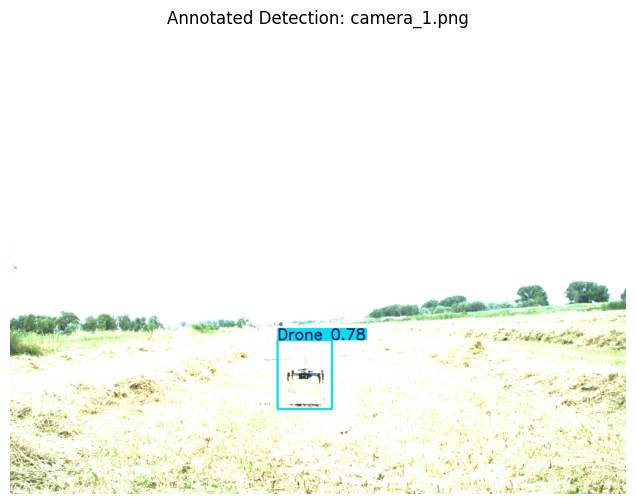

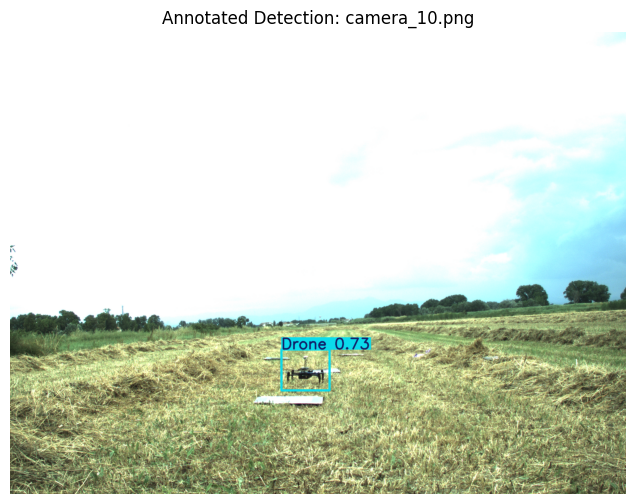

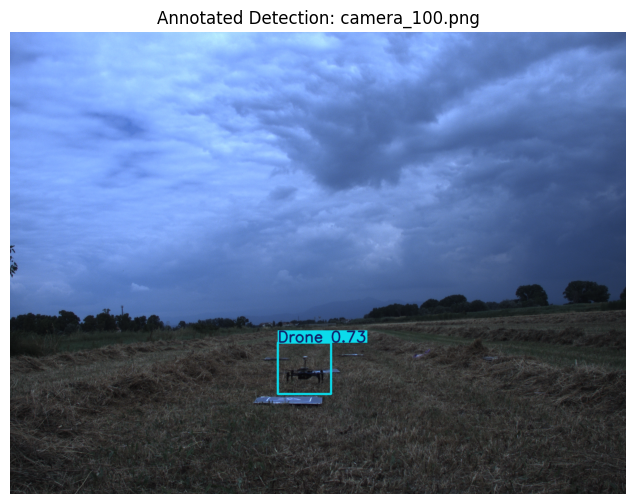

In [ ]:
# Step 1: Setup and imports
import os
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
from tqdm import tqdm

# Step 2: Load the trained YOLOv8 model
model_path = '/content/runs/detect/yolov8l_colab/weights/best.pt'
model = YOLO(model_path)

# Step 3: Set path to your image sequence
image_sequence_dir = '/content/drive/MyDrive/DAA/Ground/frames_ground_2024-05-27-16-01-50'

# Ensure the images are sorted in the correct sequence
image_files = sorted([f for f in os.listdir(image_sequence_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

# Step 4: Run detection on image sequence
output_dir = '/content/drone_detections'
os.makedirs(output_dir, exist_ok=True)

for img_file in tqdm(image_files, desc="Processing frames"):
    img_path = os.path.join(image_sequence_dir, img_file)
    img = cv2.imread(img_path)

    # Run prediction
    results = model.predict(img, imgsz=640, conf=0.3, device='0')

    # Draw bounding boxes and labels on the image
    annotated_img = results[0].plot()

    # Save annotated images to the output directory
    save_path = os.path.join(output_dir, img_file)
    cv2.imwrite(save_path, annotated_img)

# Step 5: Display sample annotated images
print("\n✅ Detection completed! Showing sample detections:")

sample_images = image_files[:3]  # Display first 3 annotated frames
for img_file in sample_images:
    annotated_img = cv2.imread(os.path.join(output_dir, img_file))
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
    plt.title(f"Annotated Detection: {img_file}")
    plt.axis('off')
    plt.show()


In [ ]:
!pip install ultralytics
import os
import cv2
import numpy as np
from tqdm import tqdm
from ultralytics import YOLO

# === CONFIG ===
model_path = "/content/drive/MyDrive/DAA/Ground/best.pt"
test_images_dir = "/content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images"
test_labels_dir = "/content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/labels"
iou_threshold = 0.5
output_csv = "detection_verification.csv"

# === HELPER: Compute IoU ===
def compute_iou(boxA, boxB):
    # boxes = [x1, y1, x2, y2]
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    inter_area = max(0, xB - xA) * max(0, yB - yA)
    boxA_area = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxB_area = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
    union_area = float(boxA_area + boxB_area - inter_area)
    return inter_area / union_area if union_area > 0 else 0

# === Load Model ===
model = YOLO(model_path)

# === Inference and Evaluation ===
results_log = []

image_files = sorted([f for f in os.listdir(test_images_dir) if f.endswith((".jpg", ".png"))])

for image_name in tqdm(image_files, desc="Processing test images"):
    image_path = os.path.join(test_images_dir, image_name)
    label_path = os.path.join(test_labels_dir, os.path.splitext(image_name)[0] + ".txt")

    img = cv2.imread(image_path)
    height, width = img.shape[:2]

    # Load ground truth boxes
    gt_boxes = []
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f:
                parts = list(map(float, line.strip().split()))
                _, x_center, y_center, w, h = parts
                x1 = (x_center - w / 2) * width
                y1 = (y_center - h / 2) * height
                x2 = (x_center + w / 2) * width
                y2 = (y_center + h / 2) * height
                gt_boxes.append([x1, y1, x2, y2])

    # Run prediction
    results = model.predict(image_path, imgsz=640, conf=0.3, device="cpu")[0]
    pred_boxes = results.boxes.xyxy.cpu().numpy()
    scores = results.boxes.conf.cpu().numpy()

    for i, box in enumerate(pred_boxes):
        score = scores[i]
        is_tp = False
        for gt in gt_boxes:
            iou = compute_iou(box, gt)
            if iou >= iou_threshold:
                is_tp = True
                break
        results_log.append({
            "image": image_name,
            "x1": box[0], "y1": box[1], "x2": box[2], "y2": box[3],
            "score": score,
            "TP": is_tp
        })

# === Save to CSV ===
import pandas as pd
df = pd.DataFrame(results_log)
df["FP"] = ~df["TP"]
df.to_csv(output_csv, index=False)
print(f"✅ TP/FP results saved to: {output_csv}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 829.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

Processing test images:   0%|          | 0/173 [00:00<?, ?it/s]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_100_png.rf.dc891ee5707cb3c777286531c5bc73ed.jpg: 640x640 1 Drone, 2934.1ms
Speed: 6.9ms preprocess, 2934.1ms inference, 27.5ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:   1%|          | 1/173 [00:11<34:23, 12.00s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1014_png.rf.d8b7596e7c4547ed6403e422d68bed80.jpg: 640x640 1 Drone, 2898.5ms
Speed: 6.3ms preprocess, 2898.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:   1%|          | 2/173 [00:16<21:09,  7.42s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1035_png.rf.6a526a9941d0c278a0bd24678d716031.jpg: 640x640 1 Drone, 3363.6ms
Speed: 3.3ms preprocess, 3363.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:   2%|▏         | 3/173 [00:19<16:09,  5.70s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_103_png.rf.53f583f8c6e8f986dde68b4487edb294.jpg: 640x640 1 Drone, 3564.3ms
Speed: 6.1ms preprocess, 3564.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:   2%|▏         | 4/173 [00:23<14:07,  5.01s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1041_png.rf.d88e43e61f9001d7e0694c8f8fcb20f8.jpg: 640x640 1 Drone, 2886.3ms
Speed: 3.4ms preprocess, 2886.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:   3%|▎         | 5/173 [00:27<12:12,  4.36s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_104_png.rf.07e82fe593c912709be02eea3dd2c96d.jpg: 640x640 1 Drone, 2701.5ms
Speed: 2.8ms preprocess, 2701.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:   3%|▎         | 6/173 [00:30<10:55,  3.93s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1054_png.rf.7f3ee2f3d921ea4b38b263a4ccc35367.jpg: 640x640 1 Drone, 2979.2ms
Speed: 3.4ms preprocess, 2979.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:   4%|▍         | 7/173 [00:33<10:19,  3.73s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1057_png.rf.998510bc381ea91dffc1e29e2c11c5bb.jpg: 640x640 1 Drone, 4059.9ms
Speed: 3.5ms preprocess, 4059.9ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:   5%|▍         | 8/173 [00:37<10:52,  3.95s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1072_png.rf.f0954f2e1c0ee5edfba11357a9feb6af.jpg: 640x640 1 Drone, 2765.7ms
Speed: 4.0ms preprocess, 2765.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:   5%|▌         | 9/173 [00:41<10:09,  3.72s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1091_png.rf.a6166fa1d23ee73d2c668747dc3f584d.jpg: 640x640 1 Drone, 2777.4ms
Speed: 2.9ms preprocess, 2777.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:   6%|▌         | 10/173 [00:44<09:35,  3.53s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1102_png.rf.d63817163fa6de7ff3eb03f9ffde35a1.jpg: 640x640 1 Drone, 2752.0ms
Speed: 3.2ms preprocess, 2752.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:   6%|▋         | 11/173 [00:47<09:11,  3.40s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1114_png.rf.e79561908c3e3f0d6934187a67398bb4.jpg: 640x640 (no detections), 4267.0ms
Speed: 3.0ms preprocess, 4267.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:   7%|▋         | 12/173 [00:51<09:52,  3.68s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1208_png.rf.f6cffe62b3ee2f79a8577773bd326796.jpg: 640x640 1 Drone, 2843.5ms
Speed: 3.8ms preprocess, 2843.5ms inference, 9.6ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:   8%|▊         | 13/173 [00:54<09:22,  3.52s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1222_png.rf.bbfd33ec122072cbca83792dbdd6fd3d.jpg: 640x640 1 Drone, 2752.3ms
Speed: 3.2ms preprocess, 2752.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:   8%|▊         | 14/173 [00:57<08:57,  3.38s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1228_png.rf.ff3aa480d0674470dd0f22903aac8ada.jpg: 640x640 1 Drone, 2851.7ms
Speed: 2.9ms preprocess, 2851.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:   9%|▊         | 15/173 [01:01<08:46,  3.33s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1248_png.rf.db1c22b5d949ea27d38e1c9e123d798c.jpg: 640x640 1 Drone, 3833.5ms
Speed: 3.3ms preprocess, 3833.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:   9%|▉         | 16/173 [01:05<09:27,  3.62s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1260_png.rf.5a9a7b0cdedc7c7c12ffe7dad678e266.jpg: 640x640 1 Drone, 3234.8ms
Speed: 3.7ms preprocess, 3234.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  10%|▉         | 17/173 [01:08<09:24,  3.62s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1265_png.rf.5a27c1c8b8fb9fbb8e4c4b3d94936618.jpg: 640x640 1 Drone, 2679.4ms
Speed: 3.0ms preprocess, 2679.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  10%|█         | 18/173 [01:12<08:58,  3.48s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_13_png.rf.e259cb211d05818f86a7dce59b2f0213.jpg: 640x640 1 Drone, 2783.9ms
Speed: 4.8ms preprocess, 2783.9ms inference, 6.4ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  11%|█         | 19/173 [01:15<08:38,  3.36s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1437_png.rf.3b76701796f09443ca568cdb725b7be7.jpg: 640x640 1 Drone, 3439.6ms
Speed: 3.2ms preprocess, 3439.6ms inference, 16.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  12%|█▏        | 20/173 [01:18<08:53,  3.49s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1473_png.rf.d1bfaa5b7a4de2f5ad7f5172ef83b7a6.jpg: 640x640 1 Drone, 3426.3ms
Speed: 3.6ms preprocess, 3426.3ms inference, 8.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  12%|█▏        | 21/173 [01:22<09:00,  3.55s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1475_png.rf.6155bf5e6d658dffdaccc406a623d4f1.jpg: 640x640 1 Drone, 2686.5ms
Speed: 3.2ms preprocess, 2686.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  13%|█▎        | 22/173 [01:25<08:37,  3.43s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1477_png.rf.6893d8b7466223c5da1aa6168ff20000.jpg: 640x640 1 Drone, 2716.2ms
Speed: 3.1ms preprocess, 2716.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  13%|█▎        | 23/173 [01:28<08:14,  3.30s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1495_png.rf.00064aeebb233f8e28b3066e27b200a1.jpg: 640x640 1 Drone, 3063.6ms
Speed: 3.2ms preprocess, 3063.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  14%|█▍        | 24/173 [01:32<08:15,  3.32s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1500_png.rf.d796a96bdceaaf7157f48849ec437961.jpg: 640x640 1 Drone, 3671.2ms
Speed: 3.5ms preprocess, 3671.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  14%|█▍        | 25/173 [01:36<08:44,  3.55s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1501_png.rf.58ce43ffe97fcd9fd6a04f818140f21e.jpg: 640x640 1 Drone, 2705.2ms
Speed: 3.2ms preprocess, 2705.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  15%|█▌        | 26/173 [01:39<08:20,  3.40s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1509_png.rf.c5a139d4baeb91d434d46bdb73eed16a.jpg: 640x640 1 Drone, 2747.5ms
Speed: 2.7ms preprocess, 2747.5ms inference, 7.3ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  16%|█▌        | 27/173 [01:42<08:05,  3.32s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1515_png.rf.099f90c6145a2eb3b8cee9d00ee985df.jpg: 640x640 1 Drone, 2976.5ms
Speed: 3.1ms preprocess, 2976.5ms inference, 11.0ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  16%|█▌        | 28/173 [01:45<08:01,  3.32s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1518_png.rf.0803e0a5383c3adf747e3bf253868433.jpg: 640x640 1 Drone, 3936.7ms
Speed: 4.2ms preprocess, 3936.7ms inference, 7.8ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  17%|█▋        | 29/173 [01:50<08:39,  3.61s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1529_png.rf.0a5a1602b13db97b300ac9f274856d51.jpg: 640x640 1 Drone, 2738.7ms
Speed: 2.8ms preprocess, 2738.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  17%|█▋        | 30/173 [01:53<08:16,  3.47s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1549_png.rf.6bbd3f70667f91ab5031b7d4d9be7cee.jpg: 640x640 1 Drone, 2731.3ms
Speed: 3.5ms preprocess, 2731.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  18%|█▊        | 31/173 [01:56<07:59,  3.38s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1560_png.rf.70b4f2c32554ddd5d73b9505bac4cdbc.jpg: 640x640 1 Drone, 2836.4ms
Speed: 3.1ms preprocess, 2836.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  18%|█▊        | 32/173 [01:59<07:47,  3.32s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1564_png.rf.32b4c844391c04311ac1a615f2b57aef.jpg: 640x640 1 Drone, 4040.4ms
Speed: 3.6ms preprocess, 4040.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  19%|█▉        | 33/173 [02:03<08:29,  3.64s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1572_png.rf.2310a3b9aae5172e0b280ec95108efbb.jpg: 640x640 1 Drone, 2779.0ms
Speed: 3.0ms preprocess, 2779.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  20%|█▉        | 34/173 [02:07<08:03,  3.48s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1582_png.rf.3127469e07fafb2a0802b036a4316694.jpg: 640x640 1 Drone, 2714.5ms
Speed: 3.5ms preprocess, 2714.5ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  20%|██        | 35/173 [02:10<07:43,  3.36s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1586_png.rf.98f3d94ff3df38694bf7f51bbe753294.jpg: 640x640 1 Drone, 2720.1ms
Speed: 3.0ms preprocess, 2720.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  21%|██        | 36/173 [02:13<07:28,  3.28s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1587_png.rf.6393c49cbf4628ad38c90a07e491f857.jpg: 640x640 1 Drone, 4306.8ms
Speed: 4.5ms preprocess, 4306.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  21%|██▏       | 37/173 [02:17<08:22,  3.70s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1592_png.rf.7787513059dfb39855d294c3d352ff6f.jpg: 640x640 1 Drone, 2733.4ms
Speed: 2.8ms preprocess, 2733.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  22%|██▏       | 38/173 [02:20<07:55,  3.52s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1594_png.rf.0edceee2afbaffe9ba5581286ffed1d0.jpg: 640x640 1 Drone, 2705.9ms
Speed: 2.9ms preprocess, 2705.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  23%|██▎       | 39/173 [02:24<07:43,  3.46s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1596_png.rf.c2c5f8bdf3e5b4904616cdcc07c280cd.jpg: 640x640 1 Drone, 2730.0ms
Speed: 3.9ms preprocess, 2730.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  23%|██▎       | 40/173 [02:27<07:24,  3.34s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1605_png.rf.b4f6690e939a052e30dae71a1835639a.jpg: 640x640 1 Drone, 4326.2ms
Speed: 4.8ms preprocess, 4326.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  24%|██▎       | 41/173 [02:32<08:15,  3.75s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1610_png.rf.efbd1a46e5e05025732fc5f2d745a7be.jpg: 640x640 1 Drone, 2707.0ms
Speed: 3.0ms preprocess, 2707.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  24%|██▍       | 42/173 [02:35<07:43,  3.53s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1620_png.rf.4a4e0925bf80201396519d43784646b3.jpg: 640x640 1 Drone, 2725.2ms
Speed: 2.9ms preprocess, 2725.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  25%|██▍       | 43/173 [02:38<07:25,  3.42s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1632_png.rf.420d8436d5cacb112841e0054d3b0cc8.jpg: 640x640 1 Drone, 2729.8ms
Speed: 3.4ms preprocess, 2729.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  25%|██▌       | 44/173 [02:41<07:07,  3.32s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1637_png.rf.370226e4b143515a9f1b1d2e07eadcbe.jpg: 640x640 1 Drone, 4224.9ms
Speed: 2.8ms preprocess, 4224.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  26%|██▌       | 45/173 [02:46<07:57,  3.73s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_18_png.rf.3a86bcdcb8dfca9211dfdb46cd0d52ba.jpg: 640x640 1 Drone, 2665.5ms
Speed: 3.3ms preprocess, 2665.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  27%|██▋       | 46/173 [02:49<07:26,  3.52s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1930_png.rf.a0d8b3d657172d90ff37e5abd81ab811.jpg: 640x640 1 Drone, 2655.8ms
Speed: 3.1ms preprocess, 2655.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  27%|██▋       | 47/173 [02:52<07:06,  3.39s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1931_png.rf.83eac5d662b7fd1bb0397ccc408df273.jpg: 640x640 1 Drone, 2691.2ms
Speed: 2.9ms preprocess, 2691.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  28%|██▊       | 48/173 [02:55<06:57,  3.34s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_1976_png.rf.b575482668b59a0df4e483bcaa4d30c5.jpg: 640x640 1 Drone, 3994.9ms
Speed: 2.8ms preprocess, 3994.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  28%|██▊       | 49/173 [02:59<07:31,  3.64s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2002_png.rf.abf08a08c728651f31ecc1917125cd68.jpg: 640x640 2 Drones, 2834.9ms
Speed: 4.1ms preprocess, 2834.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  29%|██▉       | 50/173 [03:02<07:12,  3.52s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2020_png.rf.b8e8712b0f115cdd9f17834d76b139aa.jpg: 640x640 1 Drone, 2773.6ms
Speed: 2.7ms preprocess, 2773.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  29%|██▉       | 51/173 [03:06<06:59,  3.44s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2035_png.rf.596297e022f0dc7c142c3a44a160af4c.jpg: 640x640 1 Drone, 2727.7ms
Speed: 3.0ms preprocess, 2727.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  30%|███       | 52/173 [03:09<06:42,  3.33s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2037_png.rf.3986f2156ee69360c5109d6abd744e3f.jpg: 640x640 2 Drones, 3995.6ms
Speed: 3.5ms preprocess, 3995.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  31%|███       | 53/173 [03:13<07:15,  3.63s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2062_png.rf.166a64fa37e6c20ff30ed1cfa70489bb.jpg: 640x640 1 Drone, 2918.7ms
Speed: 4.1ms preprocess, 2918.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  31%|███       | 54/173 [03:16<06:58,  3.52s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2072_png.rf.523ef0900a7e1a48e5308afee062ef1d.jpg: 640x640 1 Drone, 2731.8ms
Speed: 3.2ms preprocess, 2731.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  32%|███▏      | 55/173 [03:19<06:39,  3.38s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2080_png.rf.cd83948890a2abdd356a0d463d622470.jpg: 640x640 1 Drone, 2671.5ms
Speed: 3.4ms preprocess, 2671.5ms inference, 8.8ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  32%|███▏      | 56/173 [03:22<06:22,  3.27s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2094_png.rf.8a9a9d9afa0f2516aca5727eb6d7248d.jpg: 640x640 1 Drone, 3699.0ms
Speed: 3.6ms preprocess, 3699.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  33%|███▎      | 57/173 [03:27<06:47,  3.51s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2113_png.rf.5dcb3b9c4d6360a68afc1c4d742d2290.jpg: 640x640 1 Drone, 2864.0ms
Speed: 5.6ms preprocess, 2864.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  34%|███▎      | 58/173 [03:30<06:50,  3.57s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2125_png.rf.ce36b381cb2ce671e4ad97d5b765e218.jpg: 640x640 1 Drone, 2727.3ms
Speed: 2.9ms preprocess, 2727.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  34%|███▍      | 59/173 [03:33<06:30,  3.42s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2126_png.rf.45f24b85f93b5a5b42f53a8df48ba9cc.jpg: 640x640 1 Drone, 2741.1ms
Speed: 3.3ms preprocess, 2741.1ms inference, 10.0ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  35%|███▍      | 60/173 [03:36<06:16,  3.33s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2141_png.rf.83449f8be7b658e1e7ab5b24e8039e5f.jpg: 640x640 1 Drone, 3857.2ms
Speed: 3.2ms preprocess, 3857.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  35%|███▌      | 61/173 [03:41<06:41,  3.59s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2144_png.rf.f08341891375b045d49667dce4d9885f.jpg: 640x640 1 Drone, 3043.9ms
Speed: 3.7ms preprocess, 3043.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  36%|███▌      | 62/173 [03:44<06:29,  3.51s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2154_png.rf.e90196092c012c4c4127dcf5a72dc1cd.jpg: 640x640 1 Drone, 2668.9ms
Speed: 3.1ms preprocess, 2668.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  36%|███▋      | 63/173 [03:47<06:10,  3.36s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2156_png.rf.a07a56db0b4bee2717f609c24d252a81.jpg: 640x640 1 Drone, 2683.7ms
Speed: 3.4ms preprocess, 2683.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  37%|███▋      | 64/173 [03:50<05:55,  3.26s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2159_png.rf.531aee007af3300ccc9dd5a30cba4115.jpg: 640x640 1 Drone, 3317.8ms
Speed: 2.8ms preprocess, 3317.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  38%|███▊      | 65/173 [03:54<06:05,  3.38s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2164_png.rf.35bc92e4212ea925a225becc5cb1e6ba.jpg: 640x640 1 Drone, 3496.2ms
Speed: 4.5ms preprocess, 3496.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  38%|███▊      | 66/173 [03:57<06:15,  3.50s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2167_png.rf.499386e1551e889c7dc64a3bfe7251b7.jpg: 640x640 1 Drone, 2688.5ms
Speed: 3.1ms preprocess, 2688.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  39%|███▊      | 67/173 [04:00<05:55,  3.35s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2168_png.rf.5ec43a3a8612d6008c8fcf9618bfbcf4.jpg: 640x640 1 Drone, 2678.7ms
Speed: 3.0ms preprocess, 2678.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  39%|███▉      | 68/173 [04:03<05:41,  3.25s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2172_png.rf.107fb2f7d12ce6a28293a8dd2d9dd748.jpg: 640x640 1 Drone, 2778.7ms
Speed: 3.0ms preprocess, 2778.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  40%|███▉      | 69/173 [04:07<05:32,  3.20s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2183_png.rf.3d060e20d623fffad28fd44412bce736.jpg: 640x640 1 Drone, 3940.8ms
Speed: 4.2ms preprocess, 3940.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  40%|████      | 70/173 [04:11<06:05,  3.55s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2196_png.rf.a28a4996c17201667ac42cdb343e0b97.jpg: 640x640 1 Drone, 2668.2ms
Speed: 2.9ms preprocess, 2668.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  41%|████      | 71/173 [04:14<05:44,  3.38s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2210_png.rf.14d95cf4fe4bdcfdd183fe0a83086575.jpg: 640x640 1 Drone, 2686.3ms
Speed: 3.2ms preprocess, 2686.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  42%|████▏     | 72/173 [04:17<05:34,  3.31s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2211_png.rf.3320c28e82cd18ebb133cf0bc1b062d3.jpg: 640x640 1 Drone, 2694.3ms
Speed: 3.1ms preprocess, 2694.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  42%|████▏     | 73/173 [04:20<05:21,  3.22s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2215_png.rf.af2a3730192556a1bde05e5f8e1c54db.jpg: 640x640 1 Drone, 4261.4ms
Speed: 7.1ms preprocess, 4261.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  43%|████▎     | 74/173 [04:25<06:00,  3.64s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2233_png.rf.3c57e78da50901b8557111af729354a0.jpg: 640x640 1 Drone, 2644.9ms
Speed: 3.2ms preprocess, 2644.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  43%|████▎     | 75/173 [04:28<05:38,  3.45s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2235_png.rf.a839bbf852bdc55978a60994e6e26f3b.jpg: 640x640 1 Drone, 2675.6ms
Speed: 3.0ms preprocess, 2675.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  44%|████▍     | 76/173 [04:31<05:25,  3.36s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2241_png.rf.bf76189979242a08471aaa4db39b2b02.jpg: 640x640 1 Drone, 2708.4ms
Speed: 3.0ms preprocess, 2708.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  45%|████▍     | 77/173 [04:34<05:12,  3.25s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2244_png.rf.3d5281308044da2b538025f232065a2a.jpg: 640x640 1 Drone, 3974.4ms
Speed: 2.9ms preprocess, 3974.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  45%|████▌     | 78/173 [04:38<05:38,  3.56s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2253_png.rf.88ac11611e35d1af46b9aae21976ba8b.jpg: 640x640 1 Drone, 2812.4ms
Speed: 3.4ms preprocess, 2812.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  46%|████▌     | 79/173 [04:41<05:22,  3.43s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2267_png.rf.0c7ef8885f90b6e38e32eb62b98dca72.jpg: 640x640 1 Drone, 2672.7ms
Speed: 3.2ms preprocess, 2672.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  46%|████▌     | 80/173 [04:44<05:07,  3.31s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2269_png.rf.31a4fbdca427429dfd500ce0efd6d42e.jpg: 640x640 1 Drone, 2659.6ms
Speed: 5.9ms preprocess, 2659.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  47%|████▋     | 81/173 [04:47<04:55,  3.21s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2288_png.rf.76e30f884d054f952a5c02a35157cfab.jpg: 640x640 1 Drone, 3624.8ms
Speed: 3.1ms preprocess, 3624.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  47%|████▋     | 82/173 [04:51<05:13,  3.45s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2311_png.rf.08c510a36b0e4e7ebbdaf554fa408f23.jpg: 640x640 1 Drone, 3171.5ms
Speed: 6.6ms preprocess, 3171.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  48%|████▊     | 83/173 [04:55<05:11,  3.46s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_231_png.rf.5c2370846ec30318cf2a3d6d2168bd24.jpg: 640x640 1 Drone, 2681.7ms
Speed: 4.2ms preprocess, 2681.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  49%|████▊     | 84/173 [04:58<04:56,  3.33s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2322_png.rf.0fd94ca94e87d54424cf7426ba947d15.jpg: 640x640 1 Drone, 2693.1ms
Speed: 2.8ms preprocess, 2693.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  49%|████▉     | 85/173 [05:01<04:45,  3.24s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2327_png.rf.4b2c2ac8240531caf17564e300416526.jpg: 640x640 1 Drone, 3190.4ms
Speed: 2.9ms preprocess, 3190.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  50%|████▉     | 86/173 [05:04<04:49,  3.33s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2333_png.rf.ac9bdef5efdffc01face9c0bdbf68d1d.jpg: 640x640 1 Drone, 3802.8ms
Speed: 7.0ms preprocess, 3802.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  50%|█████     | 87/173 [05:08<05:07,  3.57s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2342_png.rf.4c8958376b8aabf83eec8fb1c08f13fc.jpg: 640x640 1 Drone, 2734.5ms
Speed: 14.5ms preprocess, 2734.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  51%|█████     | 88/173 [05:11<04:49,  3.41s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2348_png.rf.491d4835691d39b053aaf206207da83f.jpg: 640x640 1 Drone, 2618.6ms
Speed: 3.7ms preprocess, 2618.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  51%|█████▏    | 89/173 [05:14<04:35,  3.27s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2352_png.rf.889c8d83d6c93d7b197a2b300f9e5f62.jpg: 640x640 1 Drone, 2691.3ms
Speed: 3.2ms preprocess, 2691.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  52%|█████▏    | 90/173 [05:17<04:25,  3.19s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2362_png.rf.ecc39bef787931480e3ba5f1939922f1.jpg: 640x640 1 Drone, 3987.5ms
Speed: 5.8ms preprocess, 3987.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  53%|█████▎    | 91/173 [05:22<04:50,  3.54s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2370_png.rf.95ff3c75cce47e290c03fc13eb53d073.jpg: 640x640 2 Drones, 2672.1ms
Speed: 3.0ms preprocess, 2672.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  53%|█████▎    | 92/173 [05:25<04:35,  3.40s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2379_png.rf.42ec41dd8ef36e3773dd23e224aecc03.jpg: 640x640 1 Drone, 2665.5ms
Speed: 2.9ms preprocess, 2665.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  54%|█████▍    | 93/173 [05:28<04:21,  3.27s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2393_png.rf.e8d145dce6e7870f1f30ef9cc47111c3.jpg: 640x640 1 Drone, 2680.1ms
Speed: 3.1ms preprocess, 2680.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  54%|█████▍    | 94/173 [05:31<04:13,  3.20s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2395_png.rf.54fa5306d10eea7848269fc8d470b002.jpg: 640x640 1 Drone, 4024.4ms
Speed: 3.3ms preprocess, 4024.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  55%|█████▍    | 95/173 [05:35<04:35,  3.54s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2417_png.rf.c01832021c672465fb1055dd7ec2f2f6.jpg: 640x640 1 Drone, 2649.5ms
Speed: 3.1ms preprocess, 2649.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  55%|█████▌    | 96/173 [05:38<04:22,  3.40s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2418_png.rf.446fd30d4618abfe7fe3525867803af4.jpg: 640x640 1 Drone, 2637.2ms
Speed: 3.0ms preprocess, 2637.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  56%|█████▌    | 97/173 [05:41<04:10,  3.30s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2422_png.rf.1421980f47bdc6cb243644a770148026.jpg: 640x640 1 Drone, 2642.6ms
Speed: 2.9ms preprocess, 2642.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  57%|█████▋    | 98/173 [05:44<04:02,  3.23s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2427_png.rf.75f2e30637c3770e60a96ff79063ba8f.jpg: 640x640 1 Drone, 3878.9ms
Speed: 3.3ms preprocess, 3878.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  57%|█████▋    | 99/173 [05:49<04:24,  3.57s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2429_png.rf.4743441c0333044874264fe9311ac0d2.jpg: 640x640 1 Drone, 2826.7ms
Speed: 6.0ms preprocess, 2826.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  58%|█████▊    | 100/173 [05:52<04:12,  3.45s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2444_png.rf.f2a1b7435e719877f95b30f09cc6a46b.jpg: 640x640 1 Drone, 2649.3ms
Speed: 3.5ms preprocess, 2649.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  58%|█████▊    | 101/173 [05:55<03:59,  3.32s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2455_png.rf.a46c04f7685ef9119ba46fcbf91e4a5d.jpg: 640x640 2 Drones, 2716.4ms
Speed: 3.2ms preprocess, 2716.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  59%|█████▉    | 102/173 [05:58<03:50,  3.25s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2464_png.rf.5322451f0f8b9b6e92175906d4098092.jpg: 640x640 1 Drone, 3528.3ms
Speed: 2.9ms preprocess, 3528.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  60%|█████▉    | 103/173 [06:02<04:00,  3.43s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_247_png.rf.2d0c2c63189f63fbae6ed71a18c3fe9d.jpg: 640x640 1 Drone, 3256.3ms
Speed: 3.6ms preprocess, 3256.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  60%|██████    | 104/173 [06:06<04:00,  3.49s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2480_png.rf.fa9f82016c1d2769592f9b3ec60ebe9d.jpg: 640x640 1 Drone, 2732.9ms
Speed: 3.5ms preprocess, 2732.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  61%|██████    | 105/173 [06:09<03:47,  3.35s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2517_png.rf.a57cf68504500d1576569104dd511a92.jpg: 640x640 1 Drone, 2670.5ms
Speed: 3.4ms preprocess, 2670.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  61%|██████▏   | 106/173 [06:12<03:36,  3.24s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2540_png.rf.c095a702c2a512f72594f7458415a52a.jpg: 640x640 1 Drone, 3149.1ms
Speed: 3.3ms preprocess, 3149.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  62%|██████▏   | 107/173 [06:15<03:38,  3.31s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2567_png.rf.5baea7121e6d33f10eb7e451d46e4b24.jpg: 640x640 1 Drone, 3676.0ms
Speed: 3.4ms preprocess, 3676.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  62%|██████▏   | 108/173 [06:19<03:48,  3.52s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2573_png.rf.7def37a942edce541a2457c79c4722c7.jpg: 640x640 1 Drone, 2665.5ms
Speed: 2.8ms preprocess, 2665.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  63%|██████▎   | 109/173 [06:22<03:35,  3.37s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2592_png.rf.f07efcbf72e0539f21df3860edc3e7e2.jpg: 640x640 1 Drone, 2688.1ms
Speed: 3.3ms preprocess, 2688.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  64%|██████▎   | 110/173 [06:25<03:25,  3.27s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2593_png.rf.887053ab52f59693b6e865b08efb0f1c.jpg: 640x640 1 Drone, 2715.0ms
Speed: 3.2ms preprocess, 2715.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  64%|██████▍   | 111/173 [06:28<03:18,  3.20s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2595_png.rf.71ad5b3aac943b562bfc6a9a338b72aa.jpg: 640x640 1 Drone, 4051.5ms
Speed: 4.6ms preprocess, 4051.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  65%|██████▍   | 112/173 [06:32<03:36,  3.55s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2600_png.rf.6f8ce060a74906fa25e2be927ca065e3.jpg: 640x640 1 Drone, 2596.6ms
Speed: 3.2ms preprocess, 2596.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  65%|██████▌   | 113/173 [06:35<03:21,  3.36s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2607_png.rf.78a15e41494edd614ef6b9180dc36e90.jpg: 640x640 1 Drone, 2618.2ms
Speed: 3.5ms preprocess, 2618.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  66%|██████▌   | 114/173 [06:38<03:11,  3.25s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2609_png.rf.6a40b4007dbb8fbbe5686c9f028b8e20.jpg: 640x640 1 Drone, 2655.8ms
Speed: 3.4ms preprocess, 2655.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  66%|██████▋   | 115/173 [06:41<03:04,  3.19s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2623_png.rf.2570623689904bcb9d6f54bd66c630c6.jpg: 640x640 1 Drone, 4096.7ms
Speed: 3.5ms preprocess, 4096.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  67%|██████▋   | 116/173 [06:46<03:23,  3.57s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2629_png.rf.fa87f83a99bfbbb744e1c277bcedf58f.jpg: 640x640 1 Drone, 2675.5ms
Speed: 8.0ms preprocess, 2675.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  68%|██████▊   | 117/173 [06:49<03:10,  3.40s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2648_png.rf.5bddf9a5522d67f2993530dac0f1b128.jpg: 640x640 1 Drone, 2640.5ms
Speed: 3.1ms preprocess, 2640.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  68%|██████▊   | 118/173 [06:52<02:59,  3.27s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2656_png.rf.134ec196e61560638d6f76cbb4cae348.jpg: 640x640 1 Drone, 2662.2ms
Speed: 3.4ms preprocess, 2662.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  69%|██████▉   | 119/173 [06:55<02:54,  3.24s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2661_png.rf.46045f76bcb5e72a255f05491d3fd314.jpg: 640x640 1 Drone, 3753.3ms
Speed: 3.5ms preprocess, 3753.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  69%|██████▉   | 120/173 [06:59<03:05,  3.49s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2675_png.rf.17ca9ab0fb418fd4870d5e9b15e3499d.jpg: 640x640 1 Drone, 3125.3ms
Speed: 3.9ms preprocess, 3125.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  70%|██████▉   | 121/173 [07:03<03:01,  3.49s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2676_png.rf.b21eb7f7a88b4294712e53f2b611a64d.jpg: 640x640 1 Drone, 2716.0ms
Speed: 3.6ms preprocess, 2716.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  71%|███████   | 122/173 [07:06<02:50,  3.33s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_267_png.rf.16e33de49a6f206cf9b49dd99a2fa38a.jpg: 640x640 1 Drone, 2697.4ms
Speed: 3.4ms preprocess, 2697.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  71%|███████   | 123/173 [07:09<02:42,  3.24s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2695_png.rf.fc9208965c76ce9eb8a0159137f7bb01.jpg: 640x640 1 Drone, 3225.2ms
Speed: 4.0ms preprocess, 3225.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  72%|███████▏  | 124/173 [07:12<02:44,  3.36s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2713_png.rf.098c819b290a3bcae8e2aba12cceb94f.jpg: 640x640 1 Drone, 3452.9ms
Speed: 3.9ms preprocess, 3452.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  72%|███████▏  | 125/173 [07:16<02:47,  3.48s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2736_png.rf.31170ad9752c35da7718e5a7707d6de8.jpg: 640x640 1 Drone, 2661.7ms
Speed: 3.3ms preprocess, 2661.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  73%|███████▎  | 126/173 [07:19<02:36,  3.33s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2746_png.rf.f3f97c322213c6c0797f00cbe9c0a7fa.jpg: 640x640 2 Drones, 2647.0ms
Speed: 3.1ms preprocess, 2647.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  73%|███████▎  | 127/173 [07:22<02:28,  3.23s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2759_png.rf.3a5a9f52e8cee24c121fb341167a9a59.jpg: 640x640 1 Drone, 2938.9ms
Speed: 2.9ms preprocess, 2938.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  74%|███████▍  | 128/173 [07:25<02:26,  3.26s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_275_png.rf.34531b630c9dd19f3f42e590ece4afd2.jpg: 640x640 1 Drone, 5203.3ms
Speed: 5.0ms preprocess, 5203.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  75%|███████▍  | 129/173 [07:31<02:54,  3.96s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2760_png.rf.b0b0c5d1c463c6ac54a8b85c7fa64697.jpg: 640x640 1 Drone, 2657.3ms
Speed: 2.9ms preprocess, 2657.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  75%|███████▌  | 130/173 [07:34<02:37,  3.67s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2771_png.rf.9ceb436be1a6e1d329503f4870cbab85.jpg: 640x640 1 Drone, 2737.1ms
Speed: 3.2ms preprocess, 2737.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  76%|███████▌  | 131/173 [07:37<02:26,  3.50s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2775_png.rf.976f49e9a500f26f6b6be6e1a8571900.jpg: 640x640 1 Drone, 2824.8ms
Speed: 3.2ms preprocess, 2824.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  76%|███████▋  | 132/173 [07:40<02:18,  3.38s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2780_png.rf.2b68d56448627a959f47a755e152cdd9.jpg: 640x640 1 Drone, 4098.8ms
Speed: 6.2ms preprocess, 4098.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  77%|███████▋  | 133/173 [07:44<02:27,  3.68s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2781_png.rf.96c735951ecb1b2d2065ab7886d1a606.jpg: 640x640 1 Drone, 2606.7ms
Speed: 3.3ms preprocess, 2606.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  77%|███████▋  | 134/173 [07:47<02:15,  3.47s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2811_png.rf.3cfdab1c3f4092bba2022ba03f3f5901.jpg: 640x640 1 Drone, 2604.1ms
Speed: 3.9ms preprocess, 2604.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  78%|███████▊  | 135/173 [07:50<02:05,  3.30s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2822_png.rf.eaeb43cb7db597e824b062d24d183aac.jpg: 640x640 1 Drone, 2586.0ms
Speed: 2.8ms preprocess, 2586.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  79%|███████▊  | 136/173 [07:53<01:58,  3.21s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2824_png.rf.e5ac1eca730ecaef63307184f478cd56.jpg: 640x640 1 Drone, 3983.3ms
Speed: 2.8ms preprocess, 3983.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  79%|███████▉  | 137/173 [07:58<02:07,  3.54s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_2825_png.rf.0170936983f39a11accfb022261af637.jpg: 640x640 1 Drone, 3471.5ms
Speed: 4.6ms preprocess, 3471.5ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  80%|███████▉  | 138/173 [08:01<02:06,  3.62s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_282_png.rf.8d790d40ae577cbba1052386c27799fd.jpg: 640x640 1 Drone, 6488.8ms
Speed: 11.0ms preprocess, 6488.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  80%|████████  | 139/173 [08:08<02:36,  4.61s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_285_png.rf.d2228983d01815c5f1a048a9a478b392.jpg: 640x640 1 Drone, 4039.9ms
Speed: 5.6ms preprocess, 4039.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  81%|████████  | 140/173 [08:13<02:29,  4.54s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_291_png.rf.2013f42ce63d5d323b7a79e00d54a2b3.jpg: 640x640 1 Drone, 2644.0ms
Speed: 3.7ms preprocess, 2644.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  82%|████████▏ | 141/173 [08:16<02:11,  4.09s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_294_png.rf.d52538627dc9a7aa0b526a1d7441b409.jpg: 640x640 1 Drone, 2593.4ms
Speed: 3.3ms preprocess, 2593.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  82%|████████▏ | 142/173 [08:19<01:56,  3.74s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_30_png.rf.90f758cd24fd8f3c11c72b01e6a524dd.jpg: 640x640 1 Drone, 3159.4ms
Speed: 3.7ms preprocess, 3159.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  83%|████████▎ | 143/173 [08:22<01:50,  3.69s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_326_png.rf.1c9ca3715d19cb66e3e992ed4e7ad652.jpg: 640x640 1 Drone, 4607.9ms
Speed: 8.0ms preprocess, 4607.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  83%|████████▎ | 144/173 [08:27<01:57,  4.07s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_328_png.rf.ab201ab7000d07ba88de976c9d73af7c.jpg: 640x640 1 Drone, 2587.7ms
Speed: 2.8ms preprocess, 2587.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  84%|████████▍ | 145/173 [08:30<01:45,  3.78s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_340_png.rf.7937c2b76635b03e15b6402f7cfafa76.jpg: 640x640 1 Drone, 2619.7ms
Speed: 4.1ms preprocess, 2619.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  84%|████████▍ | 146/173 [08:33<01:36,  3.56s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_34_png.rf.20c083d73f7f4f741581fd2bffbee536.jpg: 640x640 1 Drone, 2545.5ms
Speed: 3.7ms preprocess, 2545.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  85%|████████▍ | 147/173 [08:36<01:27,  3.37s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_351_png.rf.46ef456f5b28bad8e6884fc1b5f015ae.jpg: 640x640 1 Drone, 4281.4ms
Speed: 3.0ms preprocess, 4281.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  86%|████████▌ | 148/173 [08:41<01:36,  3.86s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_352_png.rf.6e78fd157a5ae32555cc78981e980ed2.jpg: 640x640 1 Drone, 2611.0ms
Speed: 2.8ms preprocess, 2611.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  86%|████████▌ | 149/173 [08:44<01:26,  3.59s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_353_png.rf.42ad8415f91ec38ef58f12f238880430.jpg: 640x640 1 Drone, 2603.7ms
Speed: 3.5ms preprocess, 2603.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  87%|████████▋ | 150/173 [08:47<01:17,  3.38s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_356_png.rf.34ac0fe728af44ab92c04e659823b4ac.jpg: 640x640 1 Drone, 2626.2ms
Speed: 3.2ms preprocess, 2626.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  87%|████████▋ | 151/173 [08:50<01:11,  3.24s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_363_png.rf.c8263eb0c27bc7f2a53cb747bb8ae528.jpg: 640x640 1 Drone, 3645.2ms
Speed: 3.6ms preprocess, 3645.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  88%|████████▊ | 152/173 [08:54<01:12,  3.47s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_376_png.rf.c4c7d902bf99df3b2f08905820b4d07c.jpg: 640x640 1 Drone, 3014.9ms
Speed: 5.4ms preprocess, 3014.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  88%|████████▊ | 153/173 [08:57<01:08,  3.44s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_383_png.rf.460d8beb43972054fea1466fcb59d177.jpg: 640x640 1 Drone, 2610.2ms
Speed: 3.5ms preprocess, 2610.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  89%|████████▉ | 154/173 [09:00<01:02,  3.29s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_394_png.rf.78082308ef8e23c4b2c1c1eeee1a8d76.jpg: 640x640 1 Drone, 2665.4ms
Speed: 3.2ms preprocess, 2665.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  90%|████████▉ | 155/173 [09:04<00:58,  3.23s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_399_png.rf.75848a3eb609f86c39a1d19074419f6e.jpg: 640x640 1 Drone, 3124.3ms
Speed: 3.0ms preprocess, 3124.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  90%|█████████ | 156/173 [09:07<00:55,  3.29s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_405_png.rf.d5135b7b4ea82735cd76ad3b5be3fff0.jpg: 640x640 1 Drone, 3469.6ms
Speed: 5.9ms preprocess, 3469.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  91%|█████████ | 157/173 [09:11<00:55,  3.49s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_430_png.rf.0b89f7c5947d3712f9c5a3fe73523b4e.jpg: 640x640 1 Drone, 2634.8ms
Speed: 3.1ms preprocess, 2634.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  91%|█████████▏| 158/173 [09:14<00:50,  3.34s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_43_png.rf.b183938860778a725fd41b95f55e8fc4.jpg: 640x640 1 Drone, 2627.3ms
Speed: 2.8ms preprocess, 2627.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  92%|█████████▏| 159/173 [09:17<00:45,  3.26s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_441_png.rf.92886eb8016c9cdb2ed6364e4b36c3ad.jpg: 640x640 1 Drone, 2858.9ms
Speed: 2.9ms preprocess, 2858.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  92%|█████████▏| 160/173 [09:20<00:42,  3.24s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_442_png.rf.804bec13d9f668ff91c959ec96608ba9.jpg: 640x640 1 Drone, 3738.9ms
Speed: 3.6ms preprocess, 3738.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  93%|█████████▎| 161/173 [09:24<00:41,  3.50s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_458_png.rf.fa44bedd8c242b870809ad2c0a77a128.jpg: 640x640 1 Drone, 2597.2ms
Speed: 3.2ms preprocess, 2597.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  94%|█████████▎| 162/173 [09:27<00:36,  3.32s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_461_png.rf.3c3d25ba900d194e3cb886cdd1a703dd.jpg: 640x640 1 Drone, 2602.8ms
Speed: 3.5ms preprocess, 2602.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  94%|█████████▍| 163/173 [09:30<00:32,  3.22s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_462_png.rf.668b5e17b323426f84984fbe77544c4c.jpg: 640x640 1 Drone, 2628.7ms
Speed: 3.1ms preprocess, 2628.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  95%|█████████▍| 164/173 [09:33<00:28,  3.14s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_47_png.rf.ad10afd63c2d2ebbbebd59e139df3a05.jpg: 640x640 1 Drone, 4280.4ms
Speed: 3.5ms preprocess, 4280.4ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  95%|█████████▌| 165/173 [09:38<00:28,  3.60s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_484_png.rf.5e6c53f01de9cb2443bfdb01ec699a29.jpg: 640x640 1 Drone, 2628.5ms
Speed: 5.8ms preprocess, 2628.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  96%|█████████▌| 166/173 [09:41<00:23,  3.41s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_502_png.rf.b7aa7839db50ee86eb4743a2e173cf37.jpg: 640x640 1 Drone, 2637.4ms
Speed: 2.9ms preprocess, 2637.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  97%|█████████▋| 167/173 [09:44<00:19,  3.31s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_510_png.rf.d7a0109c4a18a0b4309c928fdca6e1e8.jpg: 640x640 1 Drone, 2627.1ms
Speed: 2.8ms preprocess, 2627.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  97%|█████████▋| 168/173 [09:47<00:16,  3.22s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_516_png.rf.a72dc63d46abd72b7d1effdfa7939b2d.jpg: 640x640 1 Drone, 3846.8ms
Speed: 3.4ms preprocess, 3846.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  98%|█████████▊| 169/173 [09:51<00:14,  3.50s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_65_png.rf.da679081ce3de81b1b721614f76fa5ce.jpg: 640x640 1 Drone, 2685.6ms
Speed: 3.8ms preprocess, 2685.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  98%|█████████▊| 170/173 [09:54<00:10,  3.44s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_73_png.rf.409f1083e82285e35acf8a9d00017648.jpg: 640x640 1 Drone, 2604.1ms
Speed: 3.5ms preprocess, 2604.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  99%|█████████▉| 171/173 [09:57<00:06,  3.29s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_790_png.rf.402f19cbbdec92d4b9e715e52361359a.jpg: 640x640 1 Drone, 2593.4ms
Speed: 3.0ms preprocess, 2593.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing test images:  99%|█████████▉| 172/173 [10:00<00:03,  3.19s/it]


image 1/1 /content/drive/MyDrive/DAA/My First Project.v4i.coco-segmentation/test/images/camera_7_png.rf.387d9cfafc68680ea066efca5b97ced3.jpg: 640x640 1 Drone, 3519.9ms
Speed: 3.0ms preprocess, 3519.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Processing test images: 100%|██████████| 173/173 [10:04<00:00,  3.49s/it]


✅ TP/FP results saved to: detection_verification.csv
